In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statannot import add_stat_annotation

In [3]:
metadata = pd.read_csv('../../adaptation_master_metadata.txt', sep='\t', index_col=0)
metadata.head()

box_id  cage_id collection_timepoint collection_timestamp  \
sample_name                                                                    
12986.23B.Day7.1     10.0       23                 Day7        7/19/17 10:00   
12986.23B.Day7.10    10.0       23                 Day7        7/19/17 10:00   
12986.23B.Day7.11    10.0       23                 Day7        7/19/17 10:00   
12986.23B.Day7.12    10.0       23                 Day7        7/19/17 10:00   
12986.23B.Day7.13    14.0       23                 Day7        7/19/17 10:00   

                  date_colonized diet  elevation elevation_units  \
sample_name                                                        
12986.23B.Day7.1    7/12/17 0:00   RC        193          meters   
12986.23B.Day7.10   7/12/17 0:00   RC        193          meters   
12986.23B.Day7.11   7/12/17 0:00   RC        193          meters   
12986.23B.Day7.12   7/12/17 0:00   RC        193          meters   
12986.23B.Day7.13   7/12/17 0:00   RC        193          meters   

                            empo_1  empo_2  ... zarrinparlab_quant_ng_ul  \
sample_name                                 ...                            
12986.23B.Day7.1   Host-associated  Animal  ...                     78.0   
12986.23B.Day7.10  Host-associated  Animal  ...                     53.3   
12986.23B.Day7.11  Host-associated  Animal  ...                     80.6   
12986.23B.Day7.12  Host-associated  Animal  ...                     49.1   
12986.23B.Day7.13  Host-associated  Animal  ...                     48.6   

                  mouse dam sire date_collected bacteria_strain  \
sample_name                                                       
12986.23B.Day7.1    23B  A1    A        7/19/17            AZ20   
12986.23B.Day7.10   23B  A1    A        7/19/17            AZ20   
12986.23B.Day7.11   23B  A1    A        7/19/17            AZ20   
12986.23B.Day7.12   23B  A1    A        7/19/17            AZ20   
12986.23B.Day7.13   23B  A1    A        7/19/17            AZ20   

                   extraction_method     extraction_kit run plate  
sample_name                                                        
12986.23B.Day7.1              filter  Qiagen UltraClean   1   NaN  
12986.23B.Day7.10             filter  Qiagen UltraClean   1   NaN  
12986.23B.Day7.11             filter  Qiagen UltraClean   1   NaN  
12986.23B.Day7.12             filter  Qiagen UltraClean   1   NaN  
12986.23B.Day7.13             filter  Qiagen UltraClean   1   NaN  

[5 rows x 54 columns]

In [4]:
metadata['dramv_id'] = metadata['mouse_id'].astype(str)+"_"+ metadata['collection_timepoint'].astype(str)+"_"+ metadata['isolate_number'].astype(str)

In [5]:
metadata = metadata.reset_index()

In [6]:
metadata = metadata.set_index('dramv_id')
metadata.head()

sample_name  box_id  cage_id collection_timepoint  \
dramv_id                                                               
23B_Day7_1    12986.23B.Day7.1    10.0       23                 Day7   
23B_Day7_10  12986.23B.Day7.10    10.0       23                 Day7   
23B_Day7_11  12986.23B.Day7.11    10.0       23                 Day7   
23B_Day7_12  12986.23B.Day7.12    10.0       23                 Day7   
23B_Day7_13  12986.23B.Day7.13    14.0       23                 Day7   

            collection_timestamp date_colonized diet  elevation  \
dramv_id                                                          
23B_Day7_1         7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_10        7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_11        7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_12        7/19/17 10:00   7/12/17 0:00   RC        193   
23B_Day7_13        7/19/17 10:00   7/12/17 0:00   RC        193   

            elevation_units           empo_1  ... zarrinparlab_quant_ng_ul  \
dramv_id                                      ...                            
23B_Day7_1           meters  Host-associated  ...                     78.0   
23B_Day7_10          meters  Host-associated  ...                     53.3   
23B_Day7_11          meters  Host-associated  ...                     80.6   
23B_Day7_12          meters  Host-associated  ...                     49.1   
23B_Day7_13          meters  Host-associated  ...                     48.6   

            mouse dam sire date_collected bacteria_strain extraction_method  \
dramv_id                                                                      
23B_Day7_1    23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_10   23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_11   23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_12   23B  A1    A        7/19/17            AZ20            filter   
23B_Day7_13   23B  A1    A        7/19/17            AZ20            filter   

                extraction_kit run plate  
dramv_id                                  
23B_Day7_1   Qiagen UltraClean   1   NaN  
23B_Day7_10  Qiagen UltraClean   1   NaN  
23B_Day7_11  Qiagen UltraClean   1   NaN  
23B_Day7_12  Qiagen UltraClean   1   NaN  
23B_Day7_13  Qiagen UltraClean   1   NaN  

[5 rows x 55 columns]

In [8]:
assembly_list = pd.read_csv('../AZ51_assembly_list2.txt', sep='\t', header=None)
assembly_list.rename(columns={0:'sample-id'}, inplace=True)
assembly_list.head()

sample-id
0      41R_Day7_6_S335
1       41R_Day7_7_S34
2      41R_Day7_8_S351
3      41R_Day7_9_S359
4  41R_Month10_10_S651

In [9]:
assembly_list[['mouse', 'collection_timepoint', 'isolate', 'sample_number']] = assembly_list['sample-id'].str.split("_", expand=True)
assembly_list.head()

sample-id mouse collection_timepoint isolate sample_number
0      41R_Day7_6_S335   41R                 Day7       6          S335
1       41R_Day7_7_S34   41R                 Day7       7           S34
2      41R_Day7_8_S351   41R                 Day7       8          S351
3      41R_Day7_9_S359   41R                 Day7       9          S359
4  41R_Month10_10_S651   41R              Month10      10          S651

In [10]:
assembly_list2 = assembly_list[['collection_timepoint', 'mouse', 'isolate']].copy()
assembly_list2 = assembly_list2.groupby(by=['collection_timepoint', 'mouse']).count()
assembly_list2.reset_index(inplace=True)
assembly_list2

collection_timepoint mouse  isolate
0                  Day3   41L       24
1                  Day3   41R       23
2                  Day3   44R       24
3                  Day3   46N       24
4                  Day7   41B       24
..                  ...   ...      ...
77               Month6   45N       24
78               Month6   45R       24
79               Month6   46L       24
80               Month6   46N       24
81               Month6   46R       24

[82 rows x 3 columns]

# AZ51

### Overview

In [11]:
Native_overview = pd.read_csv('./AZ51_vMAGs_stats.csv', low_memory=False, index_col=17)
Native_overview.head()

sample              phage_id  VIRSorter category  \
simple_id                                                                     
41B_Day7_11  41B_Day7_11_S81_L002  1__0_partial_1-cat_1                   1   
41B_Day7_11  41B_Day7_11_S81_L002  1__1_partial_1-cat_1                   1   
41B_Day7_11  41B_Day7_11_S81_L002  1__2_partial_1-cat_1                   1   
41B_Day7_12  41B_Day7_12_S89_L002  5__0_partial_1-cat_1                   1   
41B_Day7_12  41B_Day7_12_S89_L002  7__0_partial_1-cat_1                   1   

             Circular  Prophage  Gene count  Strand switches  \
simple_id                                                      
41B_Day7_11     False     False          61               11   
41B_Day7_11     False     False          45                7   
41B_Day7_11     False     False          15                3   
41B_Day7_12     False     False          61               11   
41B_Day7_12     False     False          45                7   

             potential AMG count  Transposase present  \
simple_id                                               
41B_Day7_11                    0                False   
41B_Day7_11                    0                False   
41B_Day7_11                    0                False   
41B_Day7_12                    0                False   
41B_Day7_12                    0                False   

             Possible Non-Viral Contig  Viral genes with unknown function  \
simple_id                                                                   
41B_Day7_11                   0.081967                               20.0   
41B_Day7_11                   0.066667                               11.0   
41B_Day7_11                   0.000000                                2.0   
41B_Day7_12                   0.081967                               20.0   
41B_Day7_12                   0.066667                               11.0   

             Viral genes with host benefits  Viral structure genes  \
simple_id                                                            
41B_Day7_11                             5.0                    7.0   
41B_Day7_11                             3.0                    6.0   
41B_Day7_11                             0.0                    1.0   
41B_Day7_12                             5.0                    7.0   
41B_Day7_12                             3.0                    7.0   

             Viral hypothetical genes  Viral genes with viral benefits  \
simple_id                                                                
41B_Day7_11                      10.0                             10.0   
41B_Day7_11                      12.0                              8.0   
41B_Day7_11                      11.0                              0.0   
41B_Day7_12                      10.0                              5.0   
41B_Day7_12                      11.0                              4.0   

             Viral replication genes  \
simple_id                              
41B_Day7_11                      9.0   
41B_Day7_11                      5.0   
41B_Day7_11                      1.0   
41B_Day7_12                     14.0   
41B_Day7_12                      9.0   

                                                identification  
simple_id                                                       
41B_Day7_11  ./DRAMv/41B_Day7_11_S81_L002/dramv-distill/vMA...  
41B_Day7_11  ./DRAMv/41B_Day7_11_S81_L002/dramv-distill/vMA...  
41B_Day7_11  ./DRAMv/41B_Day7_11_S81_L002/dramv-distill/vMA...  
41B_Day7_12  ./DRAMv/41B_Day7_12_S89_L002/dramv-distill/vMA...  
41B_Day7_12  ./DRAMv/41B_Day7_12_S89_L002/dramv-distill/vMA...

In [12]:
Native_summary = Native_overview.groupby(by=['sample']).size().reset_index(name='counts')
Native_summary.head()

sample  counts
0  41B_Day7_10_S73_L002       3
1  41B_Day7_11_S81_L002       3
2  41B_Day7_12_S89_L002       2
3   41B_Day7_13_S2_L002       3
4  41B_Day7_14_S10_L002       2

In [13]:
Native_summary[['mouse', 'timepoint', 'isolate', 'sample_number']] = Native_summary["sample"].str.split("_", n=3, expand=True)

In [14]:
Native_summary["cage_id"] = Native_summary['mouse'].str[:2]

In [15]:
Native_summary.head()

sample  counts mouse timepoint isolate sample_number cage_id
0  41B_Day7_10_S73_L002       3   41B      Day7      10      S73_L002      41
1  41B_Day7_11_S81_L002       3   41B      Day7      11      S81_L002      41
2  41B_Day7_12_S89_L002       2   41B      Day7      12      S89_L002      41
3   41B_Day7_13_S2_L002       3   41B      Day7      13       S2_L002      41
4  41B_Day7_14_S10_L002       2   41B      Day7      14      S10_L002      41

In [16]:
Native_summary["sample_id"] = Native_summary["mouse"].astype(str)+"_"+Native_summary["timepoint"].astype(str)+"_"+Native_summary["isolate"].astype(str)

In [17]:
Native_summary.head()

sample  counts mouse timepoint isolate sample_number cage_id  \
0  41B_Day7_10_S73_L002       3   41B      Day7      10      S73_L002      41   
1  41B_Day7_11_S81_L002       3   41B      Day7      11      S81_L002      41   
2  41B_Day7_12_S89_L002       2   41B      Day7      12      S89_L002      41   
3   41B_Day7_13_S2_L002       3   41B      Day7      13       S2_L002      41   
4  41B_Day7_14_S10_L002       2   41B      Day7      14      S10_L002      41   

     sample_id  
0  41B_Day7_10  
1  41B_Day7_11  
2  41B_Day7_12  
3  41B_Day7_13  
4  41B_Day7_14

In [18]:
Native_summary.shape

(1569, 8)

In [19]:
all_samples = assembly_list[['sample-id']].copy()
all_samples['sample_id'] = all_samples['sample-id'].str.rsplit("_", n=1).str[0]
all_samples

sample-id       sample_id
0         41R_Day7_6_S335      41R_Day7_6
1          41R_Day7_7_S34      41R_Day7_7
2         41R_Day7_8_S351      41R_Day7_8
3         41R_Day7_9_S359      41R_Day7_9
4     41R_Month10_10_S651  41R_Month10_10
...                   ...             ...
1948  41B_Month1_11_S1891   41B_Month1_11
1949  41B_Month1_12_S1899   41B_Month1_12
1950  41B_Month1_13_S1812   41B_Month1_13
1951   41B_Month1_14_S182   41B_Month1_14
1952  41B_Month1_15_S1828   41B_Month1_15

[1953 rows x 2 columns]

In [20]:
Native_summary_all = pd.merge(Native_summary[["sample_id", "counts"]], 
                             all_samples[['sample_id']], how="outer",
                             left_on="sample_id", right_on="sample_id")
Native_summary_all

sample_id  counts
0       41B_Day7_10     3.0
1       41B_Day7_11     3.0
2       41B_Day7_12     2.0
3       41B_Day7_13     3.0
4       41B_Day7_14     2.0
...             ...     ...
1949  41B_Month6_23     NaN
1950  41B_Month6_24     NaN
1951   41B_Month6_2     NaN
1952   41B_Month6_3     NaN
1953   41B_Month6_4     NaN

[1954 rows x 2 columns]

In [21]:
Native_summary_all["counts"] = Native_summary_all["counts"].fillna(0)

In [22]:
Native_summary_all.tail()

sample_id  counts
1949  41B_Month6_23     0.0
1950  41B_Month6_24     0.0
1951   41B_Month6_2     0.0
1952   41B_Month6_3     0.0
1953   41B_Month6_4     0.0

In [23]:
Native_summary_all[['mouse', 'timepoint', 'isolate']] = Native_summary_all["sample_id"].str.split("_", n=3, expand=True)

In [24]:
Native_summary_all.head()

sample_id  counts mouse timepoint isolate
0  41B_Day7_10     3.0   41B      Day7      10
1  41B_Day7_11     3.0   41B      Day7      11
2  41B_Day7_12     2.0   41B      Day7      12
3  41B_Day7_13     3.0   41B      Day7      13
4  41B_Day7_14     2.0   41B      Day7      14

In [25]:
Native_summary2 = Native_summary_all.groupby(by=['mouse', 'timepoint']).sum()
Native_summary2
#reference has 3 phage detected

/var/folders/m1/h11rhh850_s7fjxgxw5wzh_r0000gp/T/ipykernel_4422/1799494045.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Native_summary2 = Native_summary_all.groupby(by=['mouse', 'timepoint']).sum()


counts
mouse   timepoint        
41B     Day7         64.0
        Month1       64.0
        Month3       64.0
        Month6       15.0
41L     Day3         57.0
...                   ...
46R     Day7         57.0
        Month1       61.0
        Month3        0.0
        Month6        0.0
AZ51ref None          3.0

[83 rows x 1 columns]

In [26]:
Native_summary3 = pd.merge(Native_summary2.reset_index(), assembly_list2, 
                            left_on=['timepoint', 'mouse'], right_on=['collection_timepoint', 'mouse'])
Native_summary3.drop(columns=['collection_timepoint'], inplace=True)
Native_summary3['average_number_phage_per_isolate'] = Native_summary3['counts']/Native_summary3['isolate']
Native_summary3

mouse timepoint  counts  isolate  average_number_phage_per_isolate
0    41B      Day7    64.0       24                          2.666667
1    41B    Month1    64.0       24                          2.666667
2    41B    Month3    64.0       23                          2.782609
3    41B    Month6    15.0       24                          0.625000
4    41L      Day3    57.0       24                          2.375000
..   ...       ...     ...      ...                               ...
77   46N    Month6     0.0       24                          0.000000
78   46R      Day7    57.0       24                          2.375000
79   46R    Month1    61.0       23                          2.652174
80   46R    Month3     0.0       24                          0.000000
81   46R    Month6     0.0       24                          0.000000

[82 rows x 5 columns]

In [27]:
Native_summary3['average_number_phage_per_isolate'].mean()

2.2016167775314117

In [28]:
np.median(Native_summary3['average_number_phage_per_isolate'].values)

2.6168478260869565

In [29]:
np.std(Native_summary3['average_number_phage_per_isolate'].values, ddof=1) / np.mean(Native_summary3['average_number_phage_per_isolate'])
#variation

0.46273783017077963

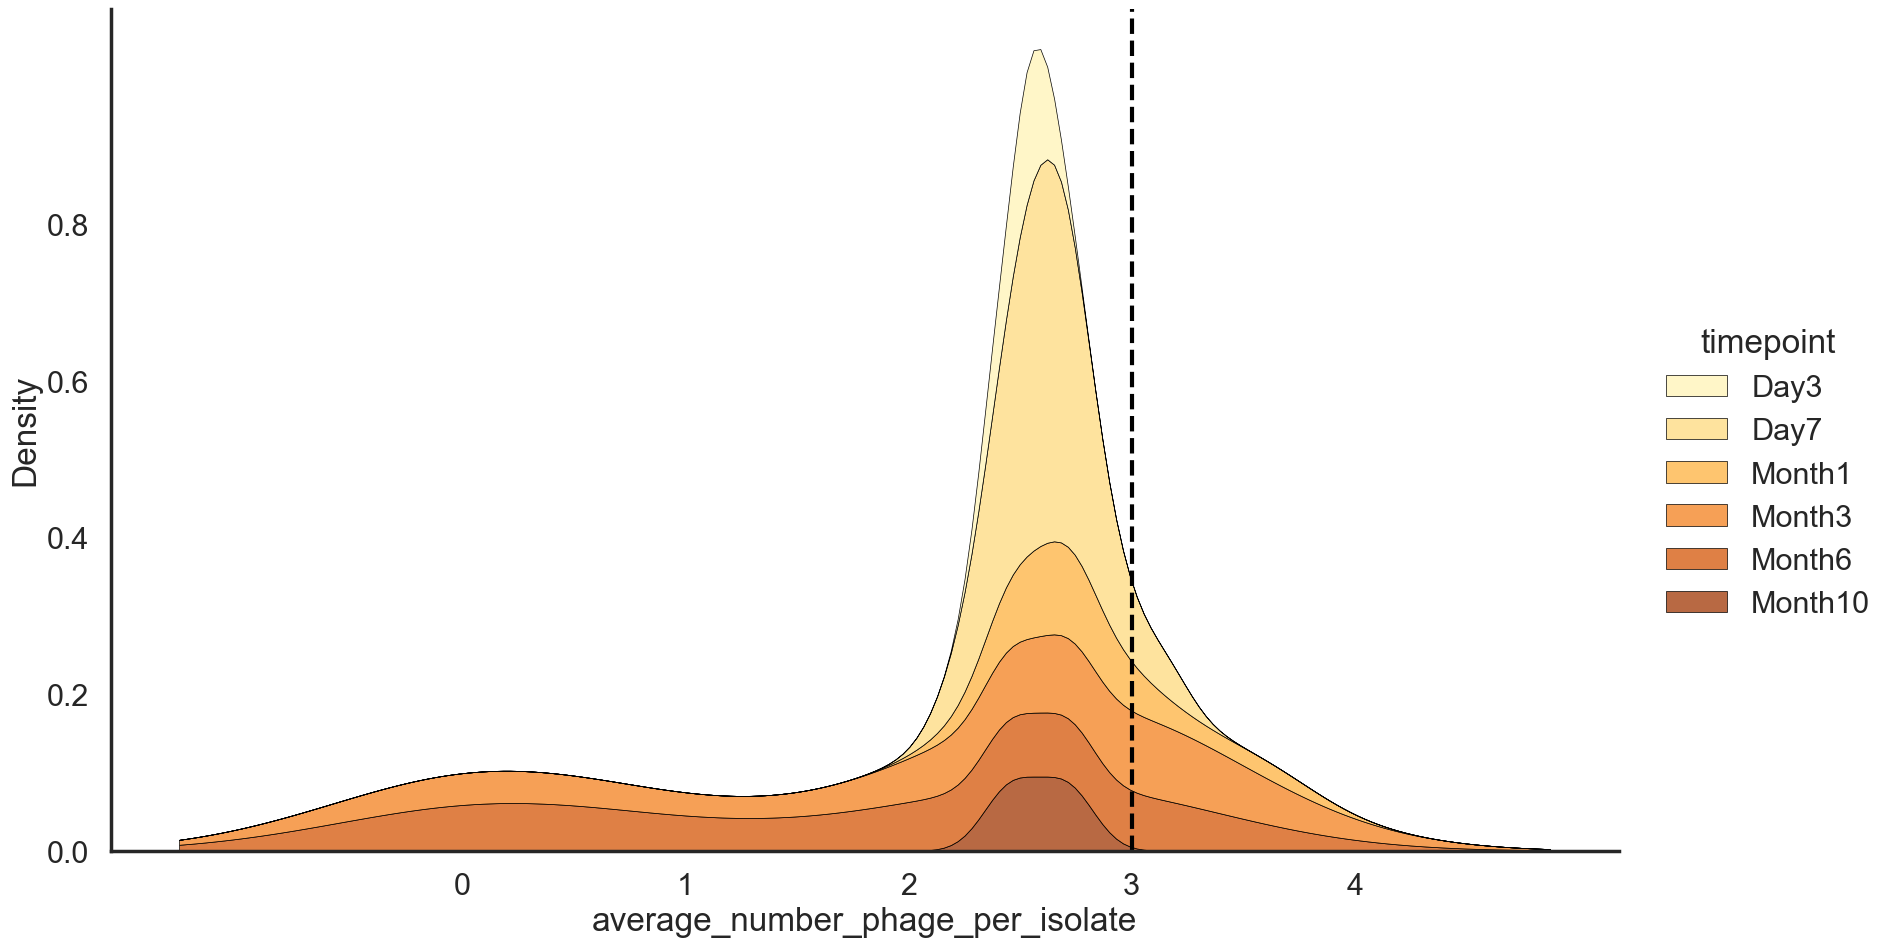

In [53]:
sns.set_style('white')
sns.set_context('poster')
sns.displot(data=Native_summary3, x="average_number_phage_per_isolate", hue="timepoint", 
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], palette='YlOrBr',
            multiple="stack", kind='kde', height=10, aspect=1.7, ec='black', lw=0.5)
plt.axvline(3, c="k", ls='--') #number in reference
plt.yticks(np.arange(0, 1, 0.2))
plt.xticks(np.arange(0, 5, 1))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_avg_phage_number_density_allTP.svg', dpi=150, bbox_inches='tight')

In [31]:
Native_counts = pd.merge(Native_summary, assembly_list, how='outer', 
                         left_on=['mouse', 'timepoint', 'isolate'],
                         right_on=['mouse', 'collection_timepoint', 'isolate'])
Native_counts.drop(columns=['sample', 'isolate', 'cage_id', 'timepoint',
                            'sample_number_x', 'sample_number_y'], inplace=True)
Native_counts['counts'] = Native_counts['counts'].fillna(0)
Native_counts

counts mouse    sample_id           sample-id collection_timepoint
0        3.0   41B  41B_Day7_10     41B_Day7_10_S73                 Day7
1        3.0   41B  41B_Day7_11     41B_Day7_11_S81                 Day7
2        2.0   41B  41B_Day7_12     41B_Day7_12_S89                 Day7
3        3.0   41B  41B_Day7_13      41B_Day7_13_S2                 Day7
4        2.0   41B  41B_Day7_14     41B_Day7_14_S10                 Day7
...      ...   ...          ...                 ...                  ...
1949     0.0   41B          NaN  41B_Month6_23_S562               Month6
1950     0.0   41B          NaN  41B_Month6_24_S570               Month6
1951     0.0   41B          NaN   41B_Month6_2_S489               Month6
1952     0.0   41B          NaN   41B_Month6_3_S497               Month6
1953     0.0   41B          NaN   41B_Month6_4_S505               Month6

[1954 rows x 5 columns]

In [56]:
Native_counts.counts.value_counts()

3.0    1014
2.0     480
0.0     385
4.0      39
1.0      15
5.0      14
6.0       3
8.0       2
7.0       2
Name: counts, dtype: int64

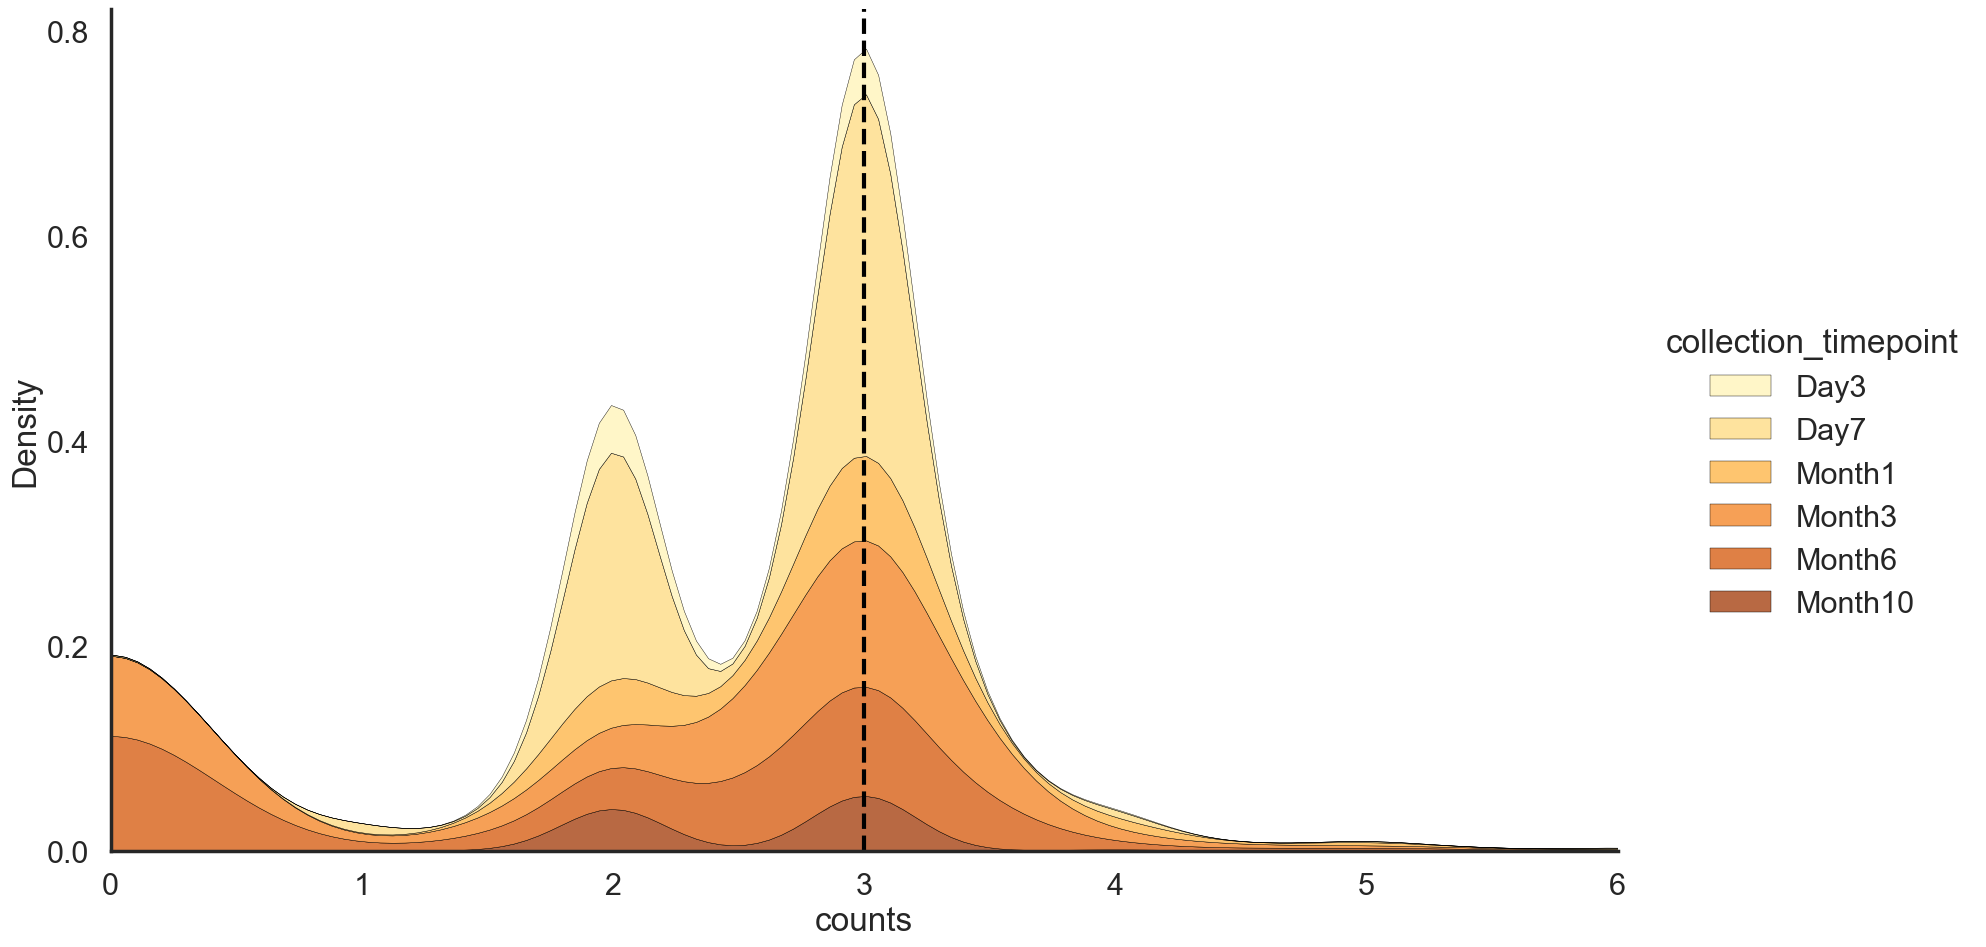

In [55]:
sns.set_context('poster')
sns.displot(data=Native_counts, x="counts", hue="collection_timepoint", 
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], palette='YlOrBr',
            multiple="stack", kind='kde', height=10, aspect=1.7, ec='black', lw=0.3)
plt.axvline(3, c="k", ls='--') #number in reference
plt.yticks(np.arange(0, 1, 0.2))
plt.xticks(np.arange(0, 10, 1))
plt.xlim(0,6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_phage_number_density_allTP.svg', dpi=150, bbox_inches='tight')

In [62]:
Native_counts['sampleid'] = Native_counts['sample-id'].str.rsplit('_', n=1).str[0]
Native_counts

counts mouse    sample_id           sample-id collection_timepoint  \
0        3.0   41B  41B_Day7_10     41B_Day7_10_S73                 Day7   
1        3.0   41B  41B_Day7_11     41B_Day7_11_S81                 Day7   
2        2.0   41B  41B_Day7_12     41B_Day7_12_S89                 Day7   
3        3.0   41B  41B_Day7_13      41B_Day7_13_S2                 Day7   
4        2.0   41B  41B_Day7_14     41B_Day7_14_S10                 Day7   
...      ...   ...          ...                 ...                  ...   
1949     0.0   41B          NaN  41B_Month6_23_S562               Month6   
1950     0.0   41B          NaN  41B_Month6_24_S570               Month6   
1951     0.0   41B          NaN   41B_Month6_2_S489               Month6   
1952     0.0   41B          NaN   41B_Month6_3_S497               Month6   
1953     0.0   41B          NaN   41B_Month6_4_S505               Month6   

     cage_id       sampleid  
0         41    41B_Day7_10  
1         41    41B_Day7_11  
2         41    41B_Day7_12  
3         41    41B_Day7_13  
4         41    41B_Day7_14  
...      ...            ...  
1949      41  41B_Month6_23  
1950      41  41B_Month6_24  
1951      41   41B_Month6_2  
1952      41   41B_Month6_3  
1953      41   41B_Month6_4  

[1954 rows x 7 columns]

In [63]:
Native_counts_named = pd.merge(Native_counts, metadata, left_on='sampleid', right_index=True)
Native_counts_named

counts mouse_x    sample_id           sample-id collection_timepoint_x  \
0        3.0     41B  41B_Day7_10     41B_Day7_10_S73                   Day7   
1        3.0     41B  41B_Day7_11     41B_Day7_11_S81                   Day7   
2        2.0     41B  41B_Day7_12     41B_Day7_12_S89                   Day7   
3        3.0     41B  41B_Day7_13      41B_Day7_13_S2                   Day7   
4        2.0     41B  41B_Day7_14     41B_Day7_14_S10                   Day7   
...      ...     ...          ...                 ...                    ...   
1949     0.0     41B          NaN  41B_Month6_23_S562                 Month6   
1950     0.0     41B          NaN  41B_Month6_24_S570                 Month6   
1951     0.0     41B          NaN   41B_Month6_2_S489                 Month6   
1952     0.0     41B          NaN   41B_Month6_3_S497                 Month6   
1953     0.0     41B          NaN   41B_Month6_4_S505                 Month6   

     cage_id_x       sampleid          sample_name  box_id  cage_id_y  ...  \
0           41    41B_Day7_10    12986.41B.Day7.10     NaN         41  ...   
1           41    41B_Day7_11    12986.41B.Day7.11     NaN         41  ...   
2           41    41B_Day7_12    12986.41B.Day7.12     NaN         41  ...   
3           41    41B_Day7_13    12986.41B.Day7.13     NaN         41  ...   
4           41    41B_Day7_14    12986.41B.Day7.14     NaN         41  ...   
...        ...            ...                  ...     ...        ...  ...   
1949        41  41B_Month6_23  12986.41B.Month6.23     NaN         41  ...   
1950        41  41B_Month6_24  12986.41B.Month6.24     NaN         41  ...   
1951        41   41B_Month6_2   12986.41B.Month6.2     NaN         41  ...   
1952        41   41B_Month6_3   12986.41B.Month6.3     NaN         41  ...   
1953        41   41B_Month6_4   12986.41B.Month6.4     NaN         41  ...   

     zarrinparlab_quant_ng_ul mouse_y dam sire  date_collected  \
0                         NaN     41B  A1    A         9/20/17   
1                         NaN     41B  A1    A         9/20/17   
2                         NaN     41B  A1    A         9/20/17   
3                         NaN     41B  A1    A         9/20/17   
4                         NaN     41B  A1    A         9/20/17   
...                       ...     ...  ..  ...             ...   
1949                      NaN     41B  A1    A         3/13/18   
1950                      NaN     41B  A1    A         3/13/18   
1951                      NaN     41B  A1    A         3/13/18   
1952                      NaN     41B  A1    A         3/13/18   
1953                      NaN     41B  A1    A         3/13/18   

     bacteria_strain extraction_method extraction_kit run plate  
0               AZ51     magnetic bead    Thermo CORE   2   5.0  
1               AZ51     magnetic bead    Thermo CORE   2   5.0  
2               AZ51     magnetic bead    Thermo CORE   2   5.0  
3               AZ51     magnetic bead    Thermo CORE   2   5.0  
4               AZ51     magnetic bead    Thermo CORE   2   5.0  
...              ...               ...            ...  ..   ...  
1949            AZ51     magnetic bead    Thermo CORE   2  17.0  
1950            AZ51     magnetic bead    Thermo CORE   2  17.0  
1951            AZ51     magnetic bead    Thermo CORE   2  17.0  
1952            AZ51     magnetic bead    Thermo CORE   2  17.0  
1953            AZ51     magnetic bead    Thermo CORE   2  17.0  

[1953 rows x 62 columns]

In [74]:
Native_counts_named[['sex', 'counts']].value_counts()

sex     counts
female  3.0       563
male    3.0       450
female  2.0       284
        0.0       221
male    2.0       196
        0.0       164
        4.0        20
female  4.0        19
        1.0        14
        5.0        10
male    5.0         4
female  6.0         3
        7.0         2
        8.0         2
male    1.0         1
dtype: int64

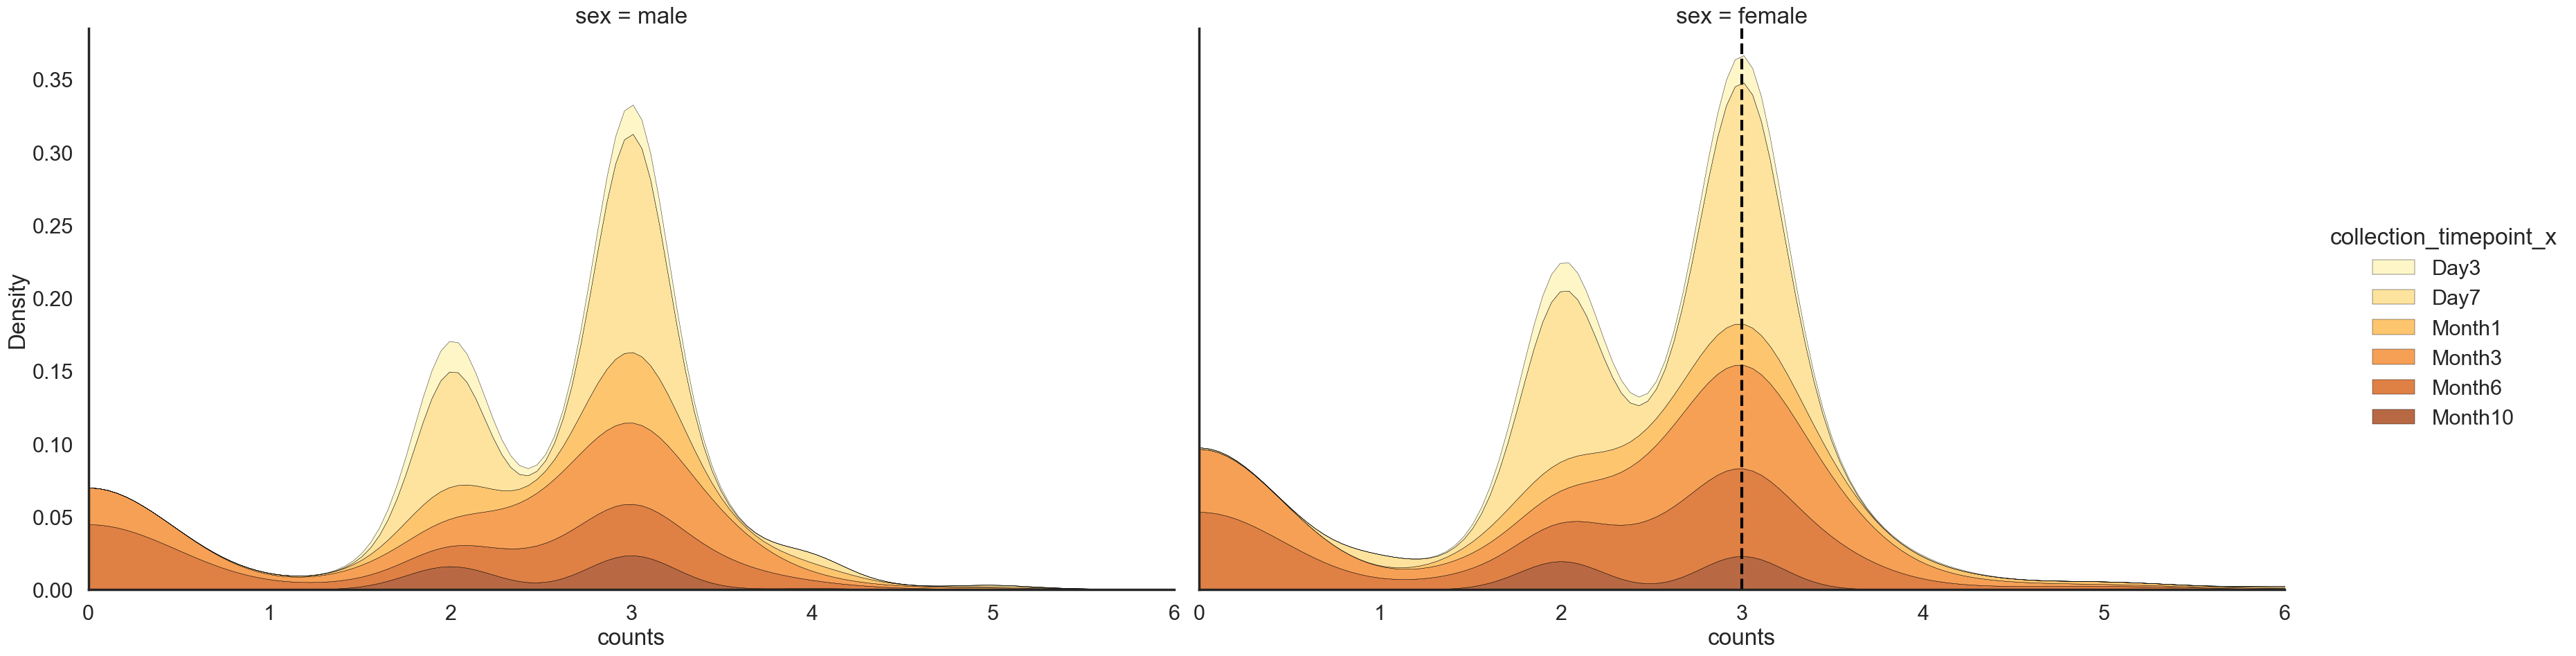

In [72]:
sns.set_context('poster')
sns.displot(data=Native_counts_named, x="counts", hue="collection_timepoint_x", col='sex',
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], palette='YlOrBr',
            multiple="stack", kind='kde', height=10, aspect=1.7, ec='black', lw=0.3)
plt.axvline(3, c="k", ls='--') #number in reference
#plt.yticks(np.arange(0, 1, 0.2))
#plt.xticks(np.arange(0, 10, 1))
plt.xlim(0,6)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_phage_number_density_allTP_sex.png', dpi=150, bbox_inches='tight')

In [32]:
Native_summary_long = Native_counts[Native_counts['mouse'].isin(['41L', '41R', '44R', '46N'])]
Native_summary_short = Native_counts[Native_counts['collection_timepoint'].isin(['Day7', 'Month3', 'Month6'])]

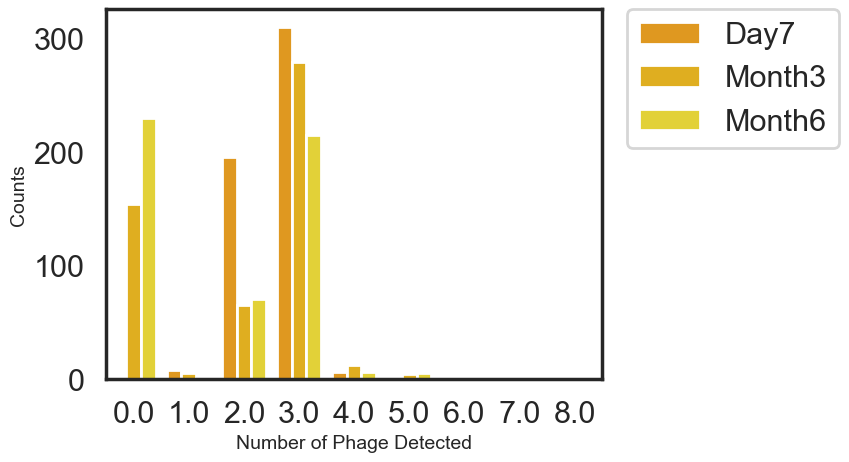

In [33]:
sns.countplot(x="counts", hue='collection_timepoint', palette='Wistia_r', data=Native_summary_short)
plt.xlabel('Number of Phage Detected', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

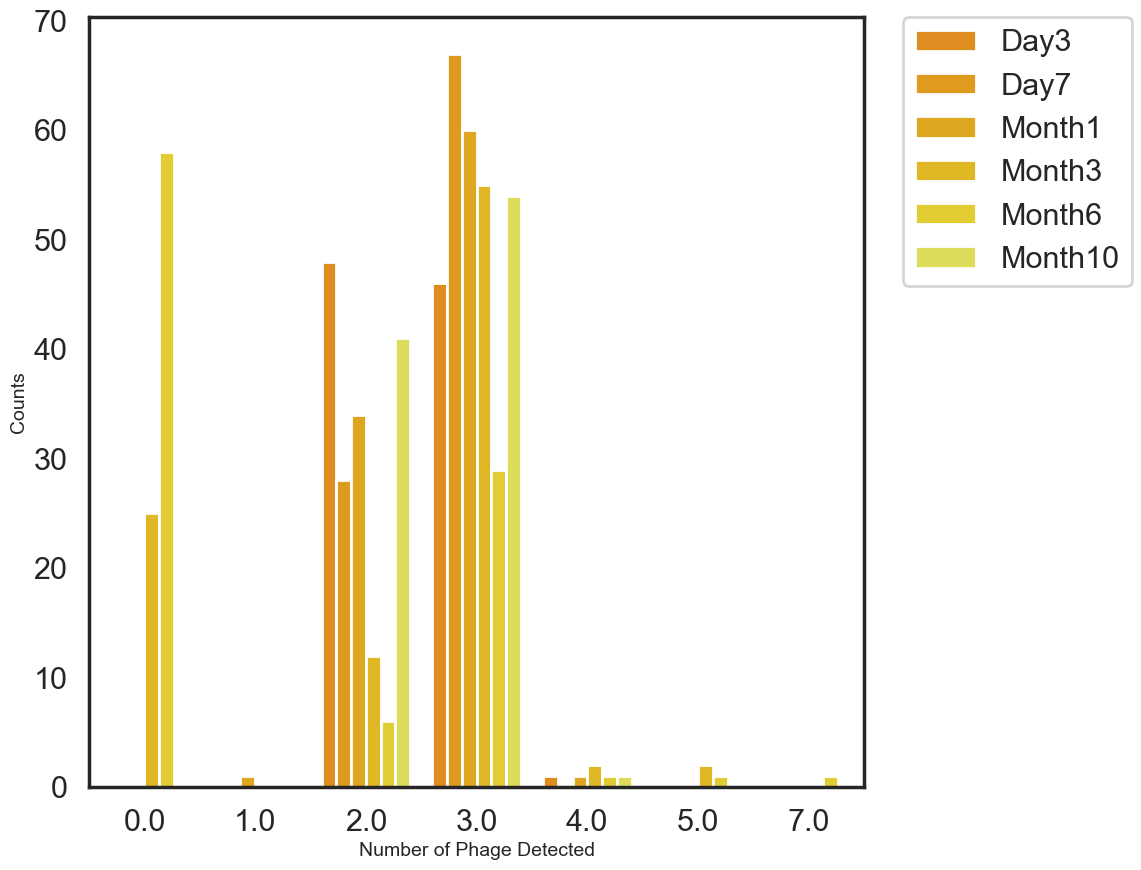

In [34]:
plt.figure(figsize=(10,10))
sns.countplot(x="counts", hue='collection_timepoint', palette='Wistia_r', data=Native_summary_long,
              hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
plt.xlabel('Number of Phage Detected', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

<Figure size 1000x1000 with 0 Axes>

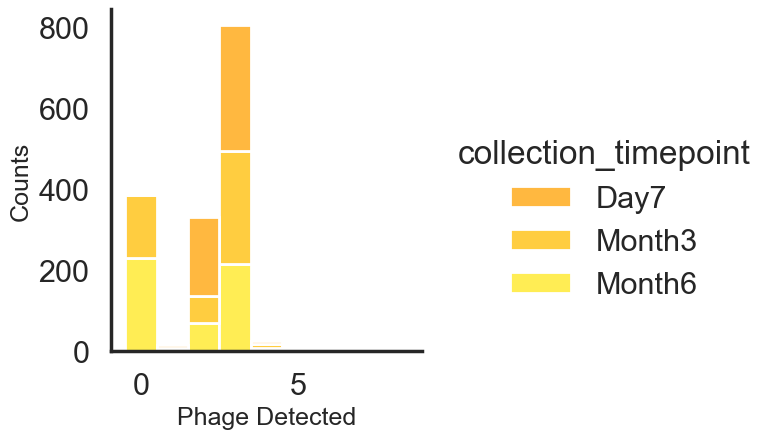

In [35]:
plt.figure(figsize=(10,10))
sns.displot(x="counts", hue='collection_timepoint', palette='Wistia_r', data=Native_summary_short,
              hue_order=['Day7','Month3', 'Month6'], multiple='stack', discrete=True)
plt.xlabel('Phage Detected', fontsize=18)
#plt.xticks(np.arange(0, 4, 1.0))
plt.ylabel('Counts', fontsize=18)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_phage_counts_bar_mainTP.svg', dpi=150, bbox_inches='tight')

In [58]:
Native_summary_short.counts.value_counts()

3.0    804
0.0    385
2.0    330
4.0     24
1.0     14
5.0     10
6.0      2
8.0      2
7.0      1
Name: counts, dtype: int64

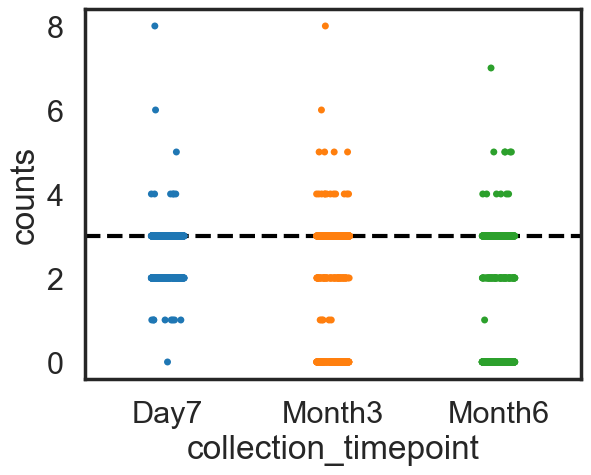

In [40]:
sns.stripplot(x='collection_timepoint', y='counts', data=Native_summary_short)
plt.axhline(3, color='k', linestyle='--')

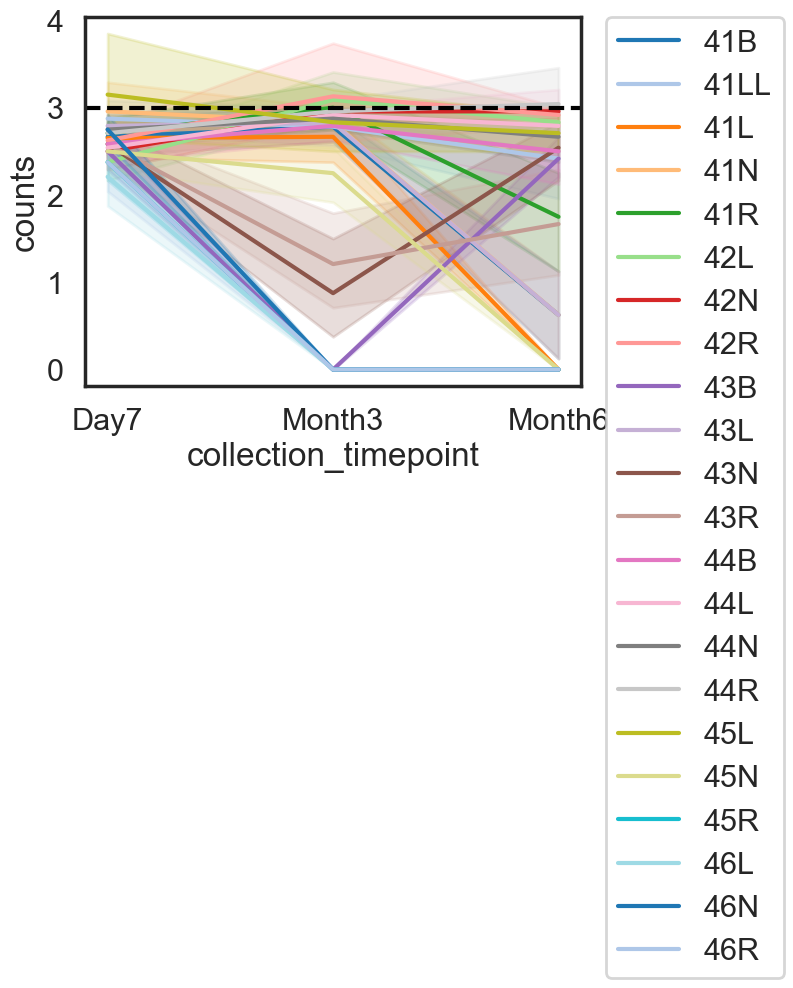

In [41]:
sns.lineplot(x='collection_timepoint', y='counts', hue='mouse', palette='tab20', data=Native_summary_short)
plt.axhline(3, color='k', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [42]:
Native_counts['cage_id'] = Native_counts['mouse'].str[:2]
Native_counts

counts mouse    sample_id           sample-id collection_timepoint  \
0        3.0   41B  41B_Day7_10     41B_Day7_10_S73                 Day7   
1        3.0   41B  41B_Day7_11     41B_Day7_11_S81                 Day7   
2        2.0   41B  41B_Day7_12     41B_Day7_12_S89                 Day7   
3        3.0   41B  41B_Day7_13      41B_Day7_13_S2                 Day7   
4        2.0   41B  41B_Day7_14     41B_Day7_14_S10                 Day7   
...      ...   ...          ...                 ...                  ...   
1949     0.0   41B          NaN  41B_Month6_23_S562               Month6   
1950     0.0   41B          NaN  41B_Month6_24_S570               Month6   
1951     0.0   41B          NaN   41B_Month6_2_S489               Month6   
1952     0.0   41B          NaN   41B_Month6_3_S497               Month6   
1953     0.0   41B          NaN   41B_Month6_4_S505               Month6   

     cage_id  
0         41  
1         41  
2         41  
3         41  
4         41  
...      ...  
1949      41  
1950      41  
1951      41  
1952      41  
1953      41  

[1954 rows x 6 columns]

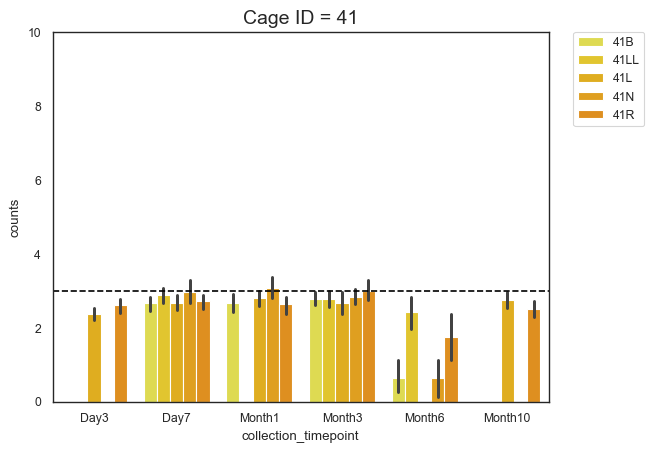

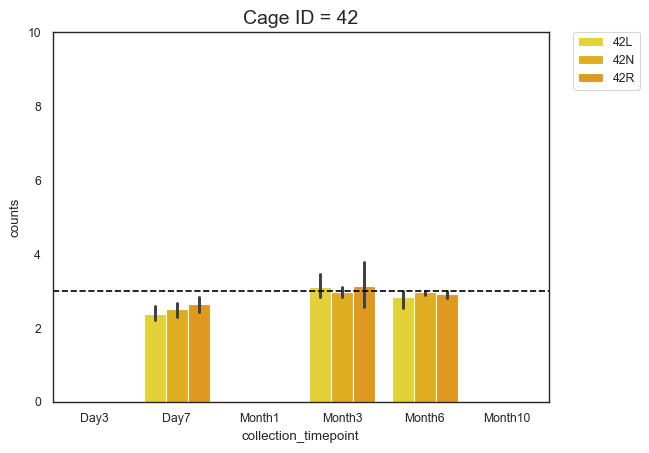

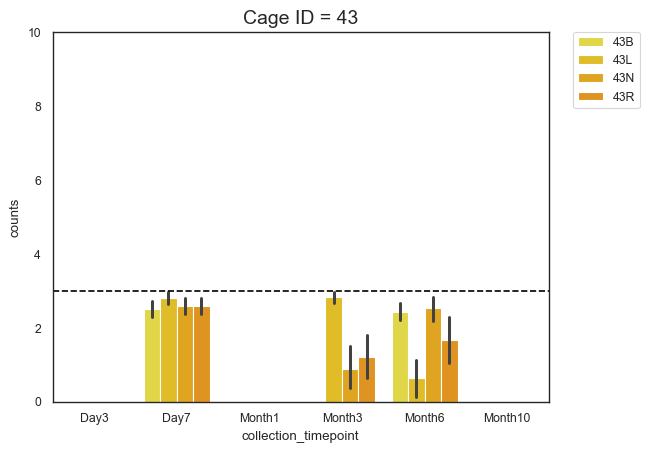

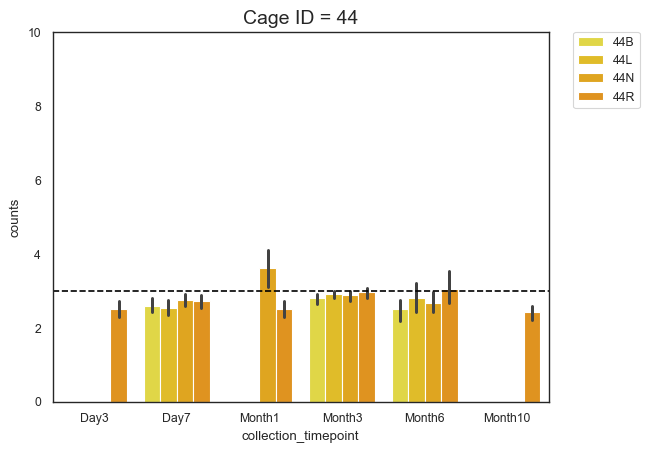

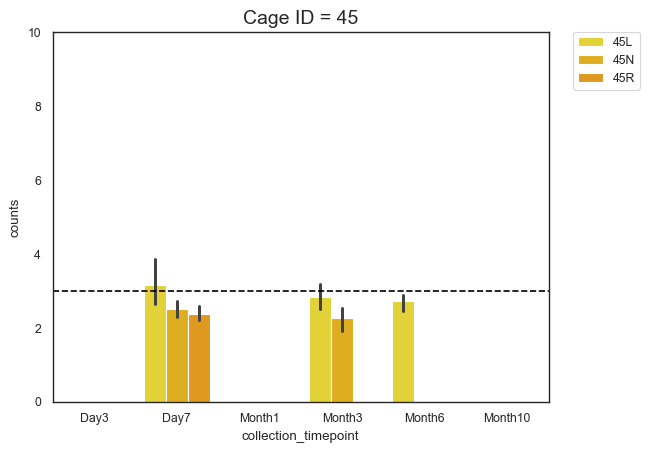

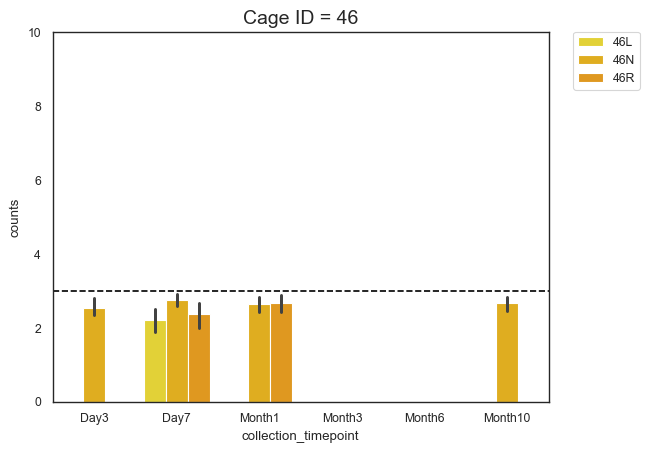

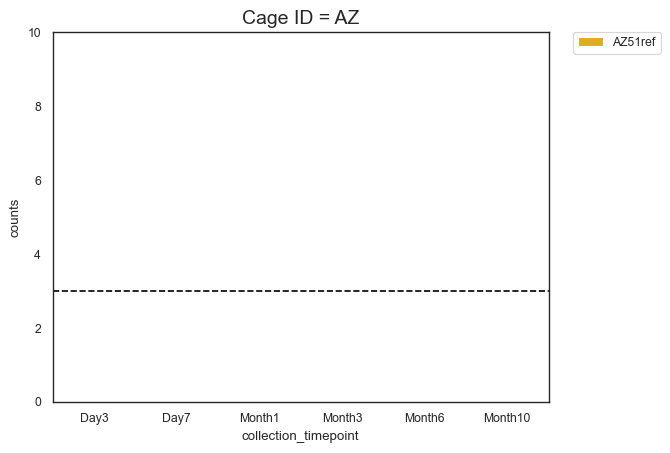

In [43]:
sns.set_context('paper')
for mus in Native_counts.cage_id.unique():
    g = sns.barplot(x="collection_timepoint", y="counts", hue="mouse", palette='Wistia',
                    order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
                         data=Native_counts[Native_counts['cage_id'] == mus])
    plt.title("Cage ID = %s" % mus, fontsize=14)
    plt.ylim(0, 10)
    plt.axhline(3, color='k', linestyle='--')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('figures/AZ51_phage_bar_cage%s.svg' % mus, dpi=150, bbox_inches='tight')
    plt.show()

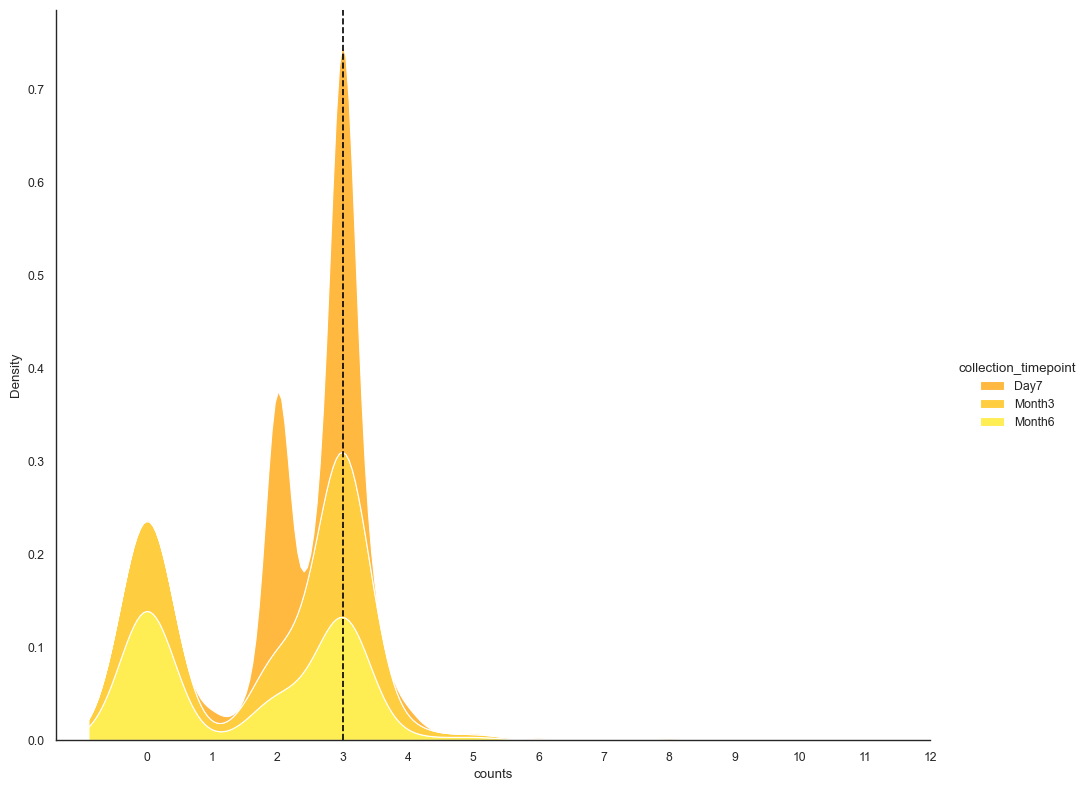

In [44]:
sns.displot(data=Native_summary_short, x="counts", hue="collection_timepoint", 
            hue_order=['Day7', 'Month3', 'Month6'], palette='Wistia_r',
            multiple="stack", kind='kde', height=8, aspect=1.2)
plt.axvline(3, c="k", ls='--') #number in reference
plt.xticks(range(0, 13))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_phage_number_density_mainTP.svg', dpi=150, bbox_inches='tight')
#mostly 3 phage - mostly less

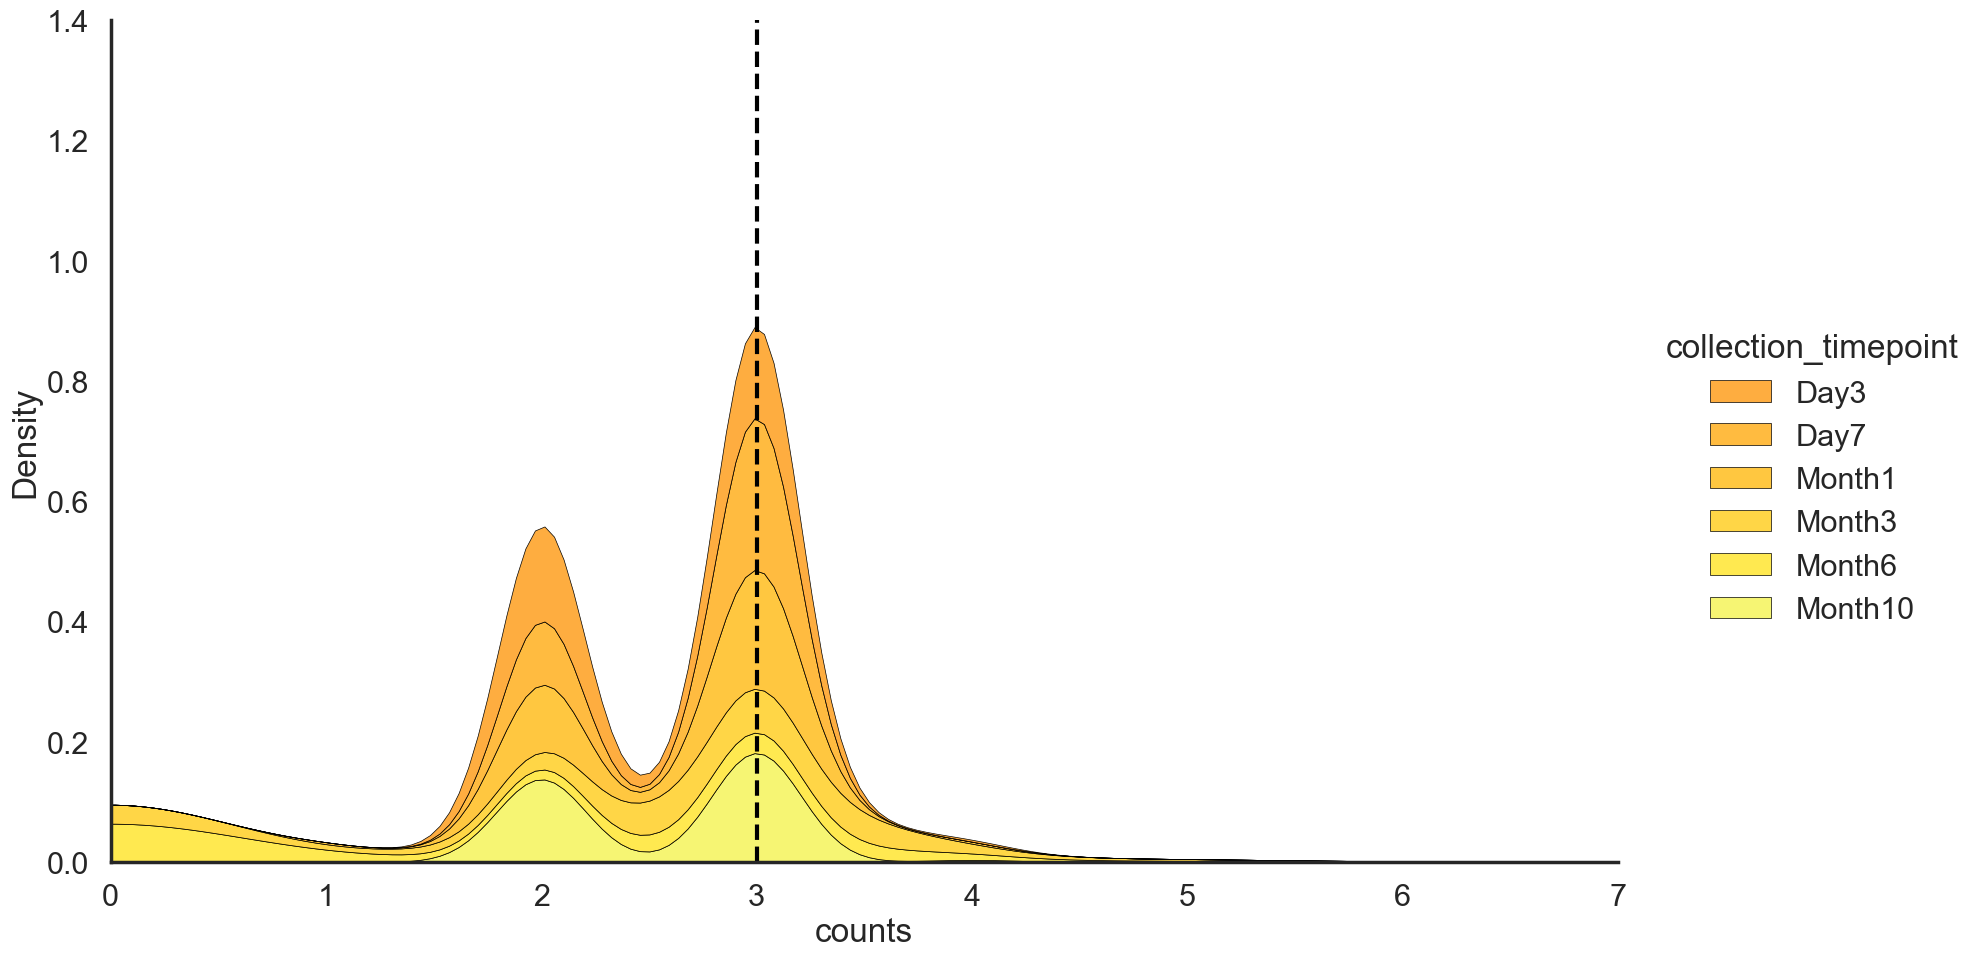

In [49]:
sns.set_style('white')
sns.set_context('poster')
sns.displot(data=Native_summary_long, x="counts", hue="collection_timepoint", 
            hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], palette='Wistia_r',
            multiple="stack", kind='kde', height=10, aspect=1.7, ec='black', lw=0.5)
plt.axvline(3, c="k", ls='--') #number in reference
plt.yticks(np.arange(0, 1.6, 0.2))
plt.xticks(np.arange(0, 10, 1))
plt.xlim(0,7)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_phage_number_density_allTPfew.svg', dpi=150, bbox_inches='tight')

In [47]:
Native_summary_long.counts.value_counts()

3.0    311
2.0    169
0.0     83
4.0      6
5.0      3
1.0      1
7.0      1
Name: counts, dtype: int64

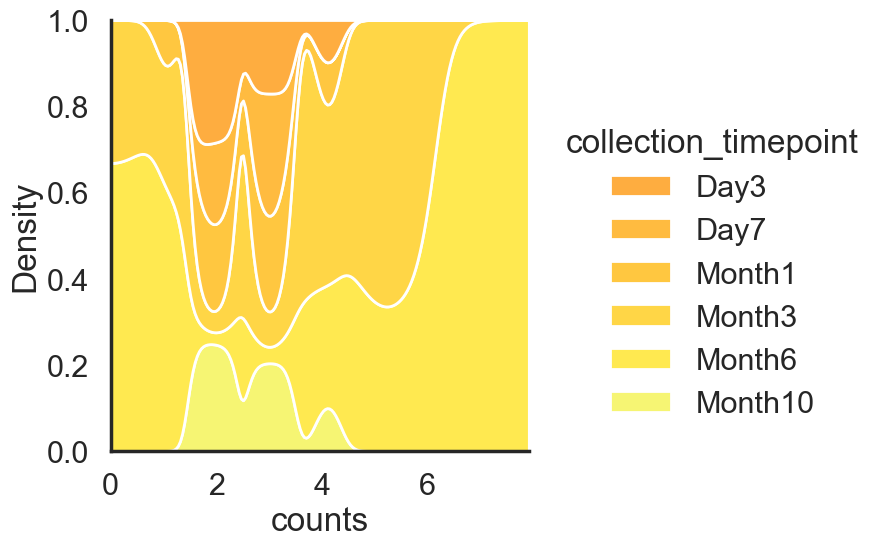

In [76]:
sns.displot(
    data=Native_summary_long,
    x="counts", hue="collection_timepoint",
    kind="kde", height=6, warn_singular=False, hue_order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'],
    multiple="fill", clip=(0, None),
    palette="Wistia_r")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_phage_fun.svg', dpi=150, bbox_inches='tight')

In [77]:
Native_counts['isolate'] = Native_counts['sample-id'].str.split('_').str[2]
Native_counts

counts mouse    sample_id           sample-id collection_timepoint  \
0        3.0   41B  41B_Day7_10     41B_Day7_10_S73                 Day7   
1        3.0   41B  41B_Day7_11     41B_Day7_11_S81                 Day7   
2        2.0   41B  41B_Day7_12     41B_Day7_12_S89                 Day7   
3        3.0   41B  41B_Day7_13      41B_Day7_13_S2                 Day7   
4        2.0   41B  41B_Day7_14     41B_Day7_14_S10                 Day7   
...      ...   ...          ...                 ...                  ...   
1949     0.0   41B          NaN  41B_Month6_23_S562               Month6   
1950     0.0   41B          NaN  41B_Month6_24_S570               Month6   
1951     0.0   41B          NaN   41B_Month6_2_S489               Month6   
1952     0.0   41B          NaN   41B_Month6_3_S497               Month6   
1953     0.0   41B          NaN   41B_Month6_4_S505               Month6   

     cage_id isolate  
0         41      10  
1         41      11  
2         41      12  
3         41      13  
4         41      14  
...      ...     ...  
1949      41      23  
1950      41      24  
1951      41       2  
1952      41       3  
1953      41       4  

[1954 rows x 7 columns]

In [78]:
AZ51_phagecounts2 = Native_counts[["collection_timepoint", 'counts']].copy()
AZ51_phagecount_tp = AZ51_phagecounts2.groupby(by=["collection_timepoint"]).sum()

AZ51_phagecounts3 = Native_counts[["collection_timepoint", 'isolate']].copy()
AZ51_phagecount_iso= AZ51_phagecounts3.groupby(by=["collection_timepoint"]).count()

AZ51_phage_summary = pd.concat([AZ51_phagecount_tp, AZ51_phagecount_iso], axis=1)
AZ51_phage_summary['average_phage_per_isolate'] =AZ51_phage_summary['counts']/AZ51_phage_summary['isolate']
AZ51_phage_summary.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

counts  isolate  average_phage_per_isolate
collection_timepoint                                            
Day3                   238.0       95                   2.505263
Day7                  1371.0      523                   2.621415
Month1                 535.0      190                   2.815789
Month3                1054.0      521                   2.023033
Month6                 842.0      528                   1.594697
Month10                248.0       96                   2.583333

In [79]:
Native_counts[Native_counts['collection_timepoint']=='Day3'].mouse.unique()

array(['41L', '41R', '44R', '46N'], dtype=object)

In [80]:
extra_tp_mice = ['41L', '41R', '44R', '46N']
etp_mice_phages = Native_counts[Native_counts.mouse.isin(extra_tp_mice)]

etp_mice_phagec = etp_mice_phages[["collection_timepoint", 'isolate']].copy()
etp_mice_phage_isocounts = etp_mice_phagec.groupby(by=["collection_timepoint"]).count()

etp_mice_phagecn = etp_mice_phages[["collection_timepoint", 'counts']].copy()
etp_mice_phage_pcounts = etp_mice_phagecn.groupby(by=["collection_timepoint"]).sum()

AZ51_etp_summary = pd.concat([etp_mice_phage_pcounts, etp_mice_phage_isocounts], axis=1)
AZ51_etp_summary['average_phages_per_isolate'] =AZ51_etp_summary['counts']/AZ51_etp_summary['isolate']
AZ51_etp_summary.reindex(['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

counts  isolate  average_phages_per_isolate
collection_timepoint                                             
Day3                   238.0       95                    2.505263
Day7                   257.0       95                    2.705263
Month1                 253.0       96                    2.635417
Month3                 207.0       96                    2.156250
Month6                 115.0       96                    1.197917
Month10                248.0       96                    2.583333

In [81]:
Native_overview.columns

Index(['sample', 'phage_id', 'VIRSorter category', 'Circular', 'Prophage',
       'Gene count', 'Strand switches', 'potential AMG count',
       'Transposase present', 'Possible Non-Viral Contig',
       'Viral genes with unknown function', 'Viral genes with host benefits',
       'Viral structure genes', 'Viral hypothetical genes',
       'Viral genes with viral benefits', 'Viral replication genes',
       'identification'],
      dtype='object')

In [82]:
Native_types = Native_overview[['Viral genes with host benefits', 'Viral genes with unknown function',
       'Viral structure genes', 'Viral hypothetical genes',
       'Viral genes with viral benefits', 'Viral replication genes', 'Gene count', 'sample']].copy()
Native_types_sum = Native_types.groupby(by=['sample']).sum().reset_index()
Native_types_sum[['mouse', 'timepoint', 'isolate', 'sample_number']] = Native_types_sum["sample"].str.split("_", n=3, expand=True)
Native_types_sum["cage_id"] = Native_types_sum['mouse'].str[:2]
Native_types_sum.head()

sample  Viral genes with host benefits  \
0  41B_Day7_10_S73_L002                            29.0   
1  41B_Day7_11_S81_L002                             8.0   
2  41B_Day7_12_S89_L002                             8.0   
3   41B_Day7_13_S2_L002                             8.0   
4  41B_Day7_14_S10_L002                             8.0   

   Viral genes with unknown function  Viral structure genes  \
0                               33.0                    2.0   
1                               33.0                   14.0   
2                               31.0                   14.0   
3                               33.0                   26.0   
4                               31.0                   13.0   

   Viral hypothetical genes  Viral genes with viral benefits  \
0                      33.0                             18.0   
1                      33.0                             18.0   
2                      21.0                              9.0   
3                      33.0                              8.0   
4                      21.0                             10.0   

   Viral replication genes  Gene count mouse timepoint isolate sample_number  \
0                      6.0         121   41B      Day7      10      S73_L002   
1                     15.0         121   41B      Day7      11      S81_L002   
2                     23.0         106   41B      Day7      12      S89_L002   
3                     13.0         121   41B      Day7      13       S2_L002   
4                     23.0         106   41B      Day7      14      S10_L002   

  cage_id  
0      41  
1      41  
2      41  
3      41  
4      41

In [83]:
relevent_col = ['Viral genes with host benefits', 'Viral genes with unknown function',
       'Viral structure genes', 'Viral hypothetical genes',
       'Viral genes with viral benefits', 'Viral replication genes',
       'Gene count']

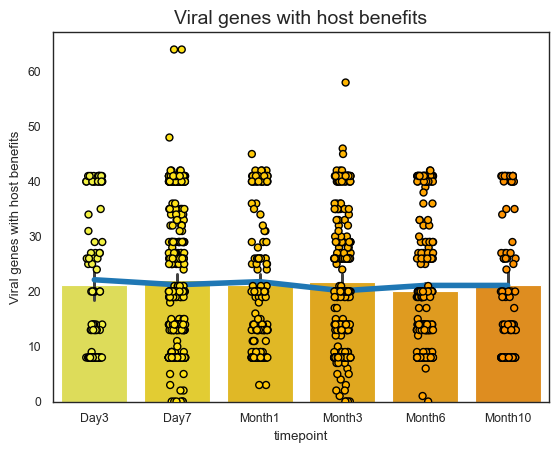

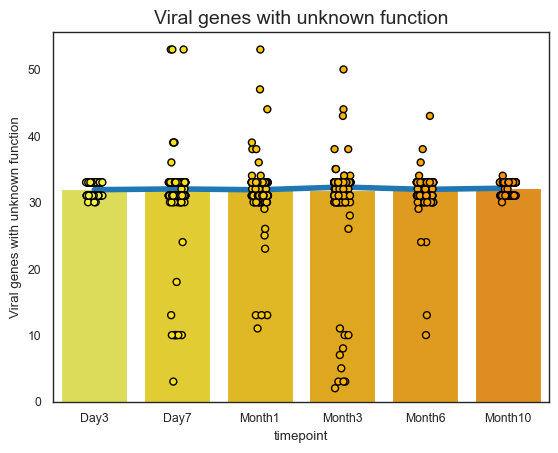

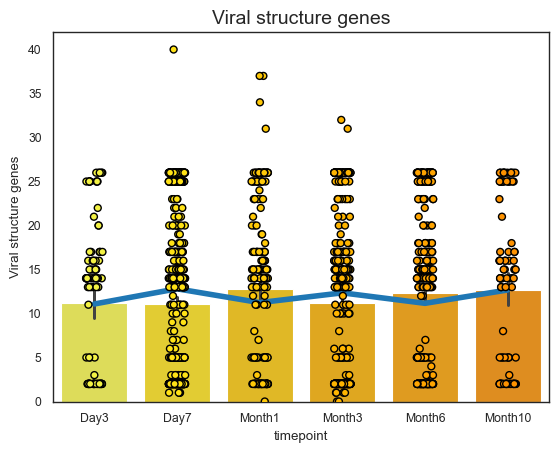

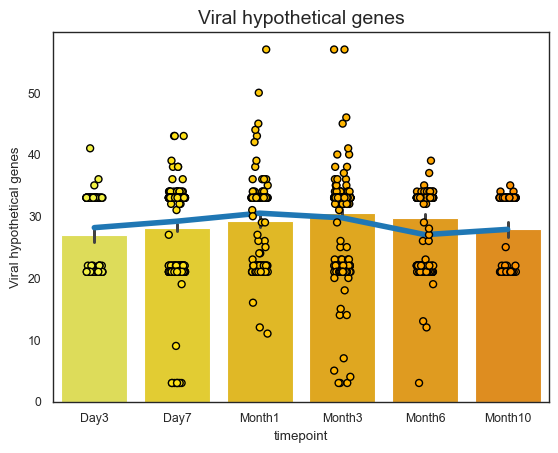

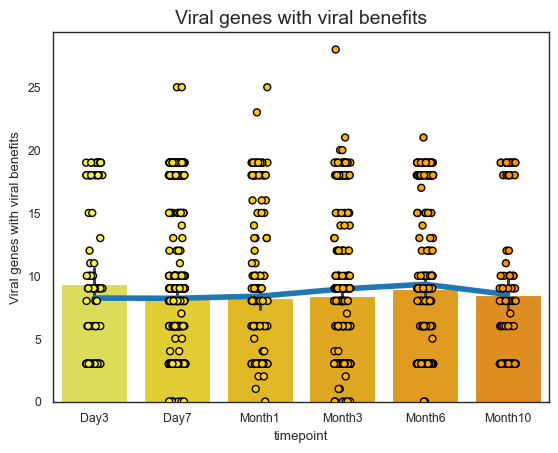

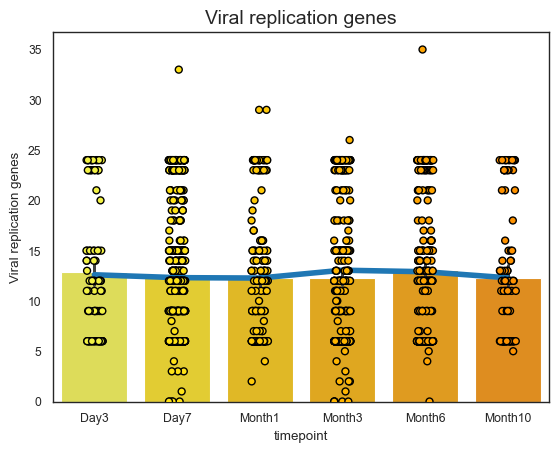

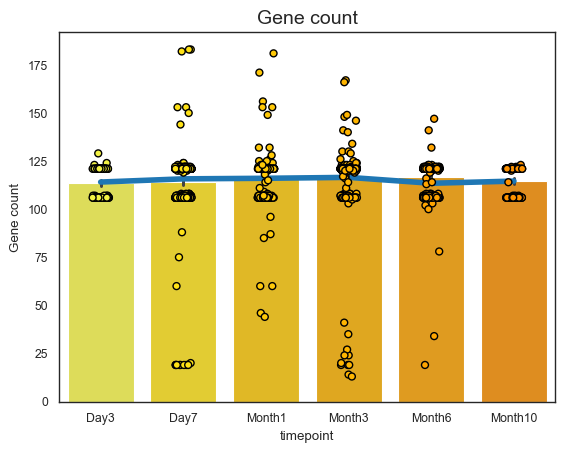

In [84]:
sns.set_context('paper')
for col in relevent_col:
    g= sns.barplot(data=Native_types_sum, x='timepoint', y=col, palette='Wistia',
               order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
    g= sns.lineplot(data=Native_types_sum, x='timepoint', y=col, ci=None, linewidth=4, palette='k')
    g= sns.stripplot(data=Native_types_sum, x='timepoint', y=col, edgecolor='k', linewidth=1, palette='Wistia',
                 order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
    plt.title(col, fontsize=14)
    plt.show()

In [85]:
Native_types_sum['percent_host_benefit'] = Native_types_sum['Viral genes with host benefits']/Native_types_sum['Gene count']
Native_types_sum['percent_viral_benefit'] = Native_types_sum['Viral genes with viral benefits']/Native_types_sum['Gene count']
Native_types_sum['percent_unknown'] = (Native_types_sum['Viral genes with unknown function']+Native_types_sum['Viral hypothetical genes'])/Native_types_sum['Gene count']
Native_types_sum['percent_viral_structure'] = Native_types_sum['Viral structure genes']/Native_types_sum['Gene count']
Native_types_sum['percent_viral_replication'] = Native_types_sum['Viral replication genes']/Native_types_sum['Gene count']
Native_types_sum['percent_viral'] = (Native_types_sum['Viral genes with viral benefits']+Native_types_sum['Viral structure genes']+Native_types_sum['Viral replication genes'])/Native_types_sum['Gene count']

In [86]:
Native_types_sum.columns

Index(['sample', 'Viral genes with host benefits',
       'Viral genes with unknown function', 'Viral structure genes',
       'Viral hypothetical genes', 'Viral genes with viral benefits',
       'Viral replication genes', 'Gene count', 'mouse', 'timepoint',
       'isolate', 'sample_number', 'cage_id', 'percent_host_benefit',
       'percent_viral_benefit', 'percent_unknown', 'percent_viral_structure',
       'percent_viral_replication', 'percent_viral'],
      dtype='object')

In [87]:
Native_prop = pd.melt(Native_types_sum, id_vars=['mouse', 'timepoint', 'isolate', 'cage_id',], 
                      value_vars=['percent_host_benefit', 'percent_viral_benefit', 'percent_unknown', 
                                  'percent_viral_structure', 'percent_viral_replication'])
Native_prop.head()

mouse timepoint isolate cage_id              variable     value
0   41B      Day7      10      41  percent_host_benefit  0.239669
1   41B      Day7      11      41  percent_host_benefit  0.066116
2   41B      Day7      12      41  percent_host_benefit  0.075472
3   41B      Day7      13      41  percent_host_benefit  0.066116
4   41B      Day7      14      41  percent_host_benefit  0.075472

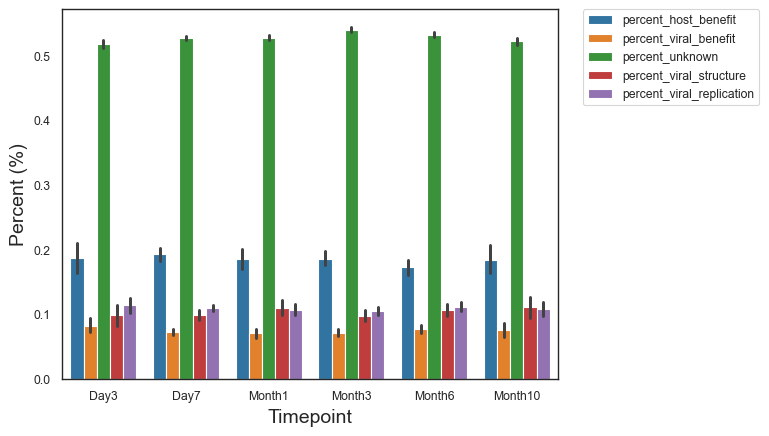

In [88]:
sns.barplot(data=Native_prop, x='timepoint', order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
           y='value', hue='variable')
plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../../figures/phage_bar_miceallTP.svg' % mus, dpi=150, bbox_inches='tight')

In [89]:
Native_pie = Native_prop[['timepoint', 'variable', 'value']].copy()
Native_pie2 = Native_pie.groupby(by=['timepoint', 'variable']).mean()
Native_pie3 = Native_pie2.reset_index()
Native_pie3.head()

timepoint                   variable     value
0      Day3       percent_host_benefit  0.187033
1      Day3            percent_unknown  0.517785
2      Day3      percent_viral_benefit  0.082522
3      Day3  percent_viral_replication  0.113714
4      Day3    percent_viral_structure  0.098946

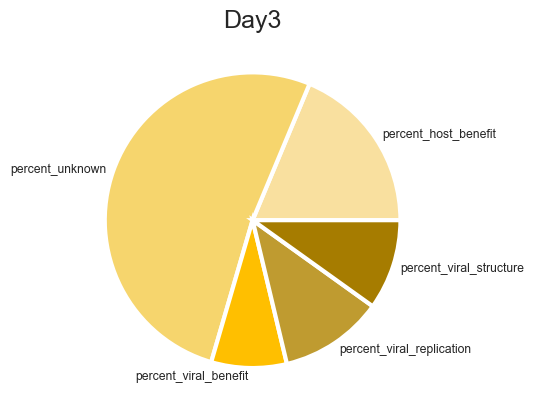

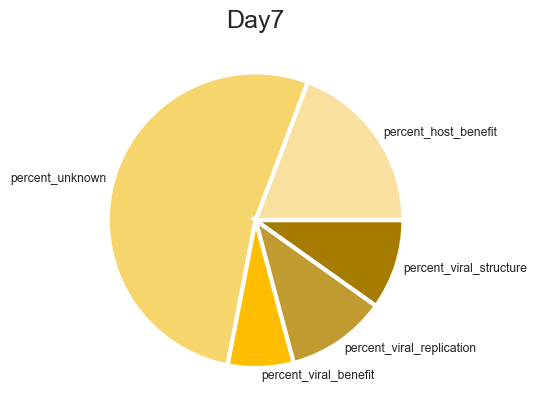

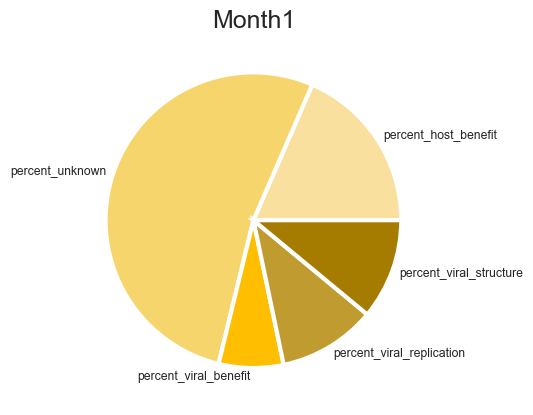

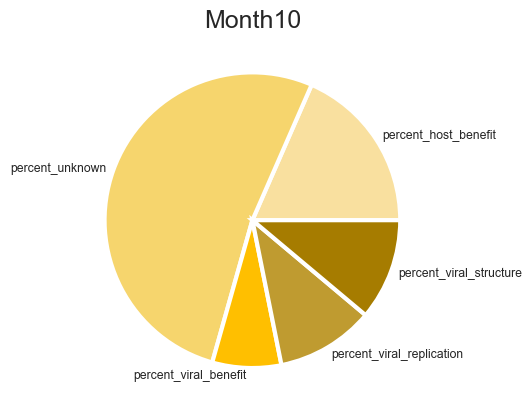

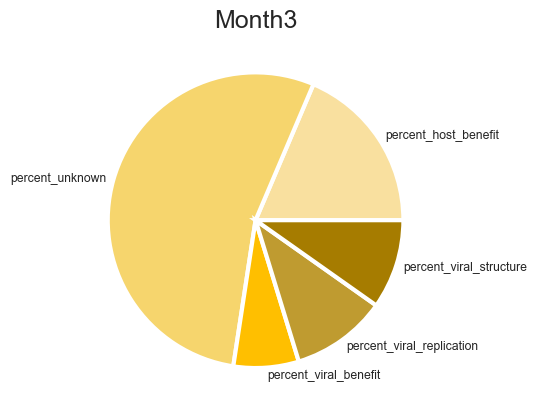

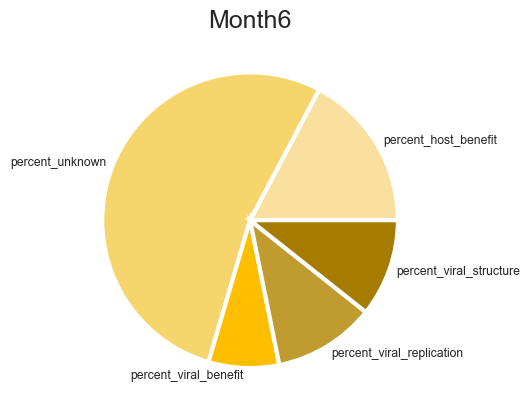

In [90]:
for tp in list(Native_pie3.timepoint.unique()):
    
    pie_chart = Native_pie3[Native_pie3.timepoint == tp]
    
    names=list(pie_chart.variable.unique())
    values=list(pie_chart.value.unique())
    
    plt.title("%s" %tp, fontsize=18)
 
    plt.pie(values, labels=names, labeldistance=1.05,
           wedgeprops={'linewidth':3, 'edgecolor':'white'},
           colors=['#f9e09f', '#f6d56d', '#ffbf00', '#bf9b30', '#a67c00'])
    
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.savefig('figures/AZ51_phage_pie_%s.svg' %tp, dpi=150, bbox_inches='tight')
    plt.show()
    ##ffcf40, #ffdc73

In [91]:
mapp = {'Day3':0, 'Day7':1, 'Month1':2, 'Month3':3, 'Month6':4, 'Month10':5}
Native_prop['tp'] = Native_prop['timepoint'].map(mapp)
Native_types_sum['tp'] = Native_types_sum['timepoint'].map(mapp)

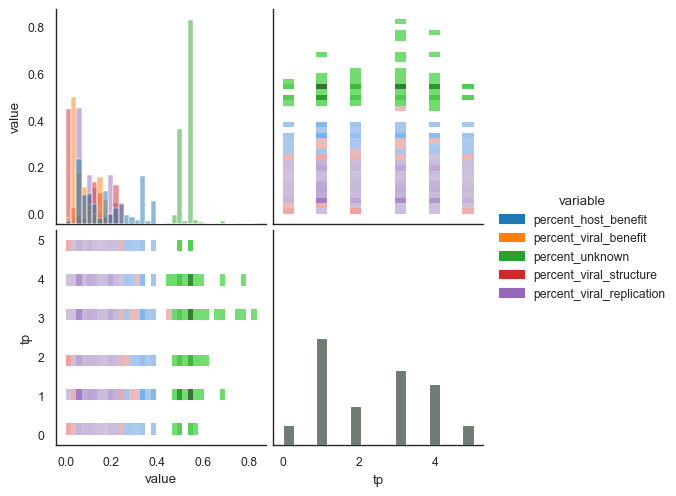

In [92]:
g = sns.pairplot(data=Native_prop, hue='variable', kind='hist')
plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../../figures/phage_bar_miceallTP.svg' % mus, dpi=150, bbox_inches='tight')

In [93]:
perc_col = ['percent_host_benefit', 'percent_viral_benefit', 'percent_unknown', 
                                  'percent_viral_structure', 'percent_viral_replication']

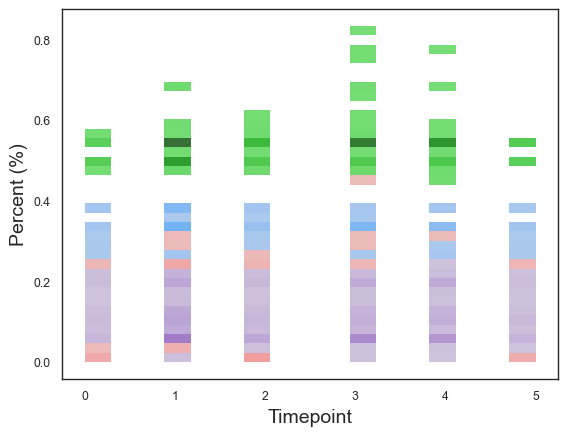

In [94]:
sns.histplot(data=Native_prop, y='value', x='tp', hue='variable', legend=False)
plt.xlabel('Timepoint', fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'

In [95]:
Native_htmp = Native_types_sum[['percent_host_benefit', 'percent_viral', 'percent_unknown', 
                                  'mouse','timepoint']].copy()

In [96]:
Native_htmp['timepoint'] = pd.Categorical(Native_htmp['timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [97]:
Native_htmp.sort_values(by=['mouse', 'timepoint']).set_index(['mouse', 'timepoint'])

percent_host_benefit  percent_viral  percent_unknown
mouse   timepoint                                                      
41B     Day7                   0.239669       0.214876         0.545455
        Day7                   0.066116       0.388430         0.545455
        Day7                   0.075472       0.433962         0.490566
        Day7                   0.066116       0.388430         0.545455
        Day7                   0.075472       0.433962         0.490566
...                                 ...            ...              ...
46R     Month1                 0.074766       0.429907         0.495327
        Month1                 0.066116       0.388430         0.545455
        Month1                 0.289256       0.165289         0.545455
        Month1                 0.325203       0.113821         0.560976
AZ51ref nan                    0.115702       0.338843         0.545455

[1569 rows x 3 columns]

In [98]:
sns.clustermap(data=Native_htmp.sort_values(by=['mouse', 'timepoint']).set_index(['mouse', 'timepoint']), 
              cmap='YlOrBr', yticklabels=1, figsize=(50, 200))
plt.savefig('figures/AZ51_phage_clustermap.jpg', dpi=150)

In [99]:
Native_htmp = Native_types_sum[['percent_host_benefit', 'percent_viral', 'percent_unknown', 
                                  'cage_id','timepoint']].copy()

In [100]:
Native_htmp['timepoint'] = pd.Categorical(Native_htmp['timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [101]:
Native_htmp.groupby(by=['cage_id', 'timepoint']).median().dropna(axis=0)

percent_host_benefit  percent_viral  percent_unknown
cage_id timepoint                                                      
41      Day3                   0.165289       0.289256         0.495327
        Day7                   0.179245       0.289256         0.545455
        Month1                 0.132075       0.338843         0.545455
        Month3                 0.165289       0.289256         0.545455
        Month6                 0.165289       0.289256         0.545455
        Month10                0.187798       0.303507         0.545455
42      Day7                   0.179245       0.289256         0.520391
        Month3                 0.165289       0.289256         0.545455
        Month6                 0.107438       0.347107         0.545455
43      Day7                   0.165289       0.313855         0.545455
        Month3                 0.165289       0.289256         0.545455
        Month6                 0.172956       0.318711         0.545455
44      Day3                   0.115040       0.366950         0.495327
        Day7                   0.179245       0.289256         0.545455
        Month1                 0.165289       0.289256         0.540984
        Month3                 0.165289       0.289256         0.545455
        Month6                 0.166667       0.320755         0.530973
        Month10                0.122642       0.382075         0.490566
45      Day7                   0.149639       0.333127         0.540984
        Month3                 0.165289       0.289256         0.545455
        Month6                 0.075472       0.366950         0.545455
46      Day3                   0.132075       0.329799         0.518010
        Day7                   0.157025       0.315789         0.545455
        Month1                 0.107438       0.347107         0.545455
        Month10                0.111570       0.347107         0.545455

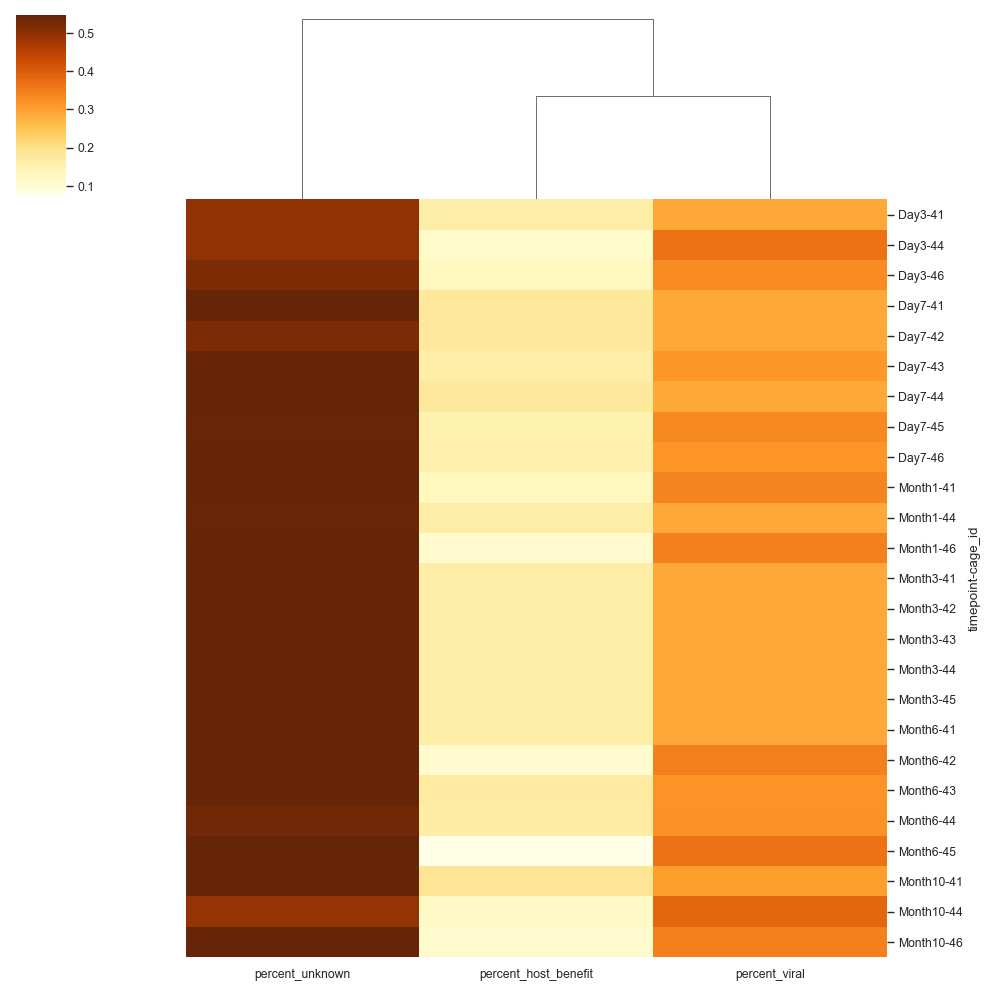

In [102]:
sns.clustermap(data=Native_htmp.groupby(by=['timepoint', 'cage_id']).median().dropna(axis=0), 
               row_cluster=False, 
              cmap='YlOrBr')

In [103]:
Native_htmp2 = Native_types_sum[['percent_host_benefit', 'percent_viral', 'percent_unknown', 
                                  'timepoint']].copy()

In [104]:
Native_htmp2['timepoint'] = pd.Categorical(Native_htmp2['timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [105]:
Native_htmp2.groupby(by=['timepoint']).median().dropna(axis=0)

percent_host_benefit  percent_viral  percent_unknown
timepoint                                                      
Day3                   0.132075       0.338843         0.495327
Day7                   0.165289       0.289256         0.545455
Month1                 0.137320       0.336088         0.545455
Month3                 0.165289       0.289256         0.545455
Month6                 0.147957       0.330189         0.545455
Month10                0.156529       0.334516         0.545455

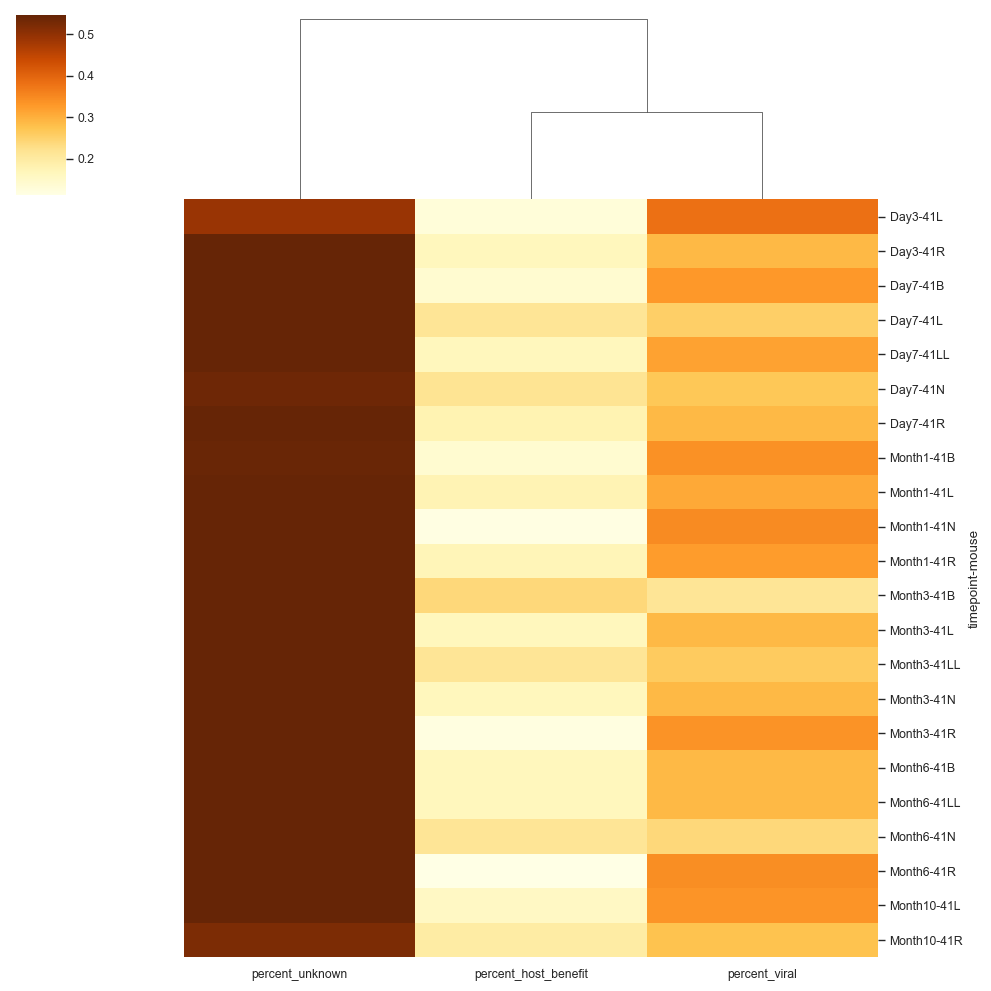

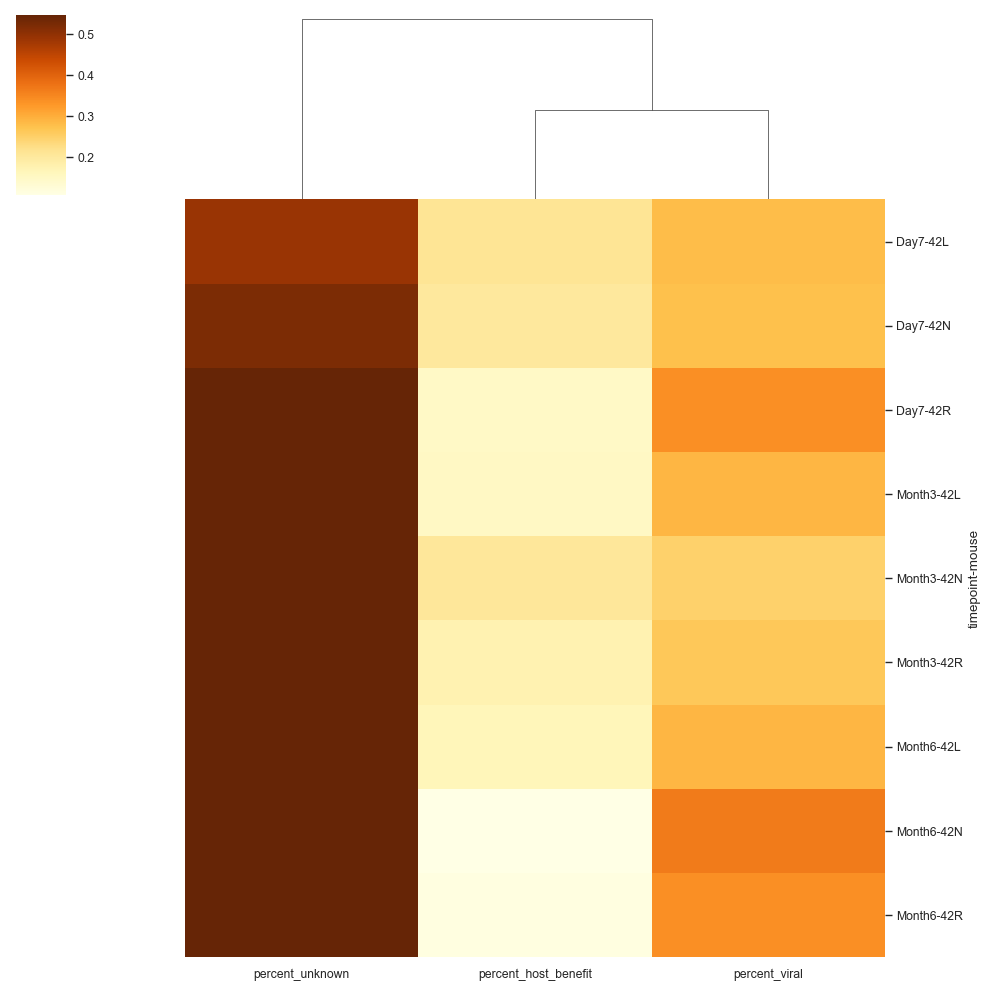

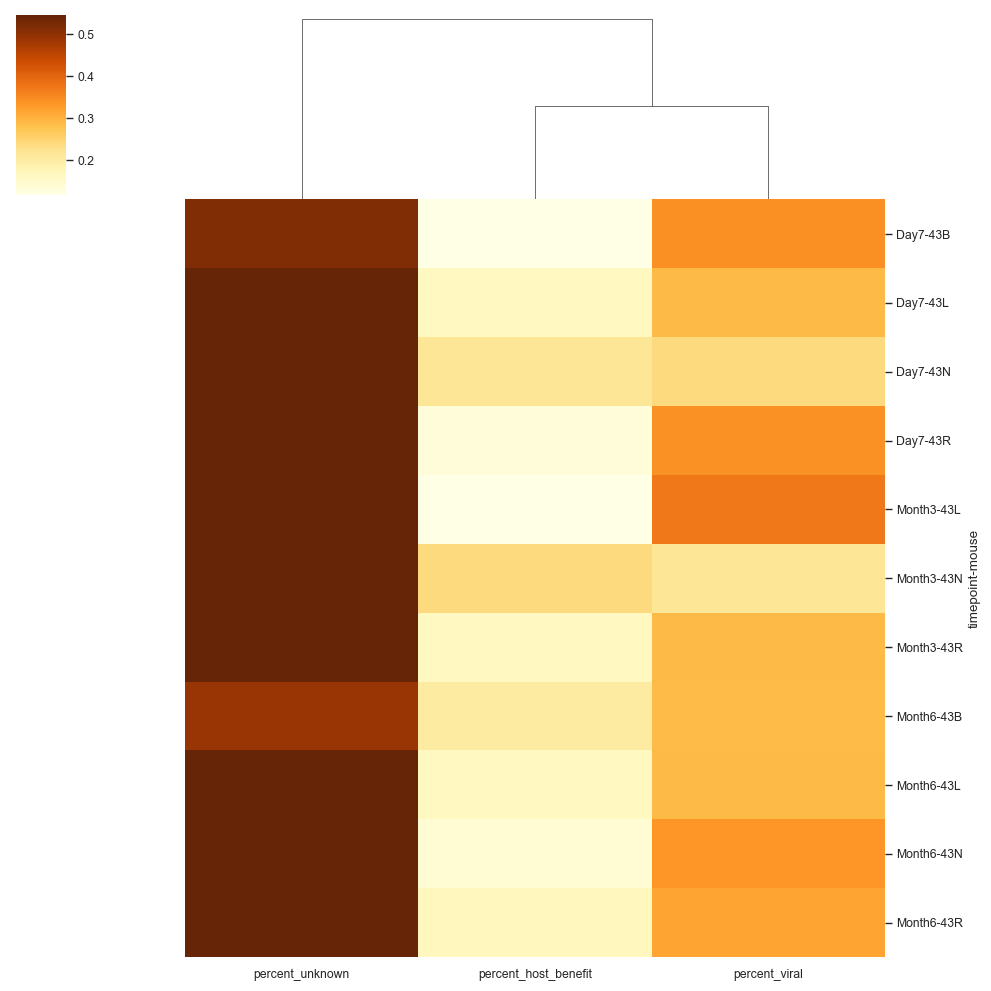

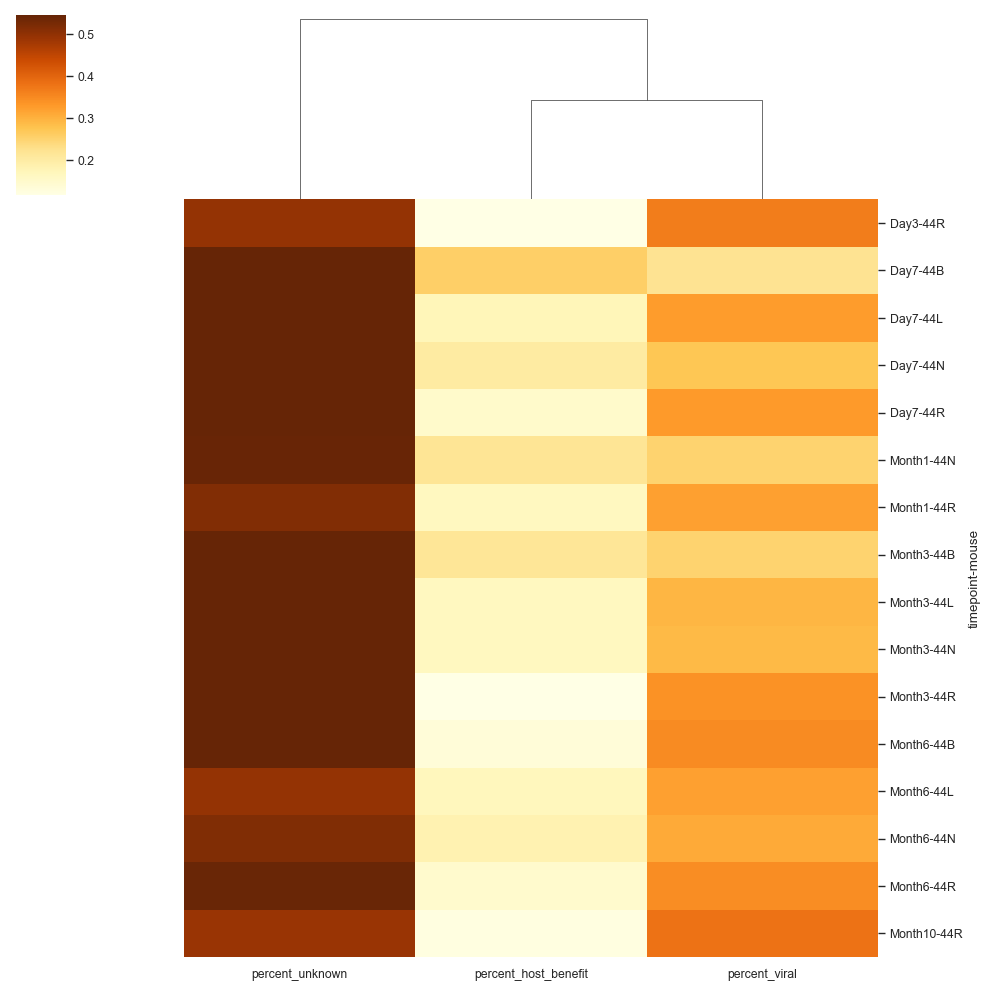

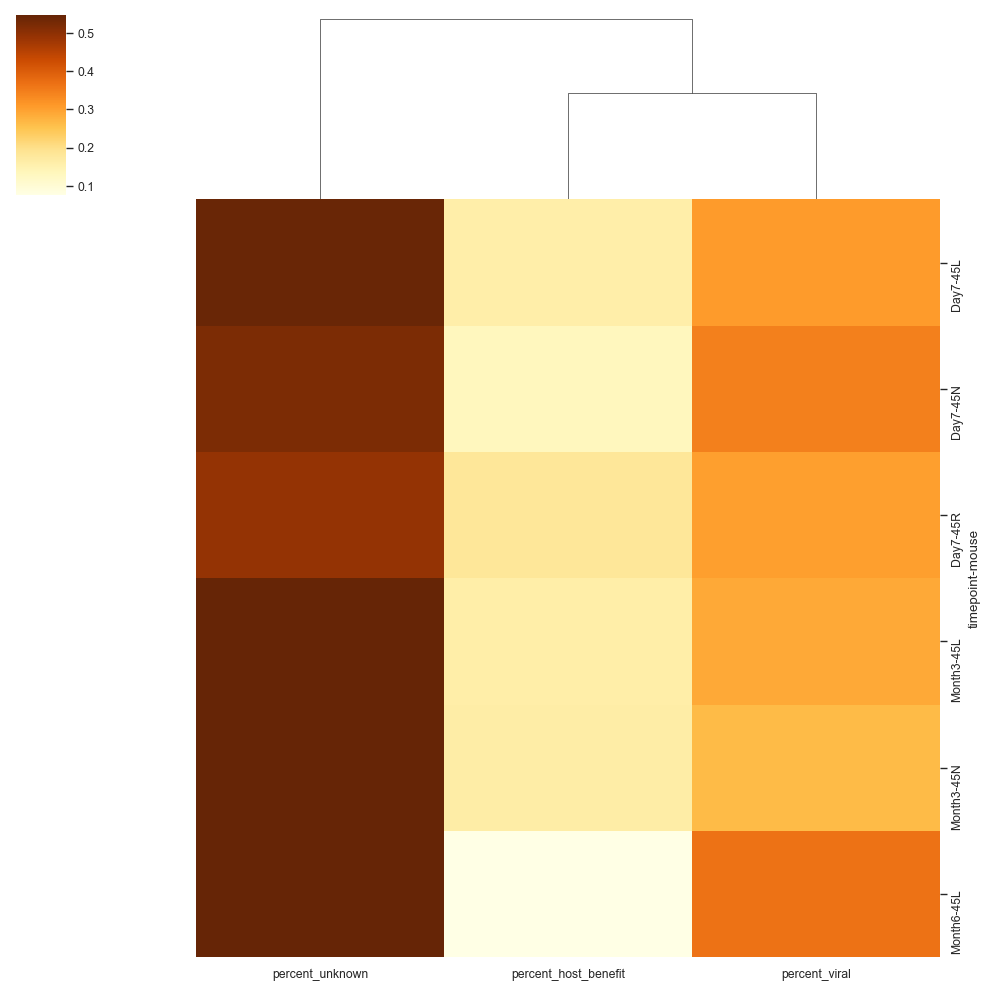

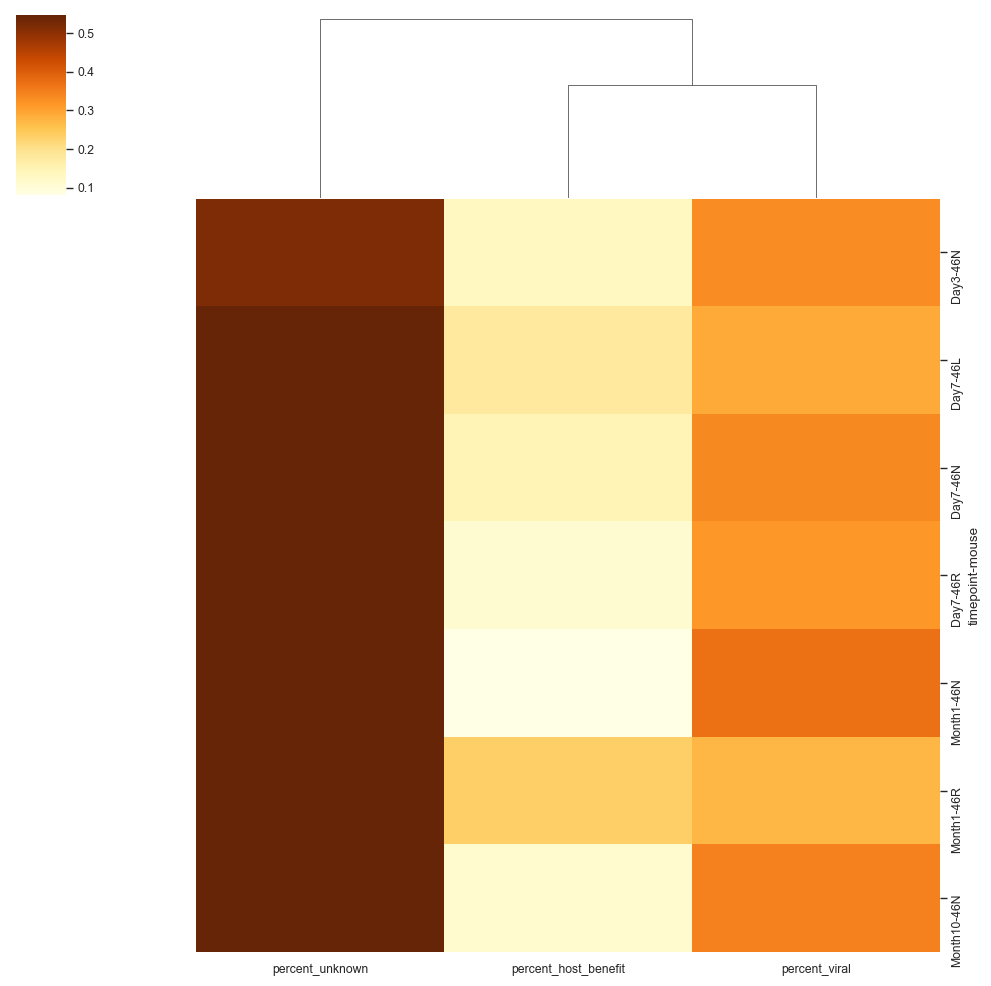

/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:717: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, max_dependent_coord * 1.05)


ValueError: zero-size array to reduction operation fmin which has no identity

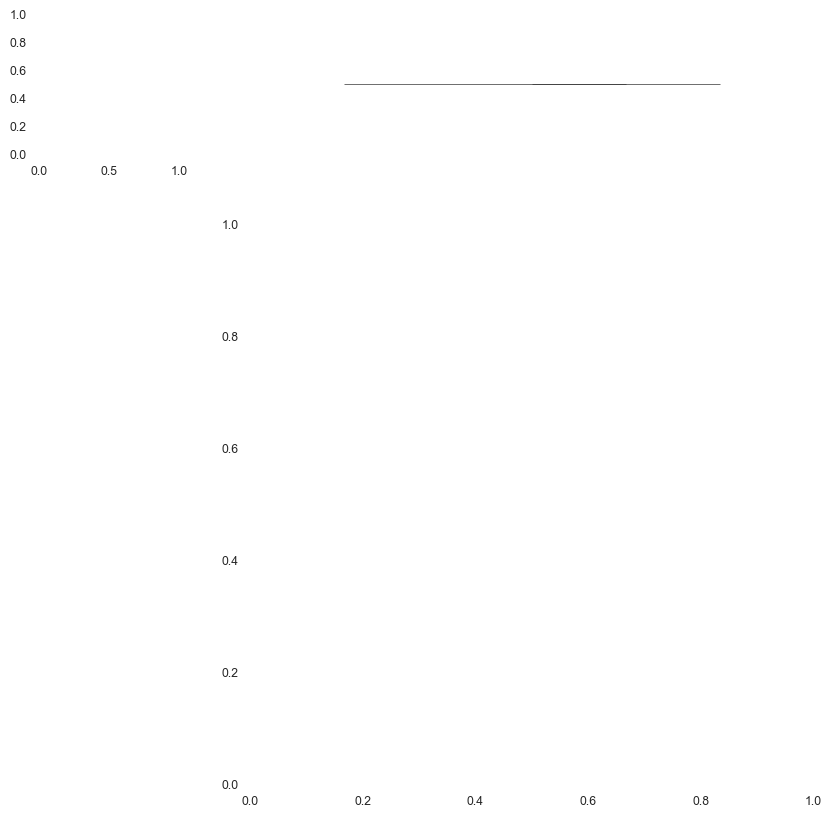

In [106]:
Native_types_sum['timepoint'] = pd.Categorical(Native_types_sum['timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])
for cg in Native_types_sum.cage_id.unique():
    cage_df = Native_types_sum[Native_types_sum['cage_id'] == cg].copy()
    cage_df2= cage_df[['percent_host_benefit', 'percent_viral', 'percent_unknown', 
                                  'timepoint', 'mouse']].copy()
    sns.clustermap(data=cage_df2.groupby(by=['timepoint', 'mouse']).median().dropna(axis=0), 
               row_cluster=False, 
              cmap='YlOrBr')
    plt.savefig('figures/AZ51_cage%s_median_clustermap.png' % cg)
    plt.show()

## Gene Annotations

In [107]:
Native_ref = pd.read_csv('./AZ51ref_annotations.tsv', sep='\t')
Native_ref.rename(columns={'Unnamed: 0': 'index_num', 'Unnamed: 0.1': 'segment'}, inplace=True)
Native_ref_highr = Native_ref[Native_ref['rank'].isin(['A', 'B', 'C'])].copy()
Native_ref_highr.head()

index_num                           fasta  \
3    1__0_partial_1-cat_1_4  final-viral-combined-for-dramv   
19  1__0_partial_1-cat_1_20  final-viral-combined-for-dramv   
22  1__0_partial_1-cat_1_23  final-viral-combined-for-dramv   
23  1__0_partial_1-cat_1_24  final-viral-combined-for-dramv   
25  1__0_partial_1-cat_1_26  final-viral-combined-for-dramv   

                scaffold  gene_position  start_position  end_position  \
3   1__0_partial_1-cat_1              4            2798          3397   
19  1__0_partial_1-cat_1             20           16645         17976   
22  1__0_partial_1-cat_1             23           19758         21683   
23  1__0_partial_1-cat_1             24           21658         22203   
25  1__0_partial_1-cat_1             26           23156         23482   

    strandedness rank   ko_id  \
3             -1    C  K07804   
19            -1    C  K21511   
22            -1    C  K21512   
23            -1    C  K22014   
25            -1    C  K03832   

                                             kegg_hit  ... cazy_id cazy_hits  \
3             putatice virulence related protein PagC  ...     NaN       NaN   
19             capsid assembly protease [EC:3.4.21.-]  ...     NaN       NaN   
22             terminase, large subunit [EC:3.1.21.4]  ...     NaN       NaN   
23  terminase small subunit / prophage DNA-packing...  ...     NaN       NaN   
25                           periplasmic protein TonB  ...     NaN       NaN   

    vogdb_id                                         vogdb_hits  \
3   VOG21032  sp|Q56957|AIL_YERPS Attachment invasion locus ...   
19  VOG08043  sp|P03711|SCAF_LAMBD Capsid assembly protease ...   
22  VOG14491           sp|Q05219|VG13_BPML5 Gene 13 protein; Xu   
23  VOG00236  sp|P03707|TERS_LAMBD Terminase small subunit; ...   
25  VOG19771              sp|P45610|TONB_KLEPN Protein TonB; Xh   

    vogdb_categories  heme_regulatory_motif_count virsorter_category  \
3                 Xh                            0                  2   
19             Xs;Xh                            0                  0   
22                Xu                            0                  0   
23             Xh;Xr                            0                  1   
25                Xh                            0                  2   

   auxiliary_score is_transposon amg_flags  
3                1         False         F  
19               1         False        VP  
22               1         False       NaN  
23               1         False         V  
25               1         False       NaN  

[5 rows x 34 columns]

In [108]:
Native_ref_highr['phage'] = Native_ref_highr["viral_hit"].str.split("[").str[1]
Native_ref_highr['phage'] = Native_ref_highr['phage'].str.rstrip(']')
Native_ref_highr['phage'].value_counts()

Salmonella virus Fels2           9
Escherichia phage 2H10           4
Escherichia virus Lambda_1H12    4
Vibrio phage PWH3a-P1            1
Name: phage, dtype: int64

In [109]:
Native_phage = pd.read_csv('./AZ51_dramv_annotations.csv', low_memory=False, index_col=36)
Native_phage.head()

sample                phage_id  \
simple_id                                                   
41B_Day7_11  41B_Day7_11_S81_L002  1__0_partial_1-cat_1_1   
41B_Day7_11  41B_Day7_11_S81_L002  1__0_partial_1-cat_1_2   
41B_Day7_11  41B_Day7_11_S81_L002  1__0_partial_1-cat_1_3   
41B_Day7_11  41B_Day7_11_S81_L002  1__0_partial_1-cat_1_4   
41B_Day7_11  41B_Day7_11_S81_L002  1__0_partial_1-cat_1_5   

                                      fasta              scaffold  \
simple_id                                                           
41B_Day7_11  final-viral-combined-for-dramv  1__0_partial_1-cat_1   
41B_Day7_11  final-viral-combined-for-dramv  1__0_partial_1-cat_1   
41B_Day7_11  final-viral-combined-for-dramv  1__0_partial_1-cat_1   
41B_Day7_11  final-viral-combined-for-dramv  1__0_partial_1-cat_1   
41B_Day7_11  final-viral-combined-for-dramv  1__0_partial_1-cat_1   

             gene_position  start_position  end_position  strandedness rank  \
simple_id                                                                     
41B_Day7_11              1              92           385            -1    E   
41B_Day7_11              2             398           676            -1    E   
41B_Day7_11              3             673          2733            -1    D   
41B_Day7_11              4            2798          3397            -1    C   
41B_Day7_11              5            3467          6880            -1    D   

              ko_id  ... cazy_hits  vogdb_id  \
simple_id            ...                       
41B_Day7_11     NaN  ...       NaN  VOG23864   
41B_Day7_11     NaN  ...       NaN  VOG01197   
41B_Day7_11     NaN  ...       NaN  VOG00369   
41B_Day7_11  K07804  ...       NaN  VOG21032   
41B_Day7_11     NaN  ...       NaN  VOG00128   

                                                    vogdb_hits  \
simple_id                                                        
41B_Day7_11                    REFSEQ hypothetical protein; Xu   
41B_Day7_11                    REFSEQ hypothetical protein; Xu   
41B_Day7_11                    REFSEQ hypothetical protein; Xu   
41B_Day7_11  sp|Q56957|AIL_YERPS Attachment invasion locus ...   
41B_Day7_11  sp|Q6QGE9|BPPB3_BPT5 Probable baseplate hub pr...   

            vogdb_categories  heme_regulatory_motif_count  virsorter_category  \
simple_id                                                                       
41B_Day7_11               Xu                            0                   2   
41B_Day7_11               Xu                            0                   2   
41B_Day7_11               Xu                            0                   0   
41B_Day7_11               Xh                            0                   2   
41B_Day7_11            Xs;Xh                            0                   0   

             auxiliary_score is_transposon amg_flags  \
simple_id                                              
41B_Day7_11                5         False         F   
41B_Day7_11                4         False         F   
41B_Day7_11                4         False         F   
41B_Day7_11                1         False         F   
41B_Day7_11                1         False        VF   

                                           identification  
simple_id                                                  
41B_Day7_11  ./DRAMv/41B_Day7_11_S81_L002/annotations.tsv  
41B_Day7_11  ./DRAMv/41B_Day7_11_S81_L002/annotations.tsv  
41B_Day7_11  ./DRAMv/41B_Day7_11_S81_L002/annotations.tsv  
41B_Day7_11  ./DRAMv/41B_Day7_11_S81_L002/annotations.tsv  
41B_Day7_11  ./DRAMv/41B_Day7_11_S81_L002/annotations.tsv  

[5 rows x 36 columns]

In [110]:
Native_phage.rename(columns={'Unnamed: 0': 'index_num', 'Unnamed: 0.1': 'segment'}, inplace=True)

In [111]:
Native_phage.shape

(180774, 36)

In [112]:
Native_phage_highr = Native_phage[Native_phage['rank'].isin(['A', 'B', 'C'])]
Native_phage_highr.shape

(30762, 36)

In [113]:
Native_phage2 = Native_phage_highr[["viral_id", "viral_hit"]].copy()
Native_phage2.head()

viral_id                                          viral_hit
simple_id                                                                     
41B_Day7_11  YP_009909729.1  YP_009909729.1 Lom outer membrane protein prec...
41B_Day7_11  YP_009909713.1  YP_009909713.1 Phage capsid and scaffold [Esch...
41B_Day7_11  YP_009909494.1  YP_009909494.1 Phage terminase, large subunit ...
41B_Day7_11  YP_009909709.1  YP_009909709.1 Terminase small subunit [Escher...
41B_Day7_11             NaN                                                NaN

In [114]:
Native_phage2.shape

(30762, 2)

In [115]:
Native_phage_nonans = Native_phage2.dropna().copy()

In [116]:
Native_phage_nonans.shape

(27456, 2)

In [117]:
Native_phage_nonans['viral_hit'].value_counts()

YP_009909709.1 Terminase small subunit [Escherichia phage 2H10]                                                                              1552
YP_009909561.1 Rz endopeptidase from lambdoid phage [Escherichia virus Lambda_1H12]                                                          1552
YP_009909713.1 Phage capsid and scaffold [Escherichia phage 2H10]                                                                            1552
YP_009909533.1 Phage exonuclease (EC; Putative phage-encoded enzyme involved in integration-recombination [Escherichia virus Lambda_1H12]    1552
YP_009909494.1 Phage terminase, large subunit [Escherichia virus Lambda_1H12]                                                                1551
YP_009909760.1 Phage lysin, 1,4-beta-N-acetylmuramidase (EC or lysozyme [Escherichia phage 2H10]                                             1551
YP_001718724.1 P2 gpFI-like protein [Salmonella virus Fels2]                                                                

In [118]:
Native_phage_nonans['gene'] = Native_phage_nonans["viral_hit"].str.split("[").str[0]
Native_phage_nonans['phage'] = Native_phage_nonans["viral_hit"].str.split("[").str[1]

In [119]:
Native_phage_nonans['phage'] = Native_phage_nonans['phage'].str.rstrip(']')

In [120]:
Native_phage_nonans['gene'] = Native_phage_nonans['gene'].str.split(" ", n=1).str[1]

In [121]:
Native_phage_nonans.head()

viral_id  \
simple_id                     
41B_Day7_11  YP_009909729.1   
41B_Day7_11  YP_009909713.1   
41B_Day7_11  YP_009909494.1   
41B_Day7_11  YP_009909709.1   
41B_Day7_11  YP_009909561.1   

                                                     viral_hit  \
simple_id                                                        
41B_Day7_11  YP_009909729.1 Lom outer membrane protein prec...   
41B_Day7_11  YP_009909713.1 Phage capsid and scaffold [Esch...   
41B_Day7_11  YP_009909494.1 Phage terminase, large subunit ...   
41B_Day7_11  YP_009909709.1 Terminase small subunit [Escher...   
41B_Day7_11  YP_009909561.1 Rz endopeptidase from lambdoid ...   

                                              gene  \
simple_id                                            
41B_Day7_11  Lom outer membrane protein precursor    
41B_Day7_11             Phage capsid and scaffold    
41B_Day7_11        Phage terminase, large subunit    
41B_Day7_11               Terminase small subunit    
41B_Day7_11  Rz endopeptidase from lambdoid phage    

                                     phage  
simple_id                                   
41B_Day7_11         Escherichia phage 2H10  
41B_Day7_11         Escherichia phage 2H10  
41B_Day7_11  Escherichia virus Lambda_1H12  
41B_Day7_11         Escherichia phage 2H10  
41B_Day7_11  Escherichia virus Lambda_1H12

In [122]:
Native_phage_nonans['taxonomy'] = Native_phage_nonans['phage'].str.split("phage|virus", n=1).str[0]
Native_phage_nonans['phage_id'] = Native_phage_nonans['phage'].str.split("phage|virus", n=1).str[1]

In [123]:
Native_phage_nonans['taxonomy'].replace('Phage Gifsy-1','Salmonella',inplace=True)
Native_phage_nonans['taxonomy'].replace('Phage Gifsy-2','Salmonella',inplace=True)

In [124]:
Native_phage_nonans['phage_id'] = np.where(Native_phage_nonans['phage_id'] == np.nan, Native_phage_nonans['phage'], Native_phage_nonans['phage_id'])
Native_phage_nonans['phage_id'] = np.where(Native_phage_nonans['phage_id'] == '', Native_phage_nonans['phage'], Native_phage_nonans['phage_id'])
Native_phage_nonans['phage_id'] = np.where(Native_phage_nonans['phage_id'] == None, Native_phage_nonans['phage'], Native_phage_nonans['phage_id'])

In [125]:
Native_phage_nonans.head(20)

viral_id  \
simple_id                     
41B_Day7_11  YP_009909729.1   
41B_Day7_11  YP_009909713.1   
41B_Day7_11  YP_009909494.1   
41B_Day7_11  YP_009909709.1   
41B_Day7_11  YP_009909561.1   
41B_Day7_11  YP_009909760.1   
41B_Day7_11  YP_009909553.1   
41B_Day7_11  YP_009909533.1   
41B_Day7_11  YP_001718718.1   
41B_Day7_11  YP_001718719.1   
41B_Day7_11  YP_001718723.1   
41B_Day7_11  YP_001718724.1   
41B_Day7_11  YP_001718732.1   
41B_Day7_11  YP_001718740.1   
41B_Day7_11  YP_001718751.1   
41B_Day7_11  YP_001718754.1   
41B_Day7_11  YP_001718755.1   
41B_Day7_11  YP_007675887.1   
41B_Day7_12  YP_009909729.1   
41B_Day7_12  YP_009909713.1   

                                                     viral_hit  \
simple_id                                                        
41B_Day7_11  YP_009909729.1 Lom outer membrane protein prec...   
41B_Day7_11  YP_009909713.1 Phage capsid and scaffold [Esch...   
41B_Day7_11  YP_009909494.1 Phage terminase, large subunit ...   
41B_Day7_11  YP_009909709.1 Terminase small subunit [Escher...   
41B_Day7_11  YP_009909561.1 Rz endopeptidase from lambdoid ...   
41B_Day7_11  YP_009909760.1 Phage lysin, 1,4-beta-N-acetylm...   
41B_Day7_11  YP_009909553.1 Holliday junction resolvase / C...   
41B_Day7_11  YP_009909533.1 Phage exonuclease (EC; Putative...   
41B_Day7_11  YP_001718718.1 P2 gpD-like tail protein [Salmo...   
41B_Day7_11  YP_001718719.1 P2 gpU-like tail protein [Salmo...   
41B_Day7_11  YP_001718723.1 P2 gpFII-like protein [Salmonel...   
41B_Day7_11  YP_001718724.1 P2 gpFI-like protein [Salmonell...   
41B_Day7_11  YP_001718732.1 P2 gpW-like baseplate protein [...   
41B_Day7_11  YP_001718740.1 endolysin [Salmonella virus Fels2]   
41B_Day7_11  YP_001718751.1 TumB protein [Salmonella virus ...   
41B_Day7_11  YP_001718754.1 DNA adenine methylase-like prot...   
41B_Day7_11  YP_001718755.1 P2 gpOrf82-like protein [Salmon...   
41B_Day7_11  YP_007675887.1 resolvase domain-containing pro...   
41B_Day7_12  YP_009909729.1 Lom outer membrane protein prec...   
41B_Day7_12  YP_009909713.1 Phage capsid and scaffold [Esch...   

                                                          gene  \
simple_id                                                        
41B_Day7_11              Lom outer membrane protein precursor    
41B_Day7_11                         Phage capsid and scaffold    
41B_Day7_11                    Phage terminase, large subunit    
41B_Day7_11                           Terminase small subunit    
41B_Day7_11              Rz endopeptidase from lambdoid phage    
41B_Day7_11  Phage lysin, 1,4-beta-N-acetylmuramidase (EC o...   
41B_Day7_11  Holliday junction resolvase / Crossover juncti...   
41B_Day7_11  Phage exonuclease (EC; Putative phage-encoded ...   
41B_Day7_11                          P2 gpD-like tail protein    
41B_Day7_11                          P2 gpU-like tail protein    
41B_Day7_11                             P2 gpFII-like protein    
41B_Day7_11                              P2 gpFI-like protein    
41B_Day7_11                     P2 gpW-like baseplate protein    
41B_Day7_11                                         endolysin    
41B_Day7_11                                      TumB protein    
41B_Day7_11                DNA adenine methylase-like protein    
41B_Day7_11                           P2 gpOrf82-like protein    
41B_Day7_11               resolvase domain-containing protein    
41B_Day7_12              Lom outer membrane protein precursor    
41B_Day7_12                         Phage capsid and scaffold    

                                     phage      taxonomy      phage_id  
simple_id                                                               
41B_Day7_11         Escherichia phage 2H10  Escherichia           2H10  
41B_Day7_11         Escherichia phage 2H10  Escherichia           2H10  
41B_Day7_11  Escherichia virus Lambda_1H12  Escherichia    Lambda_1H12  
41B_Day7_11         Escherichia phage 2H10  Escherichia          

In [202]:
AZ51_phage = pd.merge(Native_phage_nonans, metadata, left_index=True, right_index=True)
AZ51_phage.head()

viral_id                                          viral_hit  \
41B_Day7_1  YP_007675887.1  YP_007675887.1 resolvase domain-containing pro...   
41B_Day7_1  YP_009909729.1  YP_009909729.1 Lom outer membrane protein prec...   
41B_Day7_1  YP_009909713.1  YP_009909713.1 Phage capsid and scaffold [Esch...   
41B_Day7_1  YP_009909494.1  YP_009909494.1 Phage terminase, large subunit ...   
41B_Day7_1  YP_009909709.1  YP_009909709.1 Terminase small subunit [Escher...   

                                             gene  \
41B_Day7_1   resolvase domain-containing protein    
41B_Day7_1  Lom outer membrane protein precursor    
41B_Day7_1             Phage capsid and scaffold    
41B_Day7_1        Phage terminase, large subunit    
41B_Day7_1               Terminase small subunit    

                                    phage      taxonomy      phage_id  \
41B_Day7_1          Vibrio phage PWH3a-P1       Vibrio       PWH3a-P1   
41B_Day7_1         Escherichia phage 2H10  Escherichia           2H10   
41B_Day7_1         Escherichia phage 2H10  Escherichia           2H10   
41B_Day7_1  Escherichia virus Lambda_1H12  Escherichia    Lambda_1H12   
41B_Day7_1         Escherichia phage 2H10  Escherichia           2H10   

                 sample_name  box_id  cage_id collection_timepoint  ...  \
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   

           zarrinparlab_quant_ng_ul mouse dam  sire date_collected  \
41B_Day7_1                      NaN   41B  A1     A        9/20/17   
41B_Day7_1                      NaN   41B  A1     A        9/20/17   
41B_Day7_1                      NaN   41B  A1     A        9/20/17   
41B_Day7_1                      NaN   41B  A1     A        9/20/17   
41B_Day7_1                      NaN   41B  A1     A        9/20/17   

           bacteria_strain extraction_method extraction_kit run plate  
41B_Day7_1            AZ51     magnetic bead    Thermo CORE   2   5.0  
41B_Day7_1            AZ51     magnetic bead    Thermo CORE   2   5.0  
41B_Day7_1            AZ51     magnetic bead    Thermo CORE   2   5.0  
41B_Day7_1            AZ51     magnetic bead    Thermo CORE   2   5.0  
41B_Day7_1            AZ51     magnetic bead    Thermo CORE   2   5.0  

[5 rows x 61 columns]

In [203]:
AZ51_phage.shape

(27438, 61)

In [250]:
AZ51_phage_nuniq = AZ51_phage.groupby(['collection_timepoint', 'phage', 'mouse']).count()
AZ51_phage_nuniq2 = AZ51_phage_nuniq[['phage_id']].reset_index().copy()
AZ51_phage_nuniq2.rename(columns={'phage_id':'phage_gene_count'}, inplace=True)
AZ51_phage_nuniq2

collection_timepoint                          phage mouse  \
0                   Day3         Escherichia phage 2H10   41L   
1                   Day3         Escherichia phage 2H10   41R   
2                   Day3         Escherichia phage 2H10   44R   
3                   Day3         Escherichia phage 2H10   46N   
4                   Day3  Escherichia virus Lambda_1H12   41L   
..                   ...                            ...   ...   
333               Month6          Vibrio phage PWH3a-P1   44B   
334               Month6          Vibrio phage PWH3a-P1   44L   
335               Month6          Vibrio phage PWH3a-P1   44N   
336               Month6          Vibrio phage PWH3a-P1   44R   
337               Month6          Vibrio phage PWH3a-P1   45L   

     phage_gene_count  
0                  96  
1                  92  
2                  96  
3                  96  
4                  97  
..                ...  
333                13  
334                 8  
335                11  
336                13  
337                18  

[338 rows x 4 columns]

In [ ]:
AZ51_phage_nuniq3 = AZ51_phage_nuniq2.groupby(['collection_timepoint']).nunique()
AZ51_phage_nuniq4 = AZ51_phage_nuniq3[['phage']].copy()
AZ51_phage_nuniq4['tp_type'] = ['minor', 'major', 'minor', 'minor', 'major', 'major']
AZ51_phage_nuniq4['isolates'] = [192, 528, 192, 96, 528, 528]
AZ51_phage_nuniq4['uniq_phg_per_isolate'] = AZ51_phage_nuniq4['phage']/AZ51_phage_nuniq4['isolates']
AZ51_phage_nuniq4

In [ ]:
sns.barplot(data=AZ51_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='YlOrBr')
plt.ylim(0,8.5)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_uniq_phge_timepoint.svg', dpi=150, bbox_inches='tight')

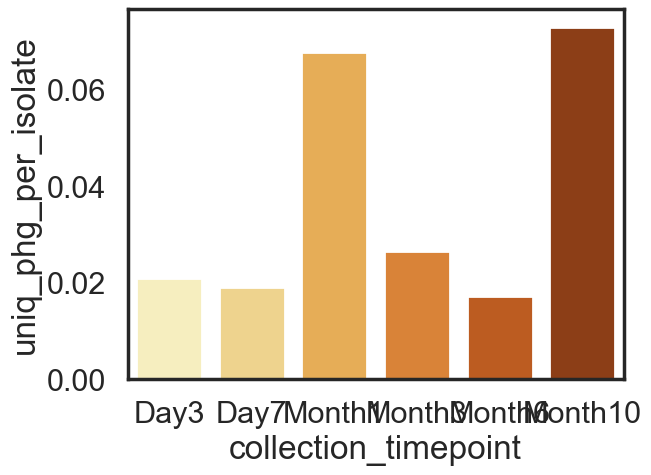

In [241]:
sns.barplot(data=AZ51_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='uniq_phg_per_isolate', palette='YlOrBr')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_uniq_phge_timepoint.svg', dpi=150, bbox_inches='tight')
#D3, M1, M10 have fewer mice - might be skewing results

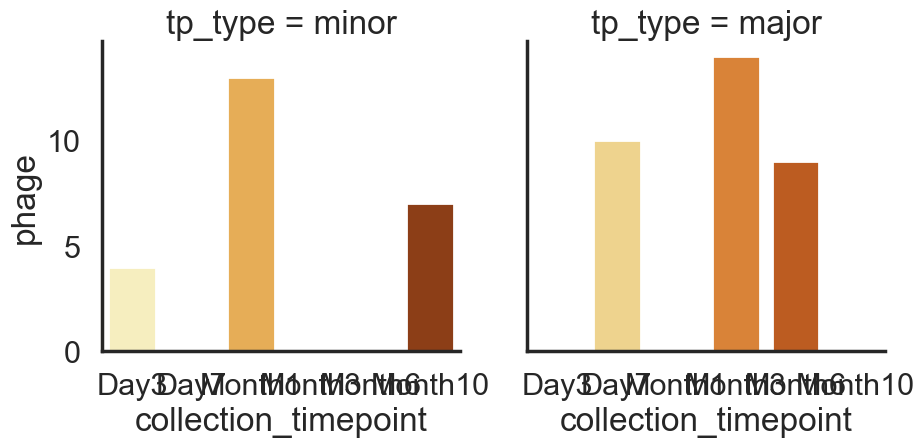

In [245]:
sns.catplot(data=AZ51_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='YlOrBr', kind='bar', col='tp_type')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_uniq_phge_timepoint.svg', dpi=150, bbox_inches='tight')

In [255]:
AZ51_phage_nuniq3 = AZ51_phage_nuniq2.groupby(['collection_timepoint', 'mouse']).nunique()
AZ51_phage_nuniq4 = AZ51_phage_nuniq3[['phage']].copy()
AZ51_phage_nuniq4[total_mice]
AZ51_phage_nuniq4

phage
collection_timepoint mouse       
Day3                 41L        4
                     41R        4
                     44R        4
                     46N        4
Day7                 41B        4
...                           ...
Month6               44B        4
                     44L        5
                     44N        5
                     44R        7
                     45L        6

[71 rows x 1 columns]

In [259]:
AZ51_phage_nuniq4.reset_index().mouse.unique()

array(['41L', '41R', '44R', '46N', '41B', '41LL', '41N', '42L', '42N',
       '42R', '43B', '43L', '43N', '43R', '44B', '44L', '44N', '45L',
       '45N', '45R', '46L', '46R'], dtype=object)

In [294]:
AZ51_phage_nuniq4.reset_index().phage.mean()

4.76056338028169

In [295]:
AZ51_phage_nuniq4.reset_index().phage.std()

1.5256360615671496

In [299]:
AZ51_phage_nuniq4.reset_index().to_csv('AZ51_uqphg_bytpm.csv', index=None)

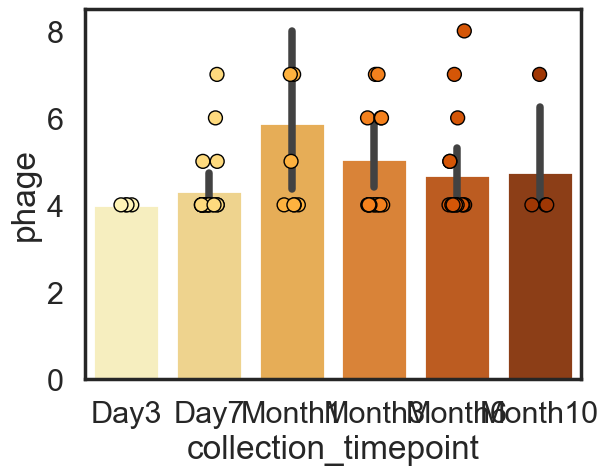

In [292]:
x = sns.barplot(data=AZ51_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='YlOrBr')
x= sns.stripplot(data=AZ51_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='YlOrBr', s=10, edgecolor='k', linewidth=1)
plt.ylim(0,8.5)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_uniq_phge_bygene_timepoint_bymouse.svg', dpi=150, bbox_inches='tight')

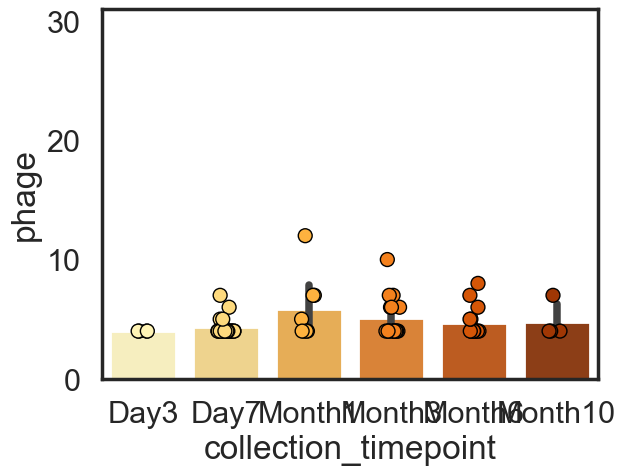

In [293]:
x = sns.barplot(data=AZ51_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='YlOrBr')
x= sns.stripplot(data=AZ51_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='YlOrBr', s=10, edgecolor='k', linewidth=1)
plt.ylim(0,31)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_uniq_phge_bygene_timepoint_bymouse.svg', dpi=150, bbox_inches='tight')

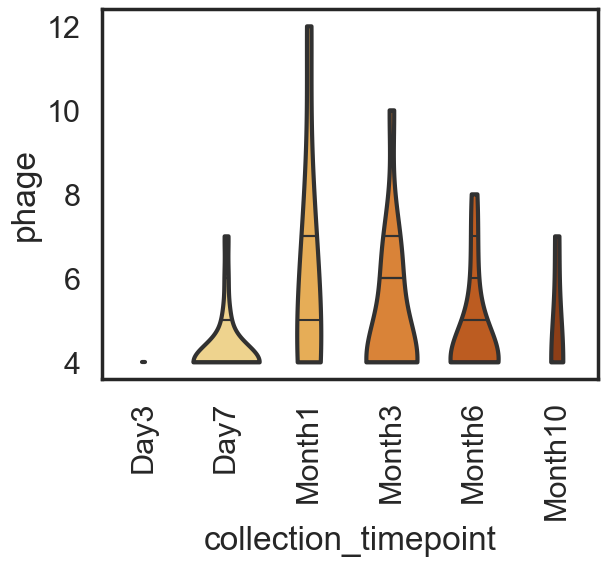

In [291]:
sns.violinplot(data=AZ51_phage_nuniq4.reset_index(), x='collection_timepoint', 
            order=['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'], 
            y='phage', palette='YlOrBr', inner="stick", scale="count", cut=0)
plt.xticks(rotation=90)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_uniq_phge_bygene_timepoint_bymouse.svg', dpi=150, bbox_inches='tight')

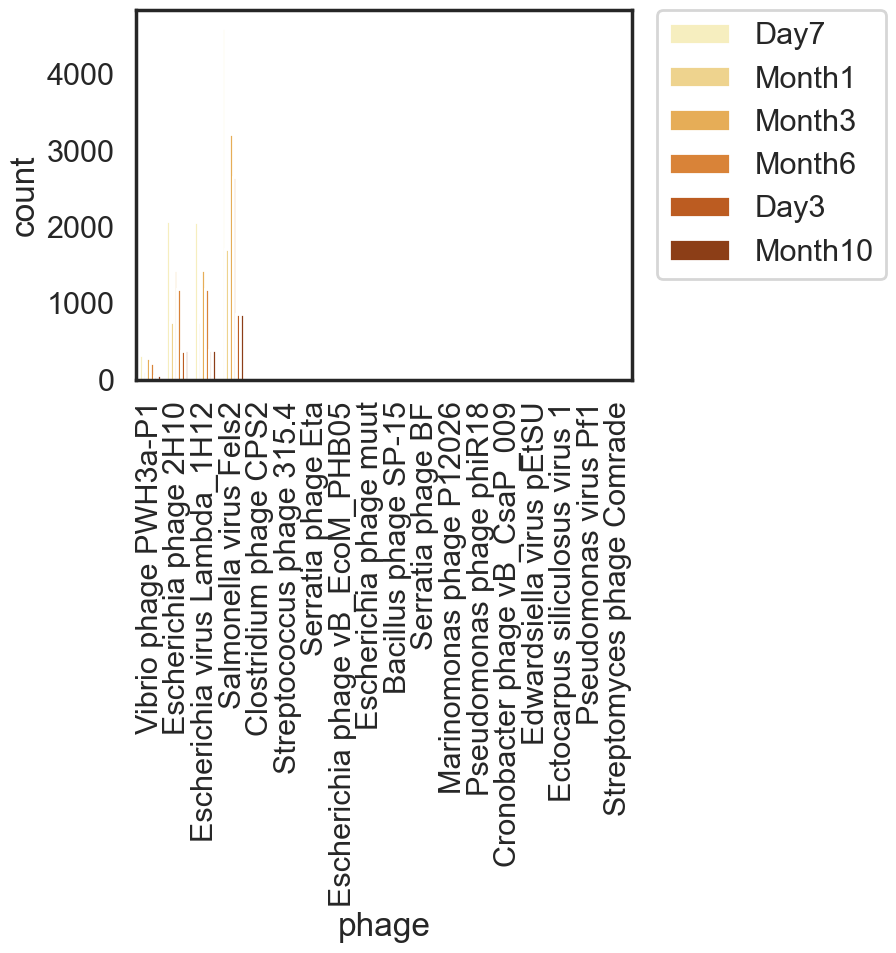

In [246]:
sns.set_style(style="white")

sns.countplot(data=AZ51_phage,
              x='phage', hue='collection_timepoint', 
              palette='YlOrBr')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_avg_all_phagegene_density.svg', dpi=150, bbox_inches='tight')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


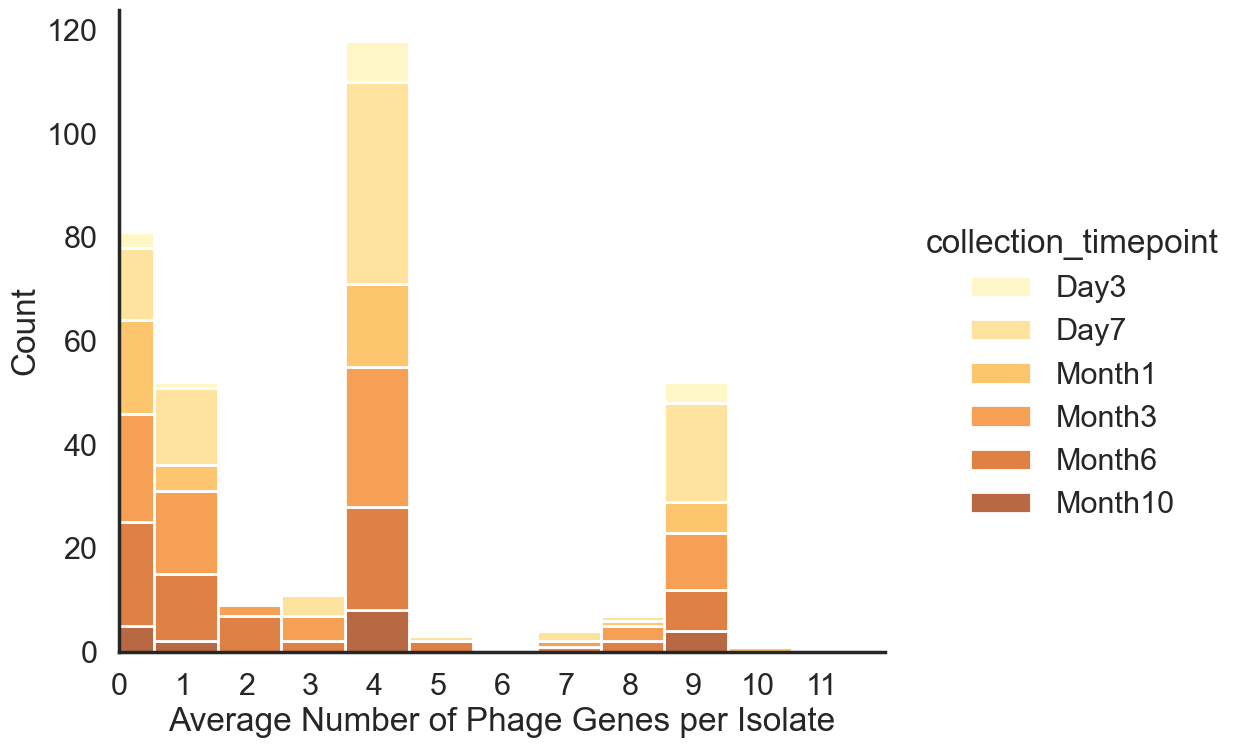

In [190]:
sns.set_style(style="white")

sns.displot(data=AZ51_norm.sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='YlOrBr', discrete=True,
            multiple="stack", height=8, aspect=1.2)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xticks(np.arange(0, 12, 1))
plt.xlim(0,12)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_avg_all_phagegene_count.svg', dpi=150, bbox_inches='tight')

In [128]:
class dict_partial(dict):
    def __getitem__(self, value):
        for k in self.keys():
            if k in value:
                return self.get(k)
        else:
            return self.get(None)

In [129]:
taxa_map = dict_partial({'Enterobact':'Enterobacteriaceae', 'Escherichia':'Escherichia',
                            'Lactobacillus': 'Lactobacillus', 'Stx2': 'Escherichia', 
                        'Canid alphaherpesvirus 1':'Canid alphaherpesvirus 1', 
                       'Megavirus chiliensis':'Megavirus chiliensis',
                        'Phage Gifsy-1':'Salmonella', 'Phage Gifsy-2':'Salmonella', 'Salmonella ':'Salmonella'})
AZ51_phage['group'] = AZ51_phage['phage'].apply(lambda x: taxa_map[x])

In [130]:
AZ51_phage['group'] = [x.replace('None', y) for x, y in zip(AZ51_phage.group.astype(str), AZ51_phage.taxonomy)]

In [131]:
AZ51_phage.head()

viral_id                                          viral_hit  \
41B_Day7_1  YP_007675887.1  YP_007675887.1 resolvase domain-containing pro...   
41B_Day7_1  YP_009909729.1  YP_009909729.1 Lom outer membrane protein prec...   
41B_Day7_1  YP_009909713.1  YP_009909713.1 Phage capsid and scaffold [Esch...   
41B_Day7_1  YP_009909494.1  YP_009909494.1 Phage terminase, large subunit ...   
41B_Day7_1  YP_009909709.1  YP_009909709.1 Terminase small subunit [Escher...   

                                             gene  \
41B_Day7_1   resolvase domain-containing protein    
41B_Day7_1  Lom outer membrane protein precursor    
41B_Day7_1             Phage capsid and scaffold    
41B_Day7_1        Phage terminase, large subunit    
41B_Day7_1               Terminase small subunit    

                                    phage      taxonomy      phage_id  \
41B_Day7_1          Vibrio phage PWH3a-P1       Vibrio       PWH3a-P1   
41B_Day7_1         Escherichia phage 2H10  Escherichia           2H10   
41B_Day7_1         Escherichia phage 2H10  Escherichia           2H10   
41B_Day7_1  Escherichia virus Lambda_1H12  Escherichia    Lambda_1H12   
41B_Day7_1         Escherichia phage 2H10  Escherichia           2H10   

                 sample_name  box_id  cage_id collection_timepoint  ... mouse  \
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   41B   
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   41B   
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   41B   
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   41B   
41B_Day7_1  12986.41B.Day7.1     NaN       41                 Day7  ...   41B   

           dam sire  date_collected bacteria_strain extraction_method  \
41B_Day7_1  A1    A         9/20/17            AZ51     magnetic bead   
41B_Day7_1  A1    A         9/20/17            AZ51     magnetic bead   
41B_Day7_1  A1    A         9/20/17            AZ51     magnetic bead   
41B_Day7_1  A1    A         9/20/17            AZ51     magnetic bead   
41B_Day7_1  A1    A         9/20/17            AZ51     magnetic bead   

           extraction_kit run plate        group  
41B_Day7_1    Thermo CORE   2   5.0      Vibrio   
41B_Day7_1    Thermo CORE   2   5.0  Escherichia  
41B_Day7_1    Thermo CORE   2   5.0  Escherichia  
41B_Day7_1    Thermo CORE   2   5.0  Escherichia  
41B_Day7_1    Thermo CORE   2   5.0  Escherichia  

[5 rows x 62 columns]

In [132]:
print(AZ51_phage.group.value_counts())

Salmonella                 13912
Escherichia                12442
Vibrio                      1026
Pseudomonas                   20
Serratia                      10
Bacillus                       7
Clostridium                    6
Streptococcus                  5
Marinomonas                    5
Ectocarpus siliculosus         2
Cronobacter                    1
Edwardsiella                   1
Streptomyces                   1
Name: group, dtype: int64


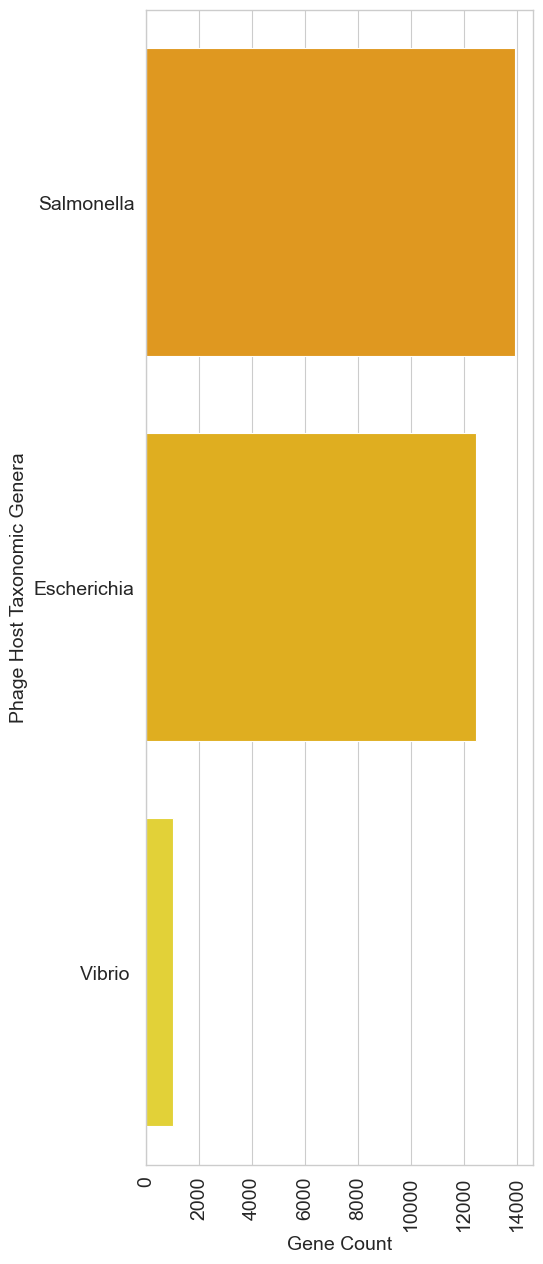

In [133]:
plt.figure(figsize=(5,15))
AZ51_phage_df = AZ51_phage[AZ51_phage.groupby("group")["group"].transform('size') > 100]
sns.set_style(style="whitegrid")
sns.countplot(data=AZ51_phage_df, 
              y='group', palette='Wistia_r', order = AZ51_phage_df['group'].value_counts().index)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel("Phage Host Taxonomic Genera", fontsize=14)
plt.xlabel("Gene Count", fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_top_host_genus.svg', dpi=150, bbox_inches='tight')

In [134]:
taxaz_map = dict_partial({'Enterobacteriaceae':'Enterobacteriaceae', 'Escherichia':'Enterobacteriaceae',
            'Klebsiella': 'Enterobacteriaceae', 'Shigella':'Enterobacteriaceae', 'Salmonella': 'Enterobacteriaceae', 
            'Cronobacter':'Enterobacteriaceae', 'Stenotrophomonas':'Xanthomonadaceae', 
                          'Rhodobacter':'Rhodobacteraceae', 'Roseobacter':'Rhodobacteraceae', 
                         'Burkholderia':'Burkholderiaceae', 'Paracoccus': 'Rhodobacteraceae', 
                         'Geobacillus':'Bacilliaceae', 'Rhizobium':'Rhizobiaceae', 
                          'Caulobacter':'Caulobacteraceae',
                          'Sinorhizobium':'Rhizobiaceae', 'Vibrio':'Vibrionaceae', 'Xanthomonas':'Xanthomonadaceae',
                          'Pseudomonas':'Pseudomonadaceae', 'Azospirillum':'Azospirillaceae', 
                          'Sulfitobacter':'Rhodobacteraceae', 'Yersinia':'Yersiniaceae', 
                          'Bacillus':'Bacilliaceae', 'Loktanella':'Rhodobacteraceae','Acinetobacter':'Moraxellaceae',
                         'Achromobacter':'Alcaligenaceae', 'Aurantimonas':'Aurantimonadaceae', 
                         'Ralstonia':'Burkholderiaceae', 'Rhodovulum':'Rhodobacteraceae', 'Shewanella':'Shewanellaceae',
                         'Idiomarinaceae':'Idiomarinaceae', 'Myxococcus':'Myxococcaceae', 'Halocynthia':'Urochordate/tunicate', 
                         'Enterococcus':'Enterococcaceae', 'Streptococcus':'Streptococcaceae', 
                          'Staphylococcus':'Staphylococcaceae', 'Megavirus chiliensis':'Amoebas', 
                         'Cafeteria roenbergensis':'marine flagellate', 'Psychrobacter':'Moraxellaceae', 
                         'Brucella':'Brucellaceae', 'Sphingomonas':'Sphingomonadaceae', 'Lactobacillus':'Lactobacillaceae', 
                         'Planktothrix':'Microcoleaceae', 'Erwinia':'Erwiniaceae', 'Campylobacter':'Campylobacteraceae', 
                         'Ectocarpus siliculosus':'filamentous brown alga', 'Thermus':'Thermaceae', 'Canid alphaherpesvirus 1':'Canines',
                         'Murmansk pox': 'root vole', 'Aeromonas ':'Aeromonadaceae', 'Flavobacterium ':'Flavobacteriaceae', 
                          'Pantoea ':'Erwiniaceae', 'Edwardsiella ':'Hafniaceae',
                           'uncultured Caudovirales ':'unknown', 'Ruegeria ':'Rhodobacteraceae', 'Streptomyces ':'Streptomycetaceae',
                           'Rhodococcus ':'Nocardiaceae', 'uncultured ': 'unknown', 'Feldmannia species ':'Acinetosporaceae',
                           'Rhodoferax ':'Comamonadaceae', 'Salinivibrio ':'Vibrionaceae', 'Cyano':'Cyanobacteriaceae', 'Mycobacterium ':'Mycobacteriaceae',
                           'Synechococcus ':'Synechococcaceae', 'Arthrobacter ':'Micrococcaceae', 'Gordonia ':'Theaceae', 'Bdellovibrio ':'Bdellovibrionaceae',
                           'Singapore grouper irido': 'unknown', 'Acidovorax ':'Comamonadaceae', 'Serratia ':'Enterobacteriaceae', 'Dickeya ':'Enterobacteriaceae',
                               'Citrobacter ':'Enterobacteriaceae', 'Pectobacterium ':'Enterobacteriaceae', 'Pelagibacter ':'Pelagibacteraceae',
                               'Microbacterium ':'Microbacteriaceae', 'Paramecium bursaria Chlorella ':'Chlorellaceae',
                               'Feldmannia irregularis ':'Acinetosporaceae', 'Pandora': 'giant virus', 'Agrobacterium ':'Rhizobiaceae',
                                   'Chrysochromulina ericina ':'Prymnesiaceae', 'Clostridium ':'Clostridiaceae',
                               'Only Syngen Nebraska ':'Chlorellaceae', 'Proteus ':'Enterobacteriaceae', 'Enterococus ':'Enterococcaceae', 'Pitho':'unknown',
                               'Acanthamoeba polyphaga mimi':'Acanthamoebidae', 'Aureococcus ano':'Pelagomonadaceae',
                               'Dinoroseobacter ':'Rhodobacteraceae', 'Tetraselmis viridis ':'Chlorodendraceae', 'Nocardia ':'Nocardiaceae', 'Pacman': 'unknown',
                                   'Alteromonas ':'Alteromonadaceae', 'Sphingobium ':'Sphingomonadaceae'})
AZ51_phage['taxa_family_group'] = AZ51_phage['group'].apply(lambda x: taxaz_map[x])

In [135]:
AZ51_phage['taxa_family_group'] = AZ51_phage['taxa_family_group'].apply(lambda s: 'Other' if s is None else str(s))

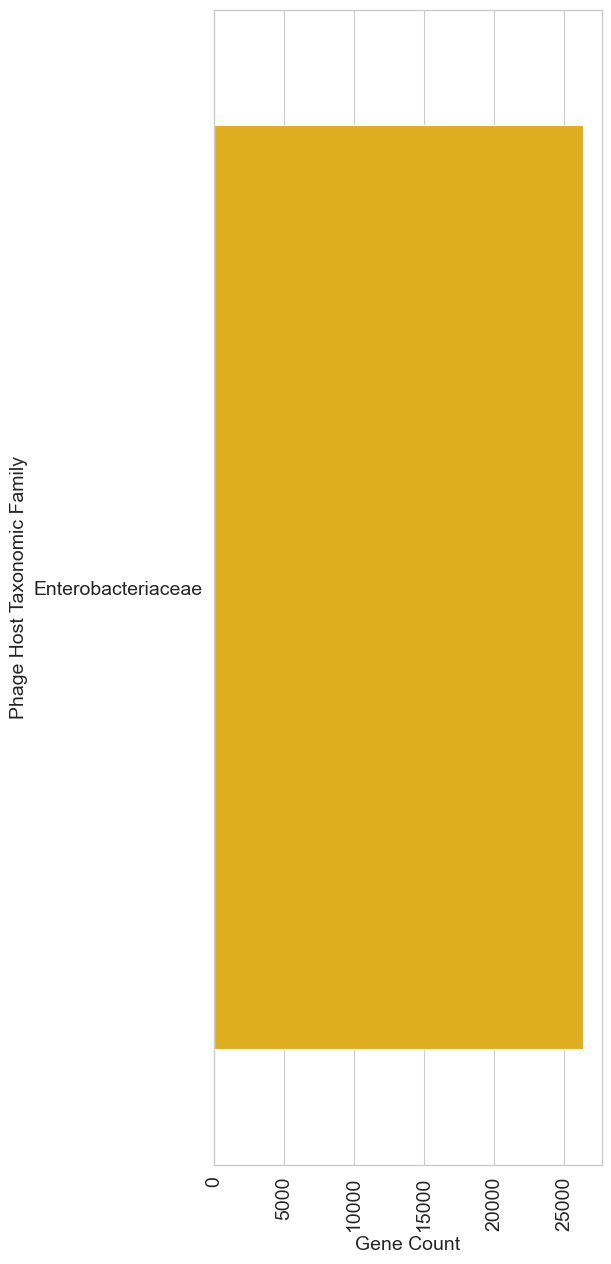

In [136]:
plt.figure(figsize=(5,15))
sns.set_style(style="whitegrid")
AZ51_phage_df2 = AZ51_phage[AZ51_phage.groupby("taxa_family_group")["taxa_family_group"].transform('size') > 1300]
sns.countplot(data=AZ51_phage_df2, order=AZ51_phage_df2['taxa_family_group'].value_counts().index,
              y='taxa_family_group', palette='Wistia_r', )
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.ylabel("Phage Host Taxonomic Family", fontsize=14)
plt.xlabel("Gene Count", fontsize=14)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_top_host_family.svg', dpi=150, bbox_inches='tight')

In [137]:
AZ51_phage['taxa_family_group'].value_counts()

Enterobacteriaceae        26365
Vibrionaceae               1026
Pseudomonadaceae             20
Bacilliaceae                  7
Clostridiaceae                6
Streptococcaceae              5
Other                         5
filamentous brown alga        2
Hafniaceae                    1
Streptomycetaceae             1
Name: taxa_family_group, dtype: int64

In [138]:
AZ51_phage['taxa_family_group'].unique()

array(['Vibrionaceae', 'Enterobacteriaceae', 'Clostridiaceae',
       'Streptococcaceae', 'Bacilliaceae', 'Other', 'Pseudomonadaceae',
       'Hafniaceae', 'filamentous brown alga', 'Streptomycetaceae'],
      dtype=object)

In [139]:
taxaf_map = dict_partial({'Enterobacteriaceae':'gram negative', 'Xanthomonadaceae':'gram negative', 
                          'Rhodobacteraceae':'gram negative', 'Burkholderiaceae':'gram negative', 
                          'Rhodobacteraceae':'gram negative', 'Rhizobiaceae':'gram negative',
                          'Bacilliaceae':'gram positive', 'Caulobacteraceae':'gram negative',
                          'Vibrionaceae':'gram negative', 'Pseudomonadaceae':'gram negative', 
                          'Azospirillaceae':'gram negative', 'Yersiniaceae':'gram negative',
                         'Moraxellaceae':'gram negative', 'Alcaligenaceae':'gram negative', 
                         'Aurantimonadaceae':'gram negative', 'Shewanellaceae':'gram negative',
                         'Idiomarinaceae':'gram negative', 'Myxococcaceae':'gram negative', 
                          'Urochordate/tunicate':'Other', 'Enterococcaceae':'gram positive',
                         'Streptococcaceae':'gram positive', 'Staphylococcaceae':'gram positive', 
                         'Amoebas':'Other', 'marine flagellate':"Other", 'Brucellaceae':'gram negative',
                         'Sphingomonadaceae':'gram negative', 'Lactobacillaceae':'gram positive', 
                         'Microcoleaceae':'Other', 'Erwiniaceae':'gram negative', 
                         'Campylobacteraceae':'gram negative', 'filamentous brown alga':'Other', 
                         'Thermaceae':'gram negative', 'Canines':"Other", 'root vole':"Other", 
                         'giant virus': 'Other', 'unknown':'Other', 'Aeromonadaceae':'gram negative',
                         'Flavobacteriaceae': 'gram negative', 'Hafniaceae':'gram negative', })

In [140]:
AZ51_phage['taxa_overview_group'] = AZ51_phage['taxa_family_group'].apply(lambda x: taxaf_map[x])

In [141]:
AZ51_phage[['group','phage_id', 'taxa_overview_group']].groupby('group')['phage_id'].count().nlargest(13)

group
Salmonella                 13912
Escherichia                12442
Vibrio                      1026
Pseudomonas                   20
Serratia                      10
Bacillus                       7
Clostridium                    6
Marinomonas                    5
Streptococcus                  5
Ectocarpus siliculosus         2
Cronobacter                    1
Edwardsiella                   1
Streptomyces                   1
Name: phage_id, dtype: int64

<AxesSubplot: xlabel='count', ylabel='taxa_overview_group'>

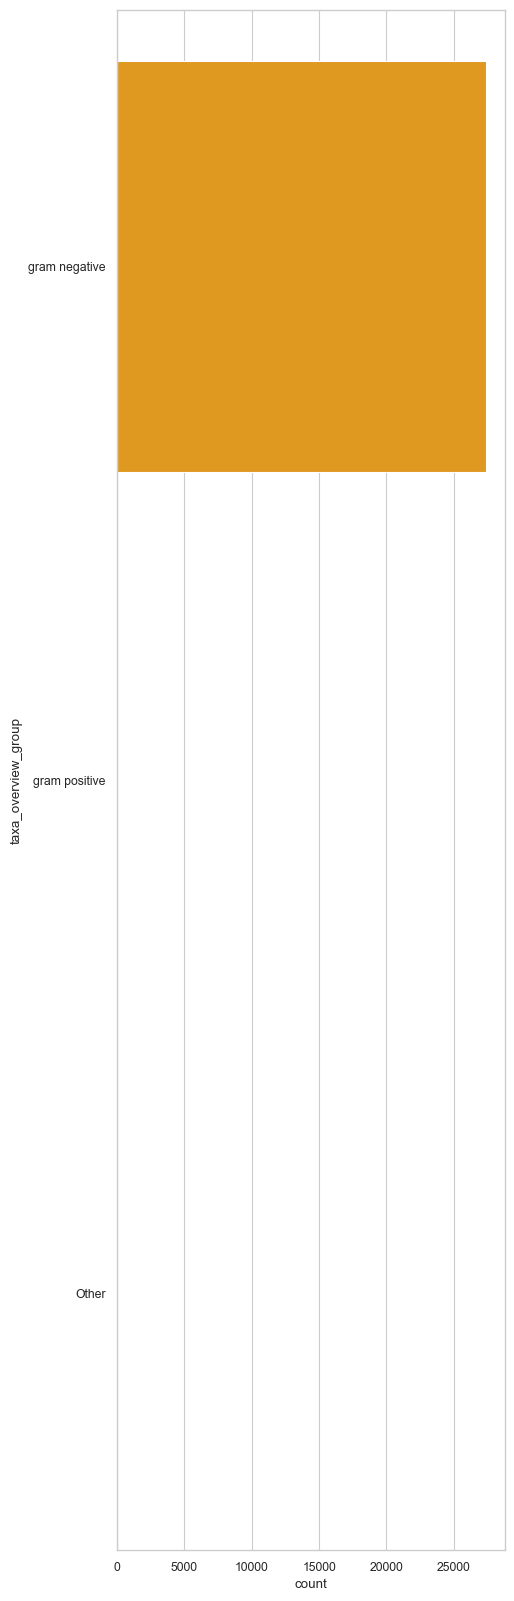

In [142]:
plt.figure(figsize=(5,20))
sns.set_style(style="whitegrid")
sns.countplot(data=AZ51_phage, y='taxa_overview_group', palette='Wistia_r')

In [143]:
#pd.set_option("display.max_rows", None)
AZ51_phage.phage_id.value_counts()

 Fels2            13912
 Lambda_1H12       6219
 2H10              6198
 PWH3a-P1          1026
 muut                19
 phiR18              17
 SP-15                7
 Eta                  7
 vB_EcoM_PHB05        6
 CPS2                 6
 315.4                5
 P12026               5
 BF                   3
 Pf1                  3
 1                    2
 vB_CsaP_009          1
 pEtSU                1
 Comrade              1
Name: phage_id, dtype: int64

In [144]:
AZ51_phage['phage_id'].replace('Phage Gifsy-1','Gifsy-1',inplace=True)
AZ51_phage['phage_id'].replace('Phage Gifsy-2','Gifsy-2',inplace=True)

In [145]:
AZ51_phage.to_csv('./AZ51_mod.csv')

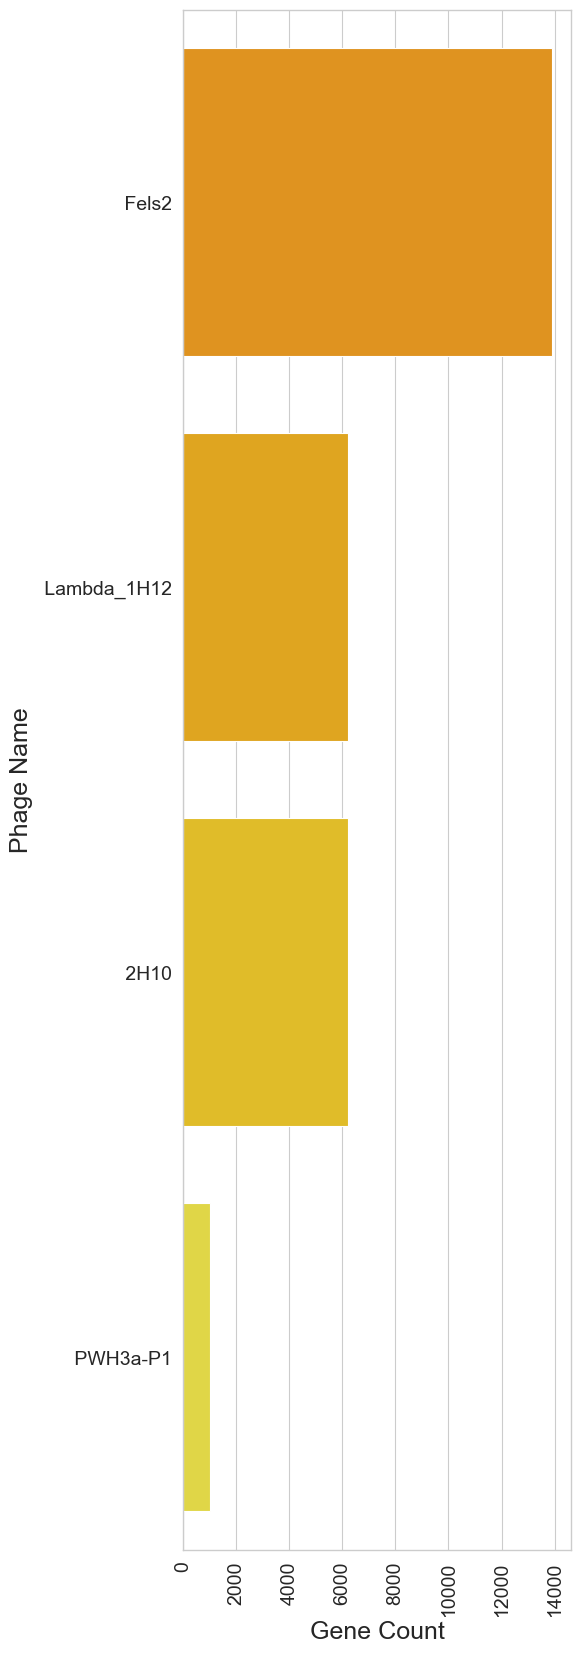

In [146]:
plt.figure(figsize=(5,20))
sns.set_style(style="whitegrid")
AZ51_phage_df3 = AZ51_phage[AZ51_phage.groupby('phage_id')['phage_id'].transform('size') > 500]
sns.countplot(data=AZ51_phage_df3, order=AZ51_phage_df3['phage_id'].value_counts().index,
              y='phage_id', palette='Wistia_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Phage Name', fontsize=18)
plt.xlabel('Gene Count', fontsize=18)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_top_phage_genes.svg', dpi=150, bbox_inches='tight')

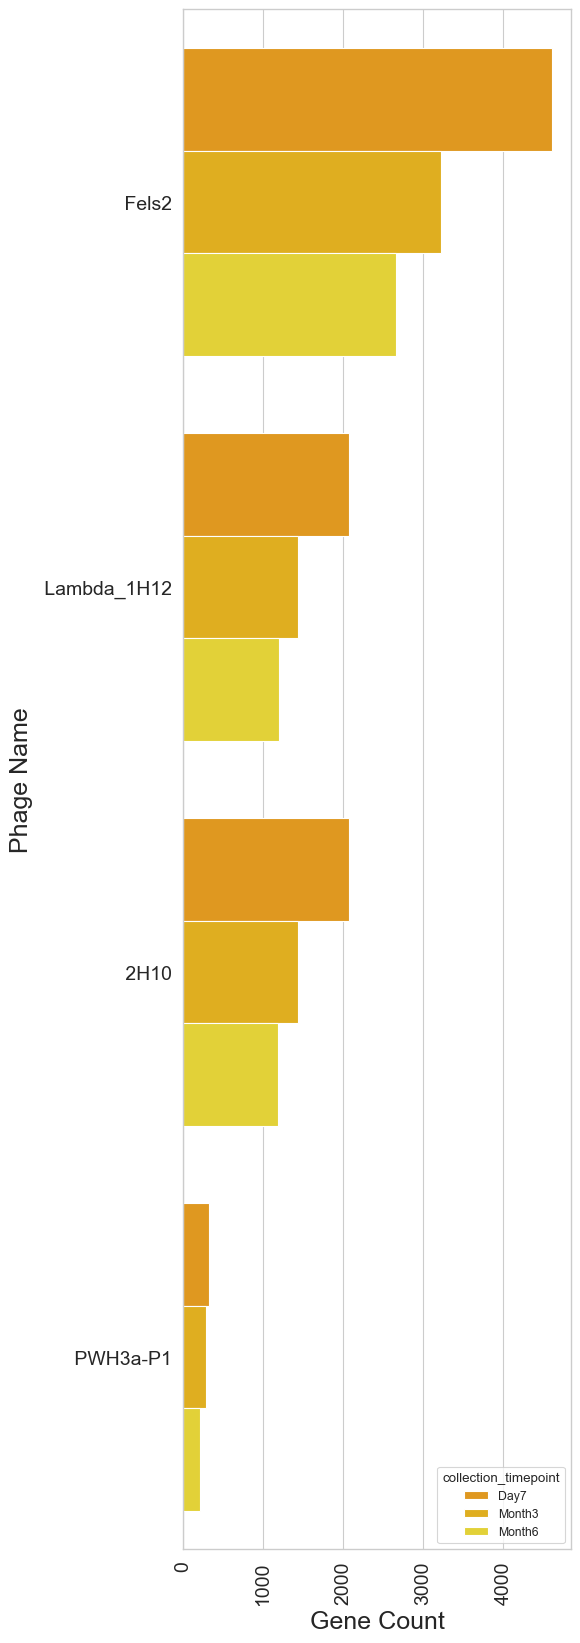

In [147]:
plt.figure(figsize=(5,20))
sns.set_style(style="whitegrid")
AZ51_phage_df4 = AZ51_phage_df3[AZ51_phage_df3['collection_timepoint'].isin(['Day7', 'Month3', 'Month6'])]

sns.countplot(data=AZ51_phage_df4, order=AZ51_phage_df3['phage_id'].value_counts().index,
              y='phage_id', hue='collection_timepoint', 
              hue_order=['Day7', 'Month3', 'Month6'],
              palette='Wistia_r')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Phage Name', fontsize=18)
plt.xlabel('Gene Count', fontsize=18)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_top_phage_gene_counts_time.svg', dpi=150, bbox_inches='tight')

# Normalize by Number of isolates

In [148]:
top_phage = AZ51_phage[AZ51_phage.phage_id.isin(AZ51_phage_df3['phage_id'].value_counts().index)].phage.unique()

In [149]:
AZ51_phagez = AZ51_phage[['collection_timepoint', 'mouse', 'phage', 'gene']].copy()
AZ51_phage_gene_count = AZ51_phagez.groupby(by=['collection_timepoint', 'mouse', 'phage']).count()
AZ51_norm = pd.merge(AZ51_phage_gene_count.reset_index(), assembly_list2, 
                            left_on=['collection_timepoint', 'mouse'], right_on=['collection_timepoint', 'mouse'])
AZ51_norm['average_number_phage_genes_per_isolate'] = AZ51_norm['gene']/AZ51_norm['isolate']
AZ51_norm

collection_timepoint mouse                          phage  gene  isolate  \
0                   Day3   41L         Escherichia phage 2H10    96       24   
1                   Day3   41L  Escherichia virus Lambda_1H12    97       24   
2                   Day3   41L         Salmonella virus Fels2   216       24   
3                   Day3   41L          Vibrio phage PWH3a-P1     9       24   
4                   Day3   41R         Escherichia phage 2H10    92       23   
..                   ...   ...                            ...   ...      ...   
333               Month6   45L  Escherichia virus Lambda_1H12    88       24   
334               Month6   45L       Marinomonas phage P12026     1       24   
335               Month6   45L       Pseudomonas phage phiR18     2       24   
336               Month6   45L         Salmonella virus Fels2   198       24   
337               Month6   45L          Vibrio phage PWH3a-P1    18       24   

     average_number_phage_genes_per_isolate  
0                                  4.000000  
1                                  4.041667  
2                                  9.000000  
3                                  0.375000  
4                                  4.000000  
..                                      ...  
333                                3.666667  
334                                0.041667  
335                                0.083333  
336                                8.250000  
337                                0.750000  

[338 rows x 6 columns]

In [150]:
AZ51_norm['collection_timepoint'] = pd.Categorical(AZ51_norm['collection_timepoint'], ['Day3', 'Day7', 'Month1', 'Month3', 'Month6', 'Month10'])

In [151]:
top_phage = ['Salmonella virus Fels2', 'Escherichia phage 2H10',
       'Escherichia virus Lambda_1H12', 'Vibrio phage PWH3a-P1']
bottom_phage = ['Escherichia phage muut', 'Pseudomonas phage phiR18',
       'Ectocarpus siliculosus virus 1', 'Bacillus phage SP-15',
       'Escherichia phage vB_EcoM_PHB05', 'Pseudomonas virus Pf1',
       'Clostridium phage CPS2', 'Serratia phage BF',
       'Serratia phage Eta', 'Cronobacter phage vB_CsaP_009',
       'Edwardsiella virus pEtSU', 'Marinomonas phage P12026',
       'Streptomyces phage Comrade', 'Aureococcus anophagefferens virus',
       'Aeromonas phage AS-sw', 'Burkholderia phage BcepMu',
       'Paramecium bursaria Chlorella virus 1',
       'Streptococcus phage 315.4']
ref_phage = Native_ref_highr['phage'].value_counts().index

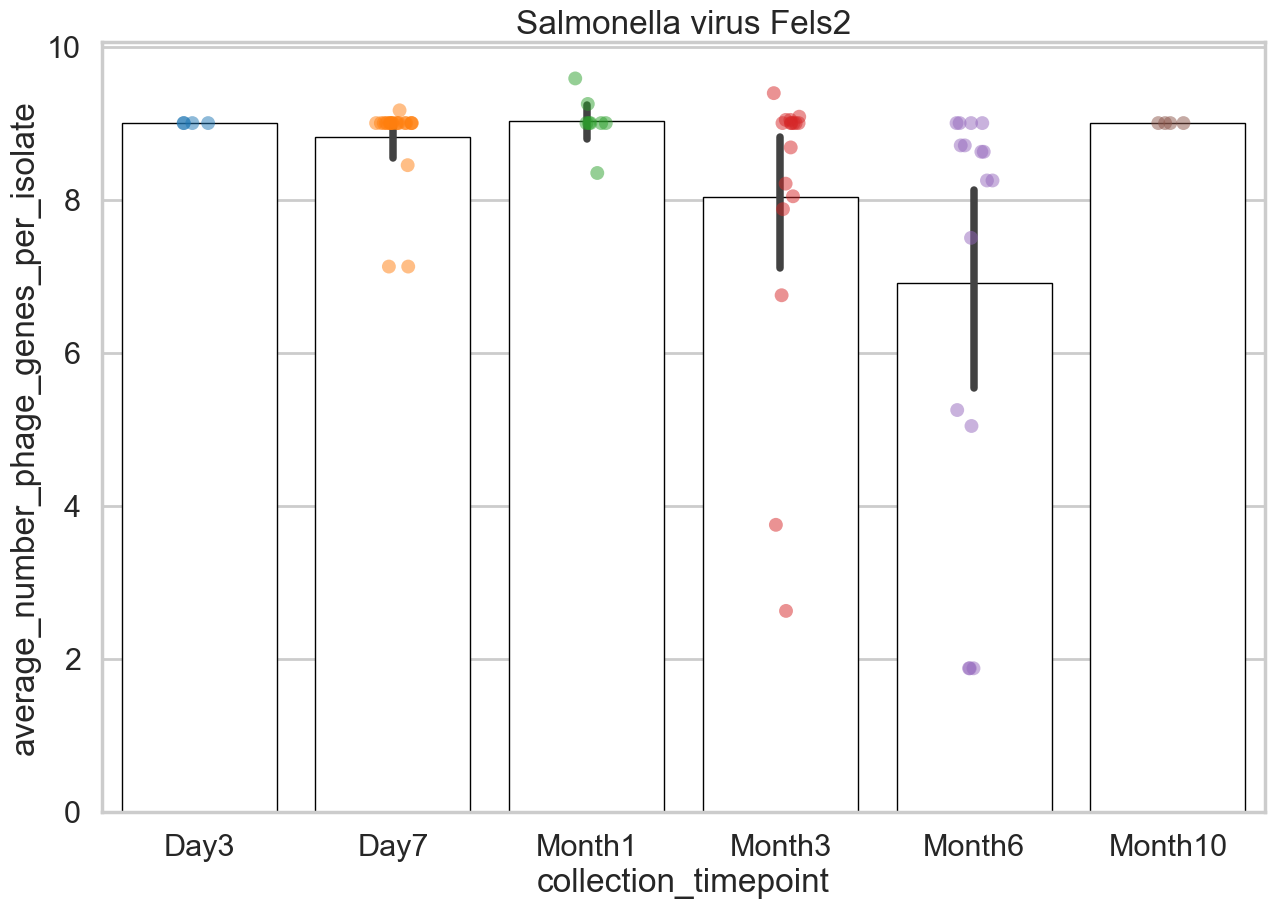

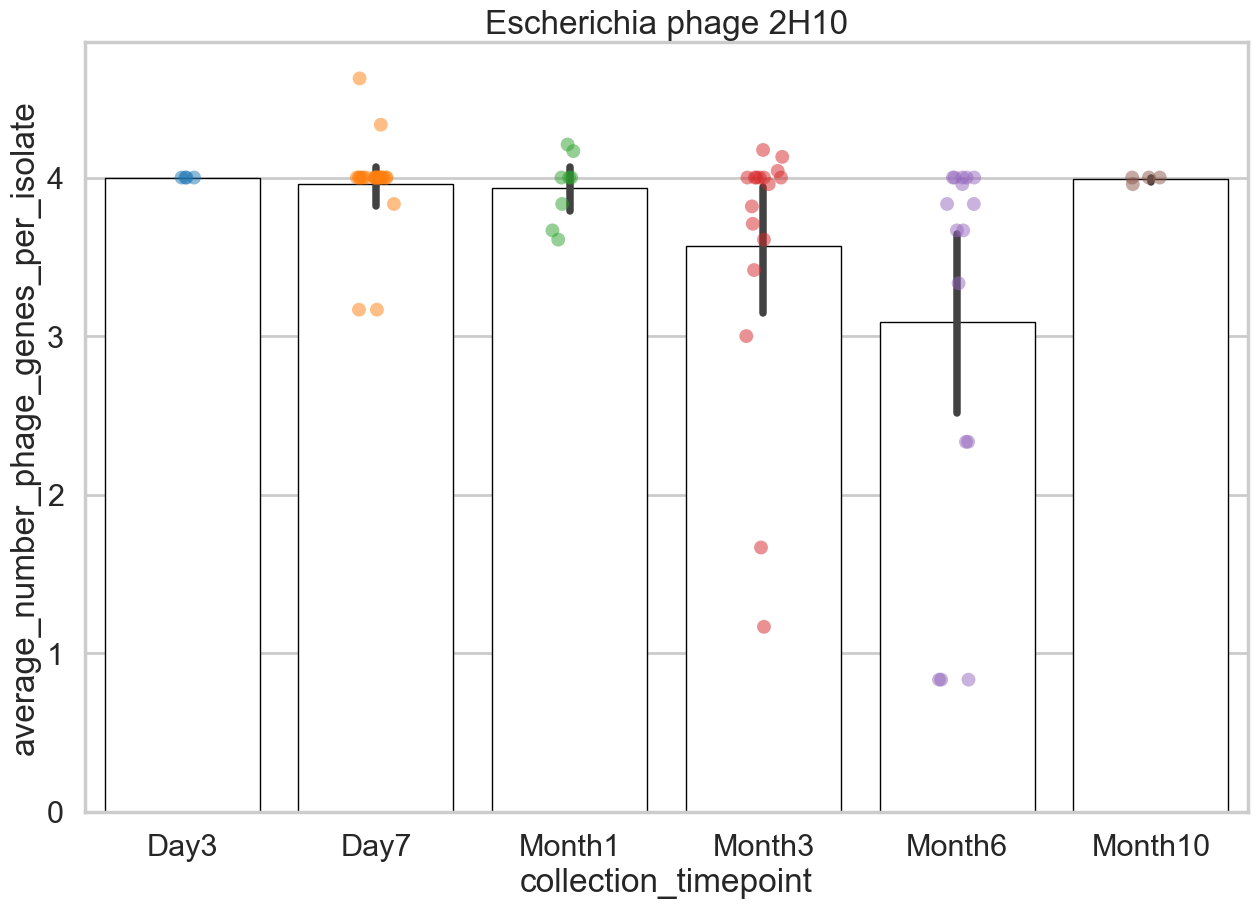

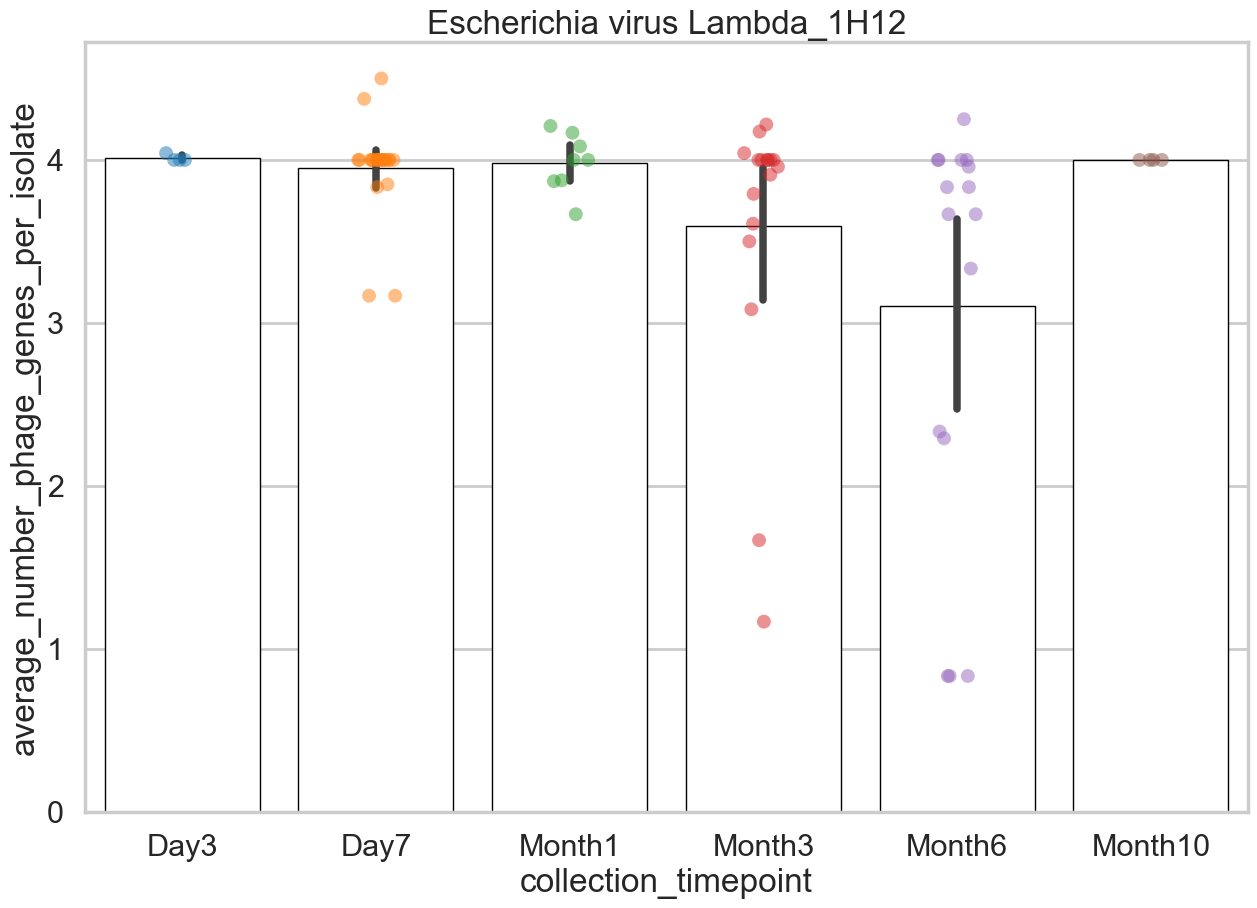

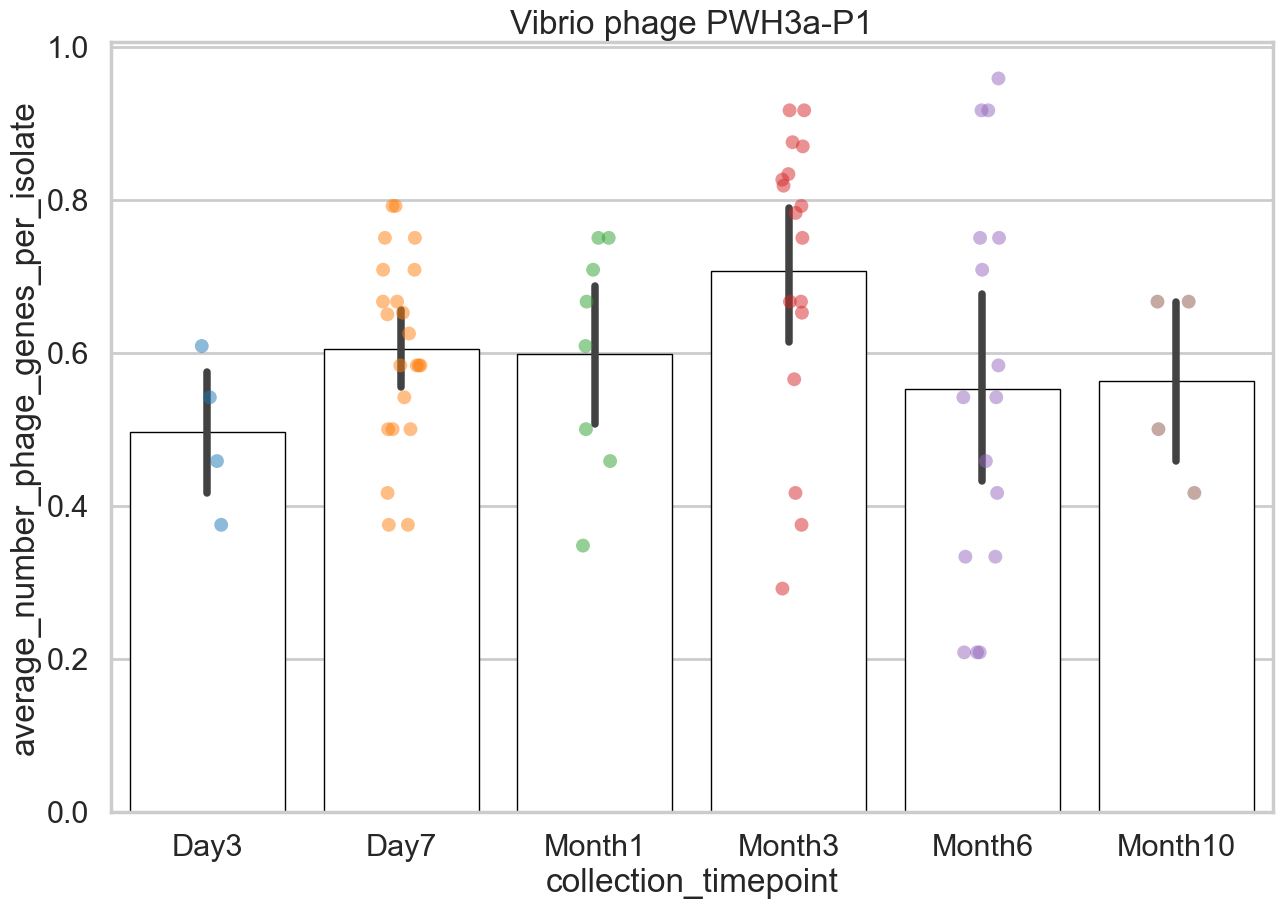

In [152]:
sns.set_context('poster')
for ph in ref_phage:
    plt.figure(figsize=(15,10))
    sns.barplot(data=AZ51_norm[AZ51_norm['phage']==ph], x='collection_timepoint', 
                y='average_number_phage_genes_per_isolate', color='white', ec='k', lw=1)
    sns.stripplot(data=AZ51_norm[AZ51_norm['phage']==ph], x='collection_timepoint', 
                y='average_number_phage_genes_per_isolate', size=10, alpha=0.5)
    plt.title("%s" % ph, fontsize=24)
    plt.show()

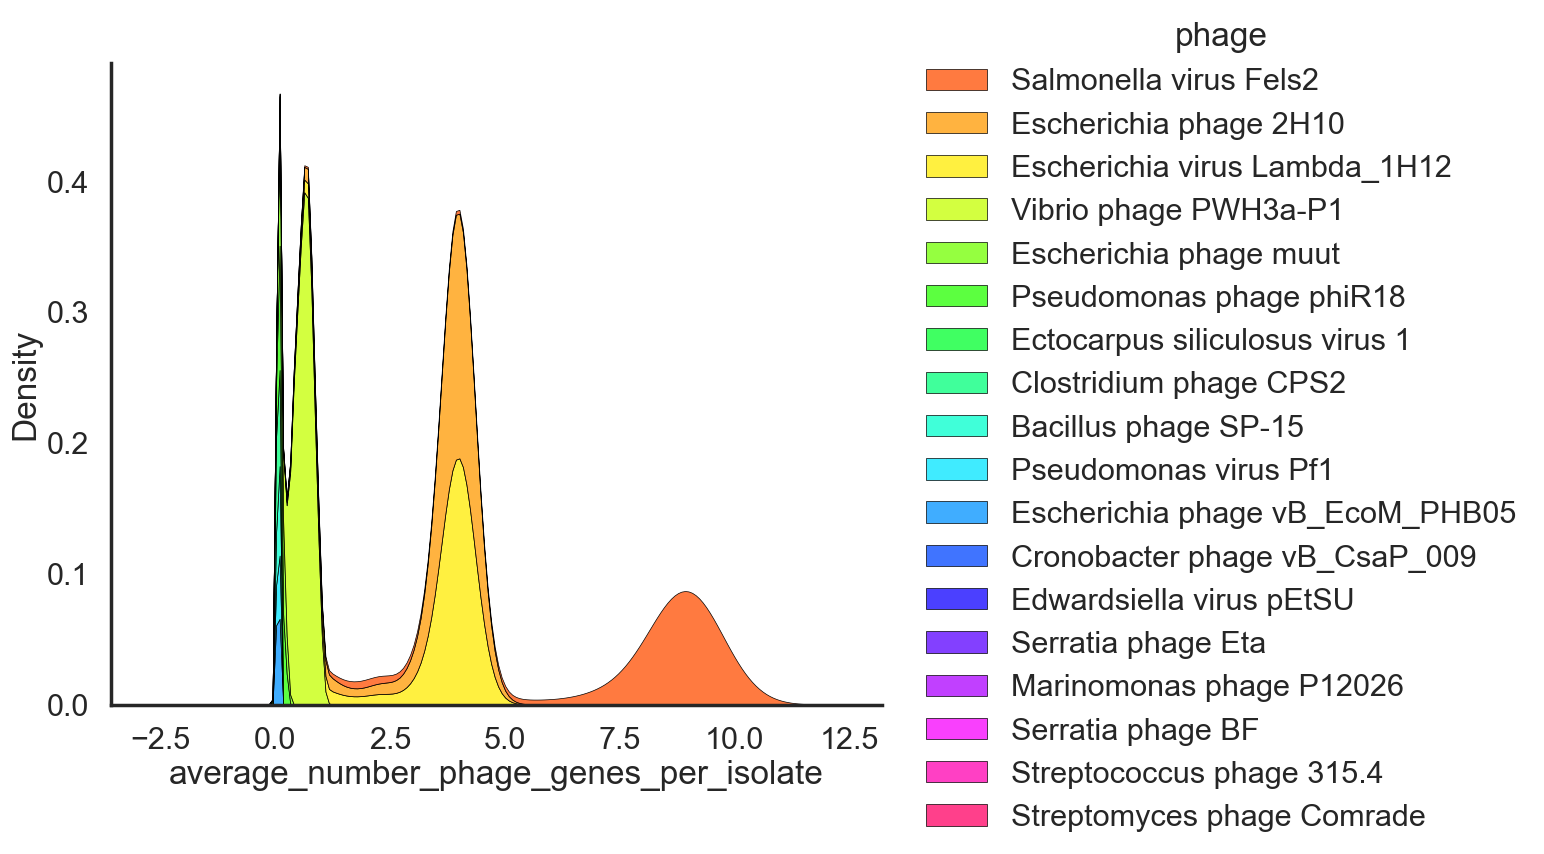

In [153]:
sns.set_style(style="white")

sns.displot(data=AZ51_norm.sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='phage', 
              palette='hsv', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_top_phage_gene_counts_time.svg', dpi=150, bbox_inches='tight')

In [154]:
AZ51_norm.sort_values('average_number_phage_genes_per_isolate', ascending=False).phage.unique()

array(['Salmonella virus Fels2', 'Escherichia phage 2H10',
       'Escherichia virus Lambda_1H12', 'Vibrio phage PWH3a-P1',
       'Escherichia phage muut', 'Pseudomonas phage phiR18',
       'Ectocarpus siliculosus virus 1', 'Clostridium phage CPS2',
       'Bacillus phage SP-15', 'Pseudomonas virus Pf1',
       'Escherichia phage vB_EcoM_PHB05', 'Cronobacter phage vB_CsaP_009',
       'Edwardsiella virus pEtSU', 'Serratia phage Eta',
       'Marinomonas phage P12026', 'Serratia phage BF',
       'Streptococcus phage 315.4', 'Streptomyces phage Comrade'],
      dtype=object)

In [155]:
Native_ref_highr['phage'].value_counts()

Salmonella virus Fels2           9
Escherichia phage 2H10           4
Escherichia virus Lambda_1H12    4
Vibrio phage PWH3a-P1            1
Name: phage, dtype: int64

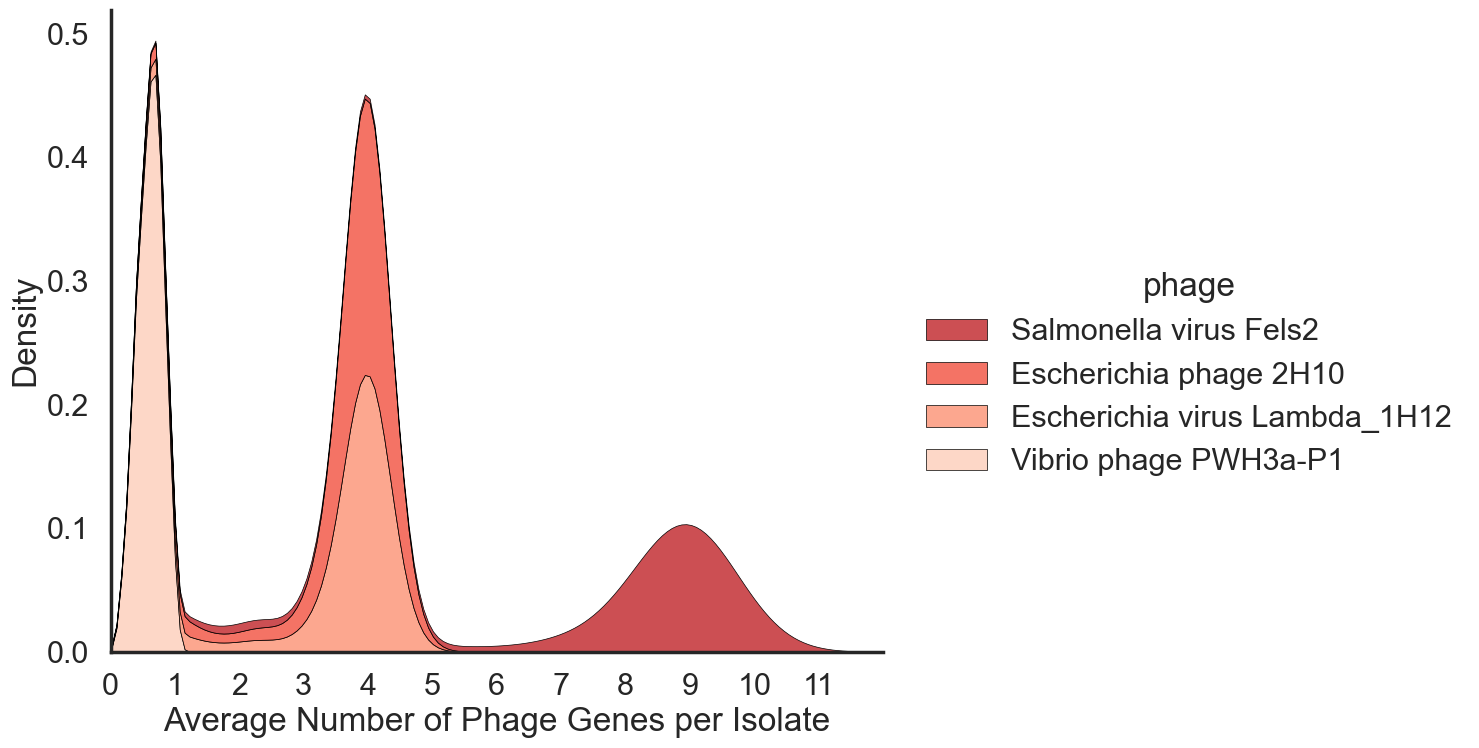

In [156]:
sns.set_style(style="white")

sns.displot(data=AZ51_norm[AZ51_norm.phage.isin(ref_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='phage', 
              palette='Reds_r', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xticks(np.arange(0, 12, 1))
plt.xlim(0,12)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_ref_phage.svg', dpi=150, bbox_inches='tight')

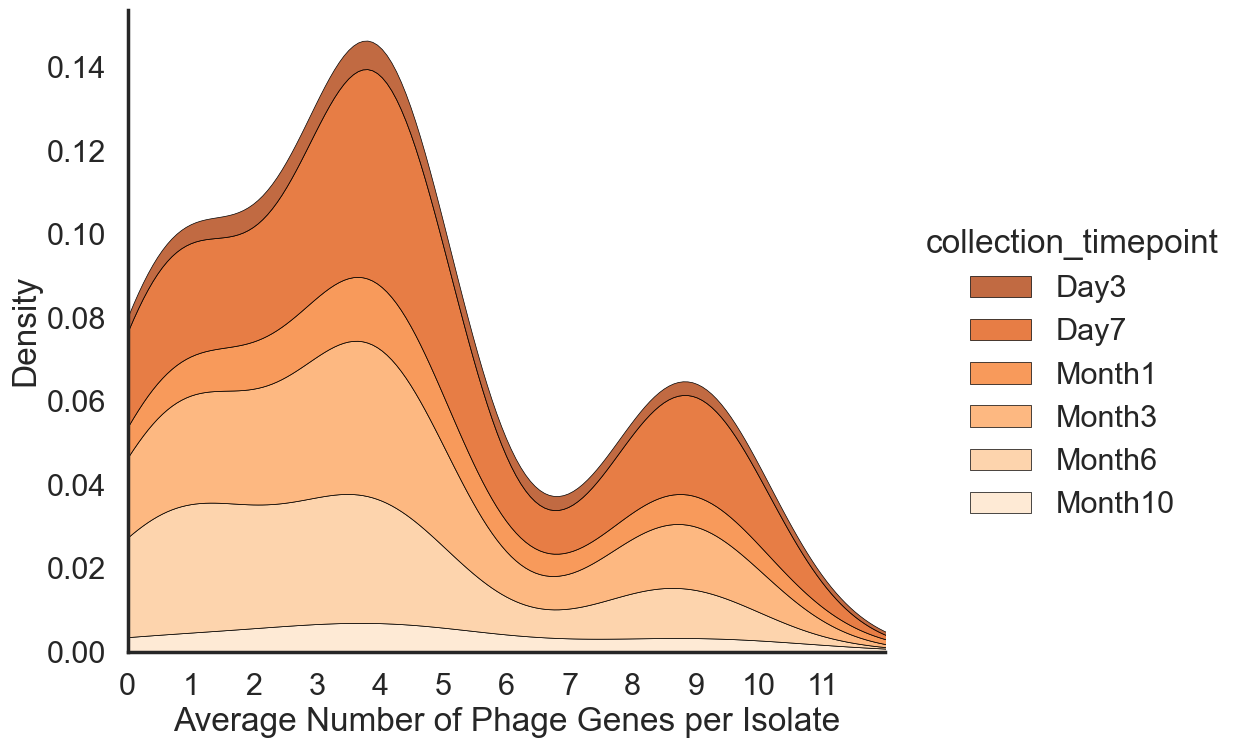

In [157]:
sns.set_style(style="white")

sns.displot(data=AZ51_norm[AZ51_norm.phage.isin(ref_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='Oranges_r', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xticks(np.arange(0, 12, 1))
plt.xlim(0,12)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_ref_phage.svg', dpi=150, bbox_inches='tight')

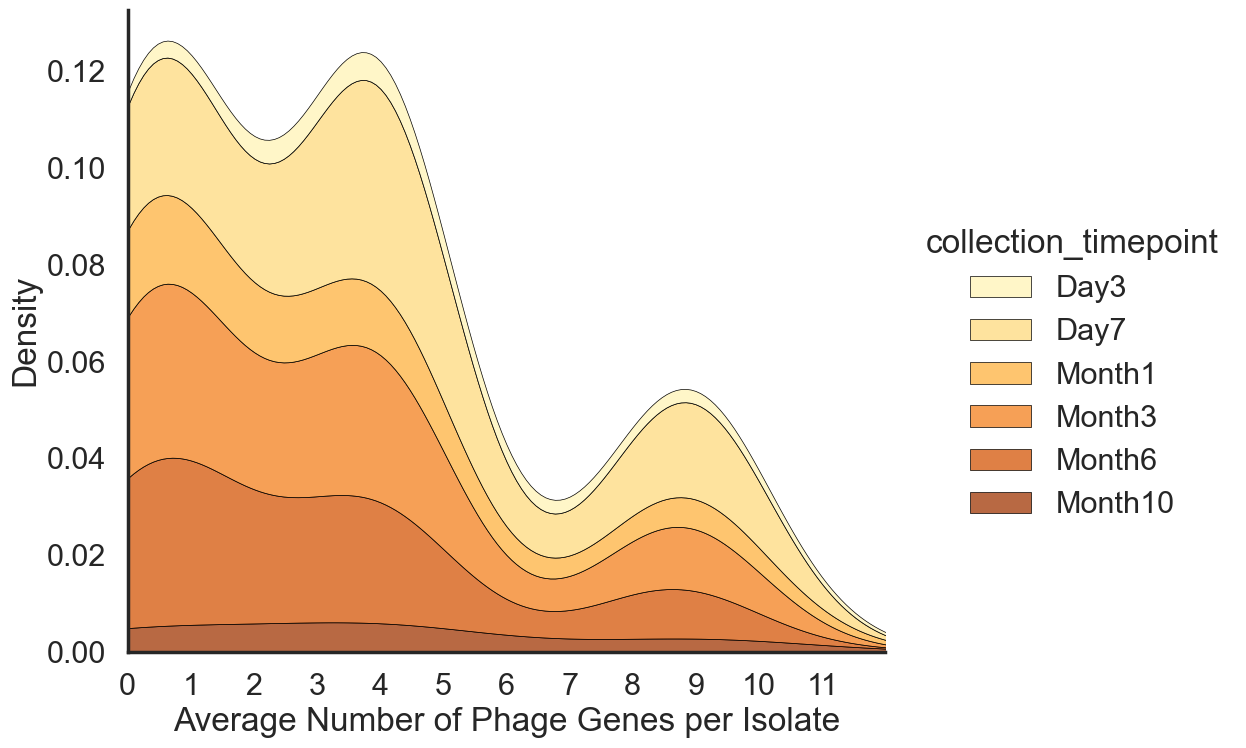

In [189]:
sns.set_style(style="white")

sns.displot(data=AZ51_norm.sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='YlOrBr', 
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xticks(np.arange(0, 12, 1))
plt.xlim(0,12)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_avg_all_phagegene_density.svg', dpi=150, bbox_inches='tight')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


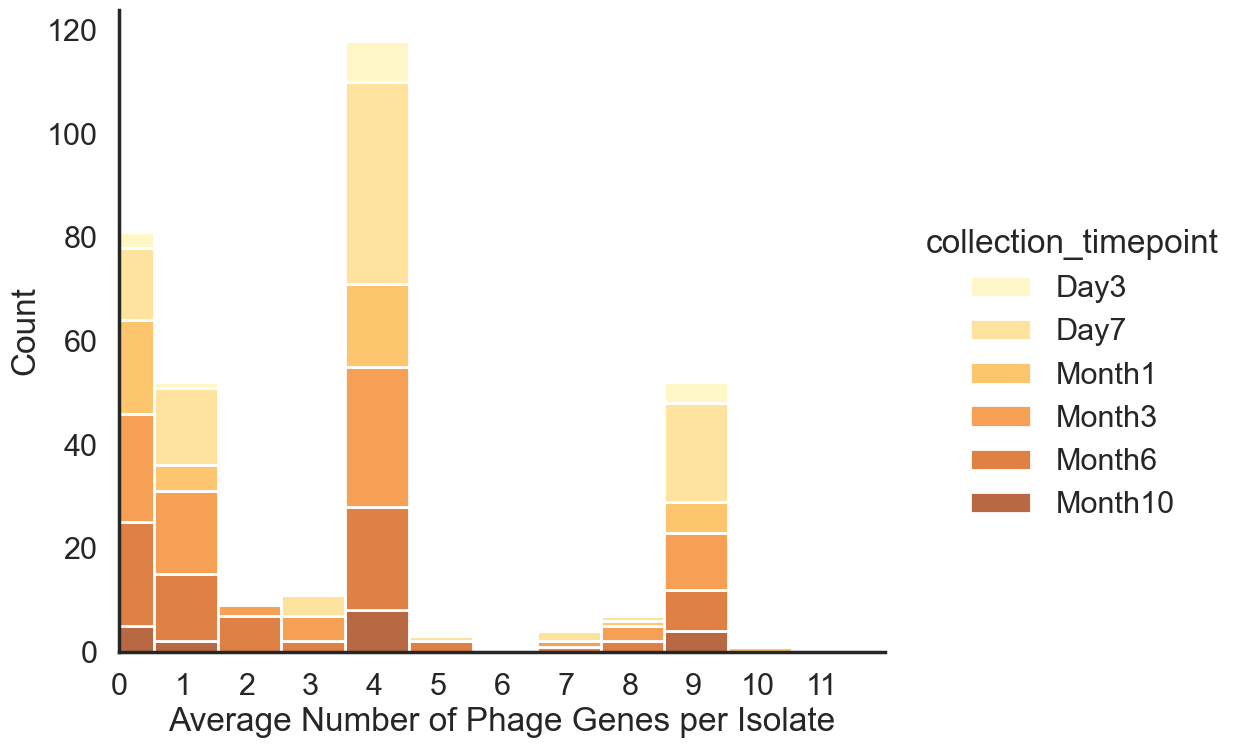

In [190]:
sns.set_style(style="white")

sns.displot(data=AZ51_norm.sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='YlOrBr', discrete=True,
            multiple="stack", height=8, aspect=1.2)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xticks(np.arange(0, 12, 1))
plt.xlim(0,12)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_avg_all_phagegene_count.svg', dpi=150, bbox_inches='tight')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:254: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


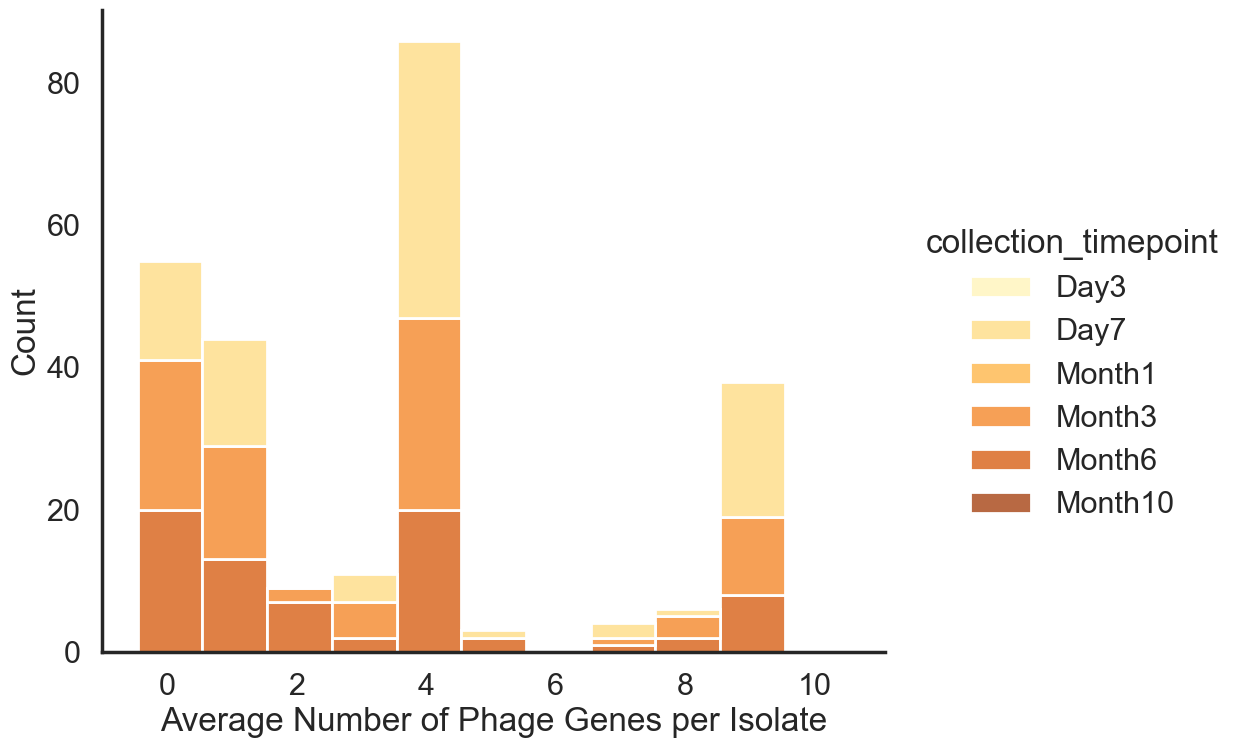

In [197]:
sns.set_style(style="white")
AZ51_norm_tp3 = AZ51_norm[AZ51_norm.collection_timepoint.isin(['Day7', 'Month3', 'Month6'])]
sns.displot(data=AZ51_norm_tp3.sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='YlOrBr', discrete=True,
            multiple="stack", height=8, aspect=1.2)

plt.xlabel('Average Number of Phage Genes per Isolate')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_avg_3tp_phagegene_count.svg', dpi=150, bbox_inches='tight')

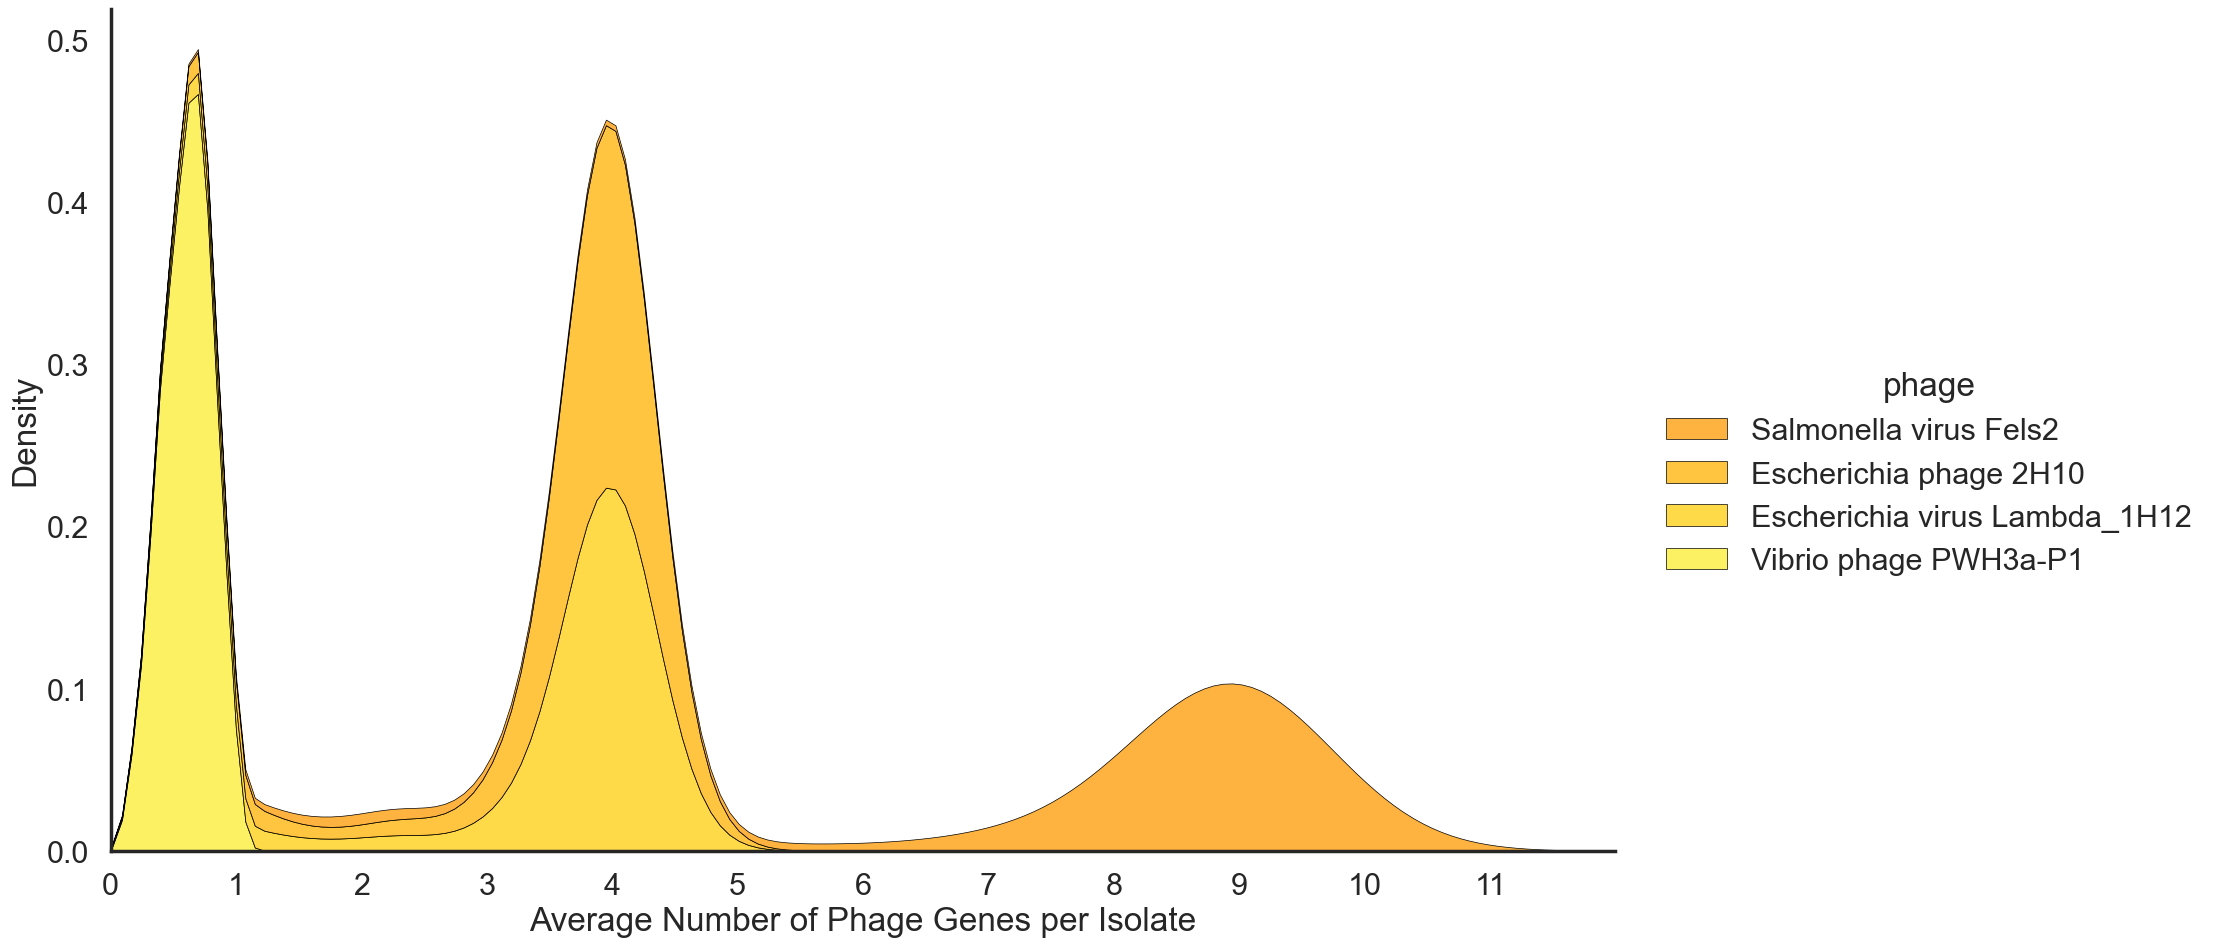

In [159]:
sns.set_style(style="white")

sns.displot(data=AZ51_norm[AZ51_norm.phage.isin(top_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='phage', 
              palette='Wistia_r', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=10, aspect=1.7,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xticks(np.arange(0, 12, 1))
plt.xlim(0,12)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_top_phage.svg', dpi=150, bbox_inches='tight')
#all top phage are same as ref

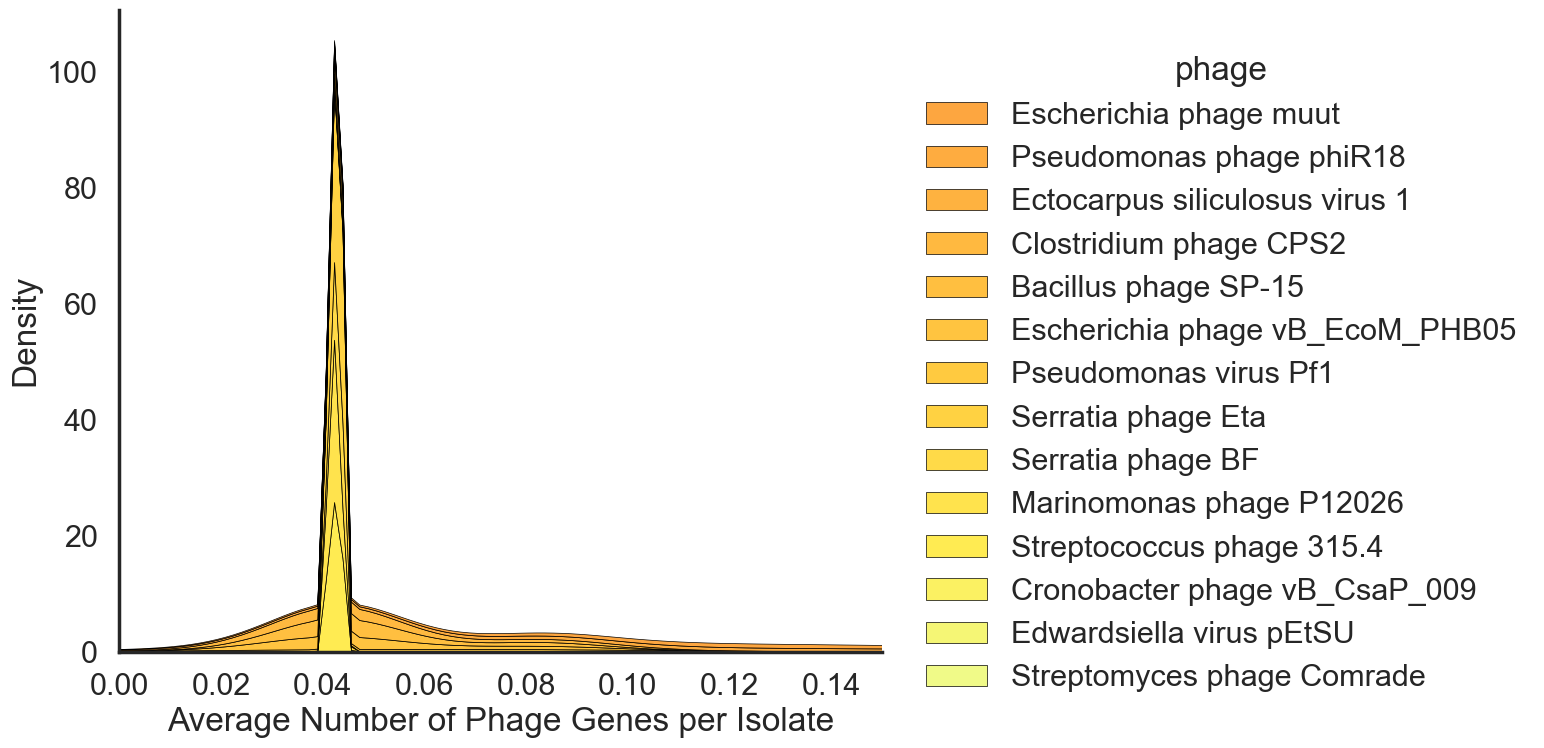

In [160]:
sns.set_style(style="white")

sns.displot(data=AZ51_norm[AZ51_norm.phage.isin(bottom_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='average_number_phage_genes_per_isolate', hue='phage', 
              palette='Wistia_r', 
            warn_singular=False, #don't care that it won't plot things with no variance
            multiple="stack", kind='kde', height=8, aspect=1.2,
           ec='k', lw=0.5)

plt.xlabel('Average Number of Phage Genes per Isolate')
plt.xticks(np.arange(0, 0.16, 0.02))
plt.xlim(0,0.15)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('figures/AZ51_minor_phage.svg', dpi=150, bbox_inches='tight')

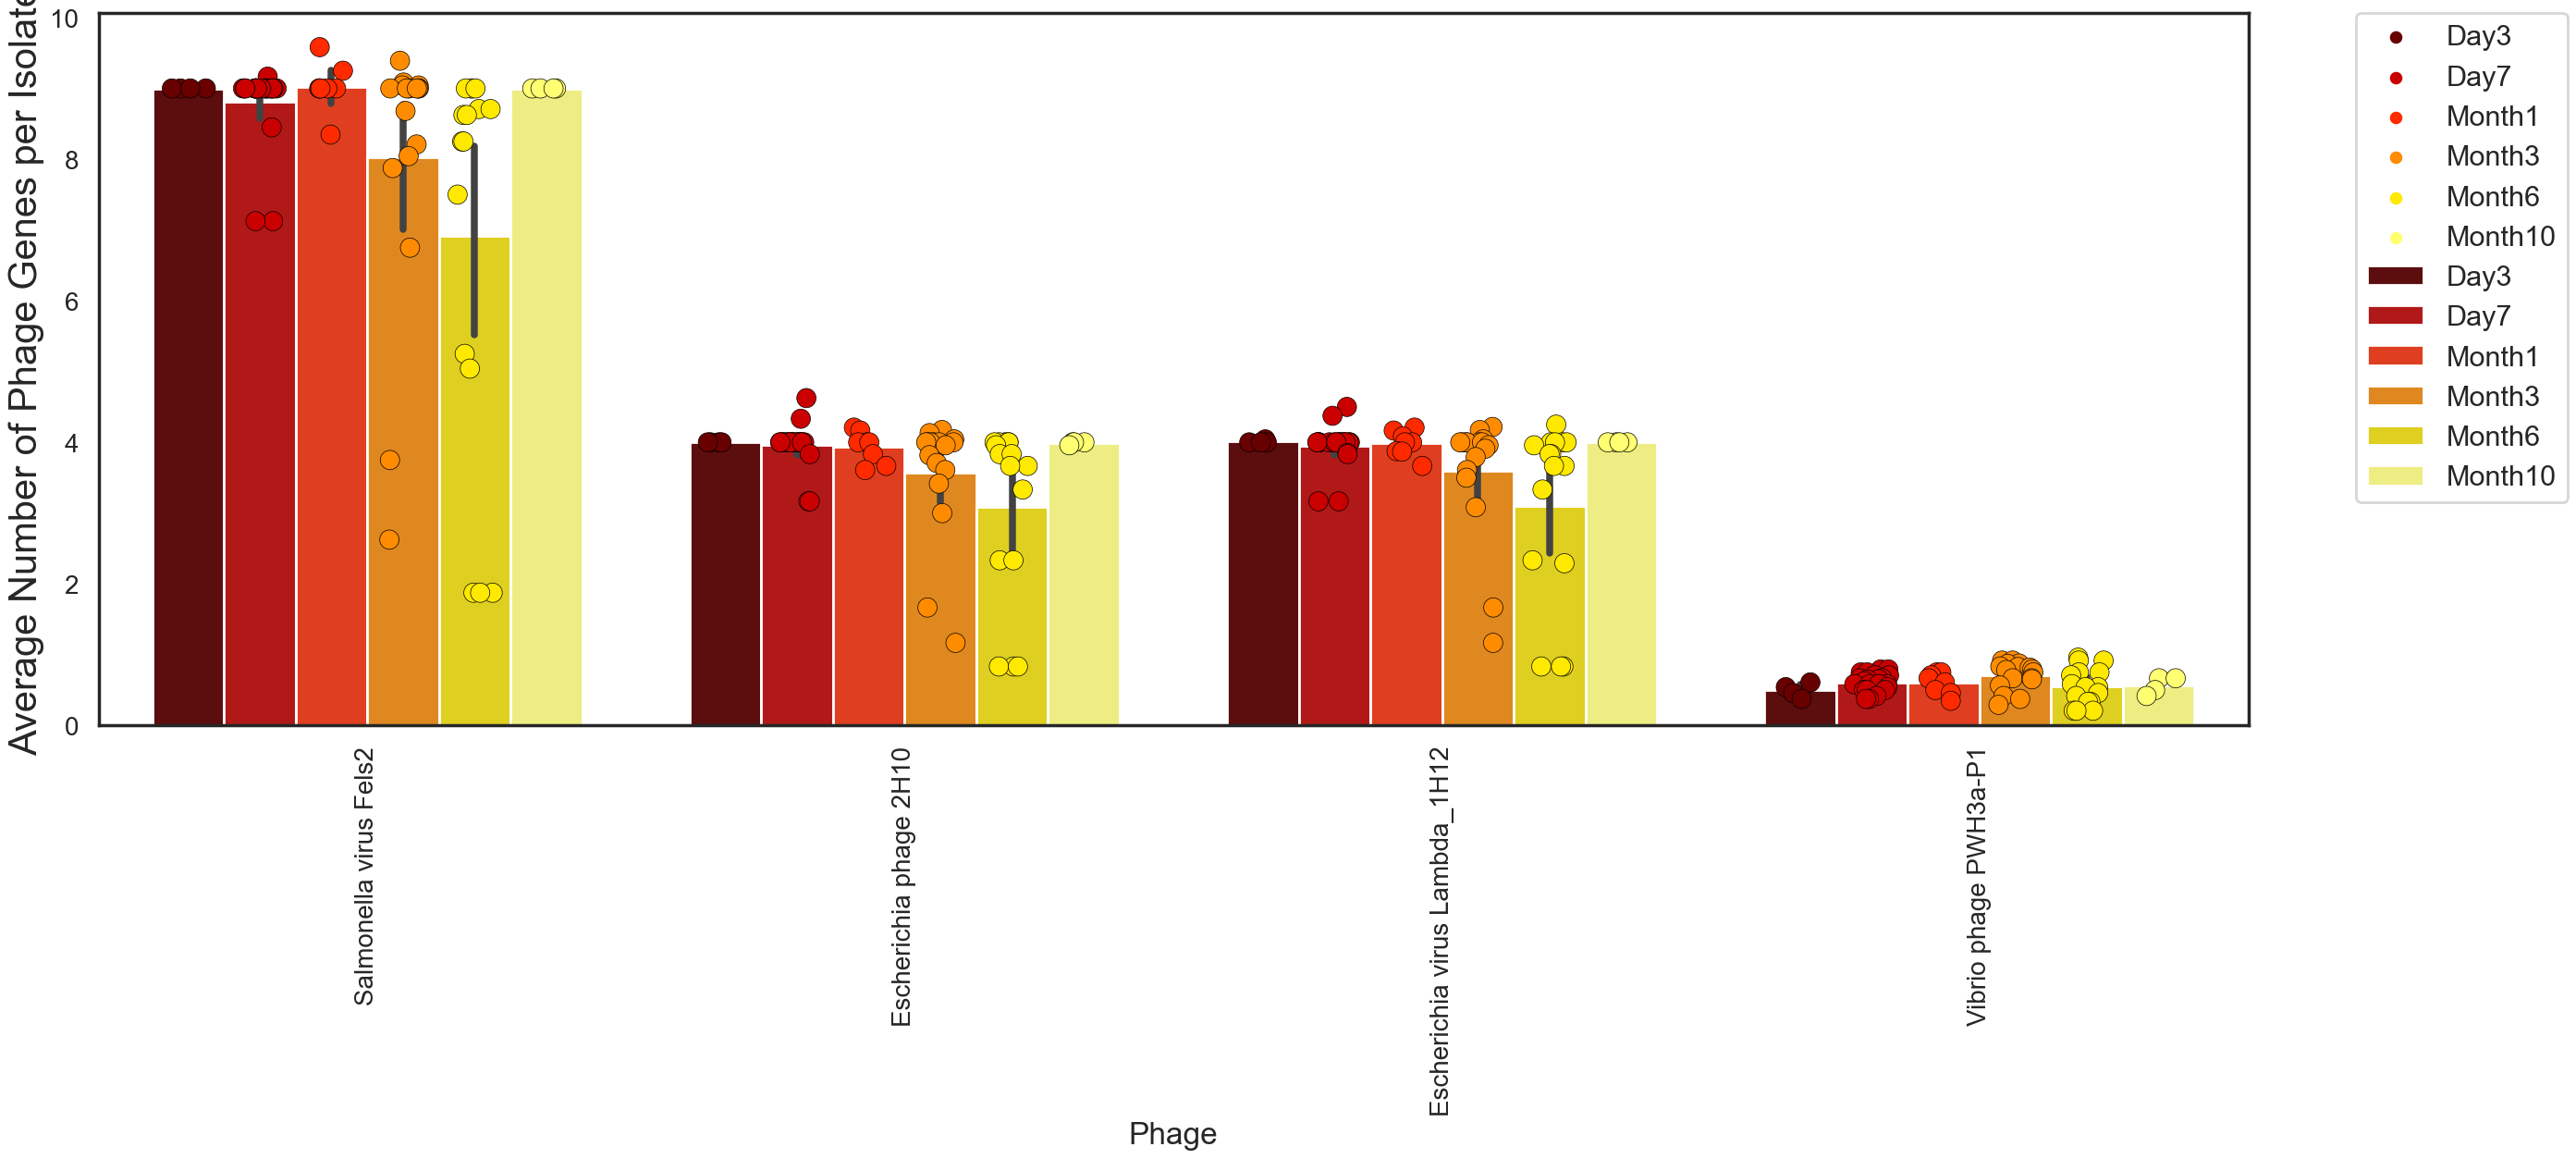

In [161]:
plt.figure(figsize=(30,10))
sns.set_style(style="white")

sns.barplot(data=AZ51_norm[AZ51_norm.phage.isin(top_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='hot')
sns.stripplot(data=AZ51_norm[AZ51_norm.phage.isin(top_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              dodge=True, size=15, palette='hot', edgecolor='k', linewidth=0.5, jitter=0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20, rotation=90)
plt.ylabel('Average Number of Phage Genes per Isolate', fontsize=30)
plt.xlabel('Phage', fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_top_phage_norm_time_top.svg', dpi=150, bbox_inches='tight')

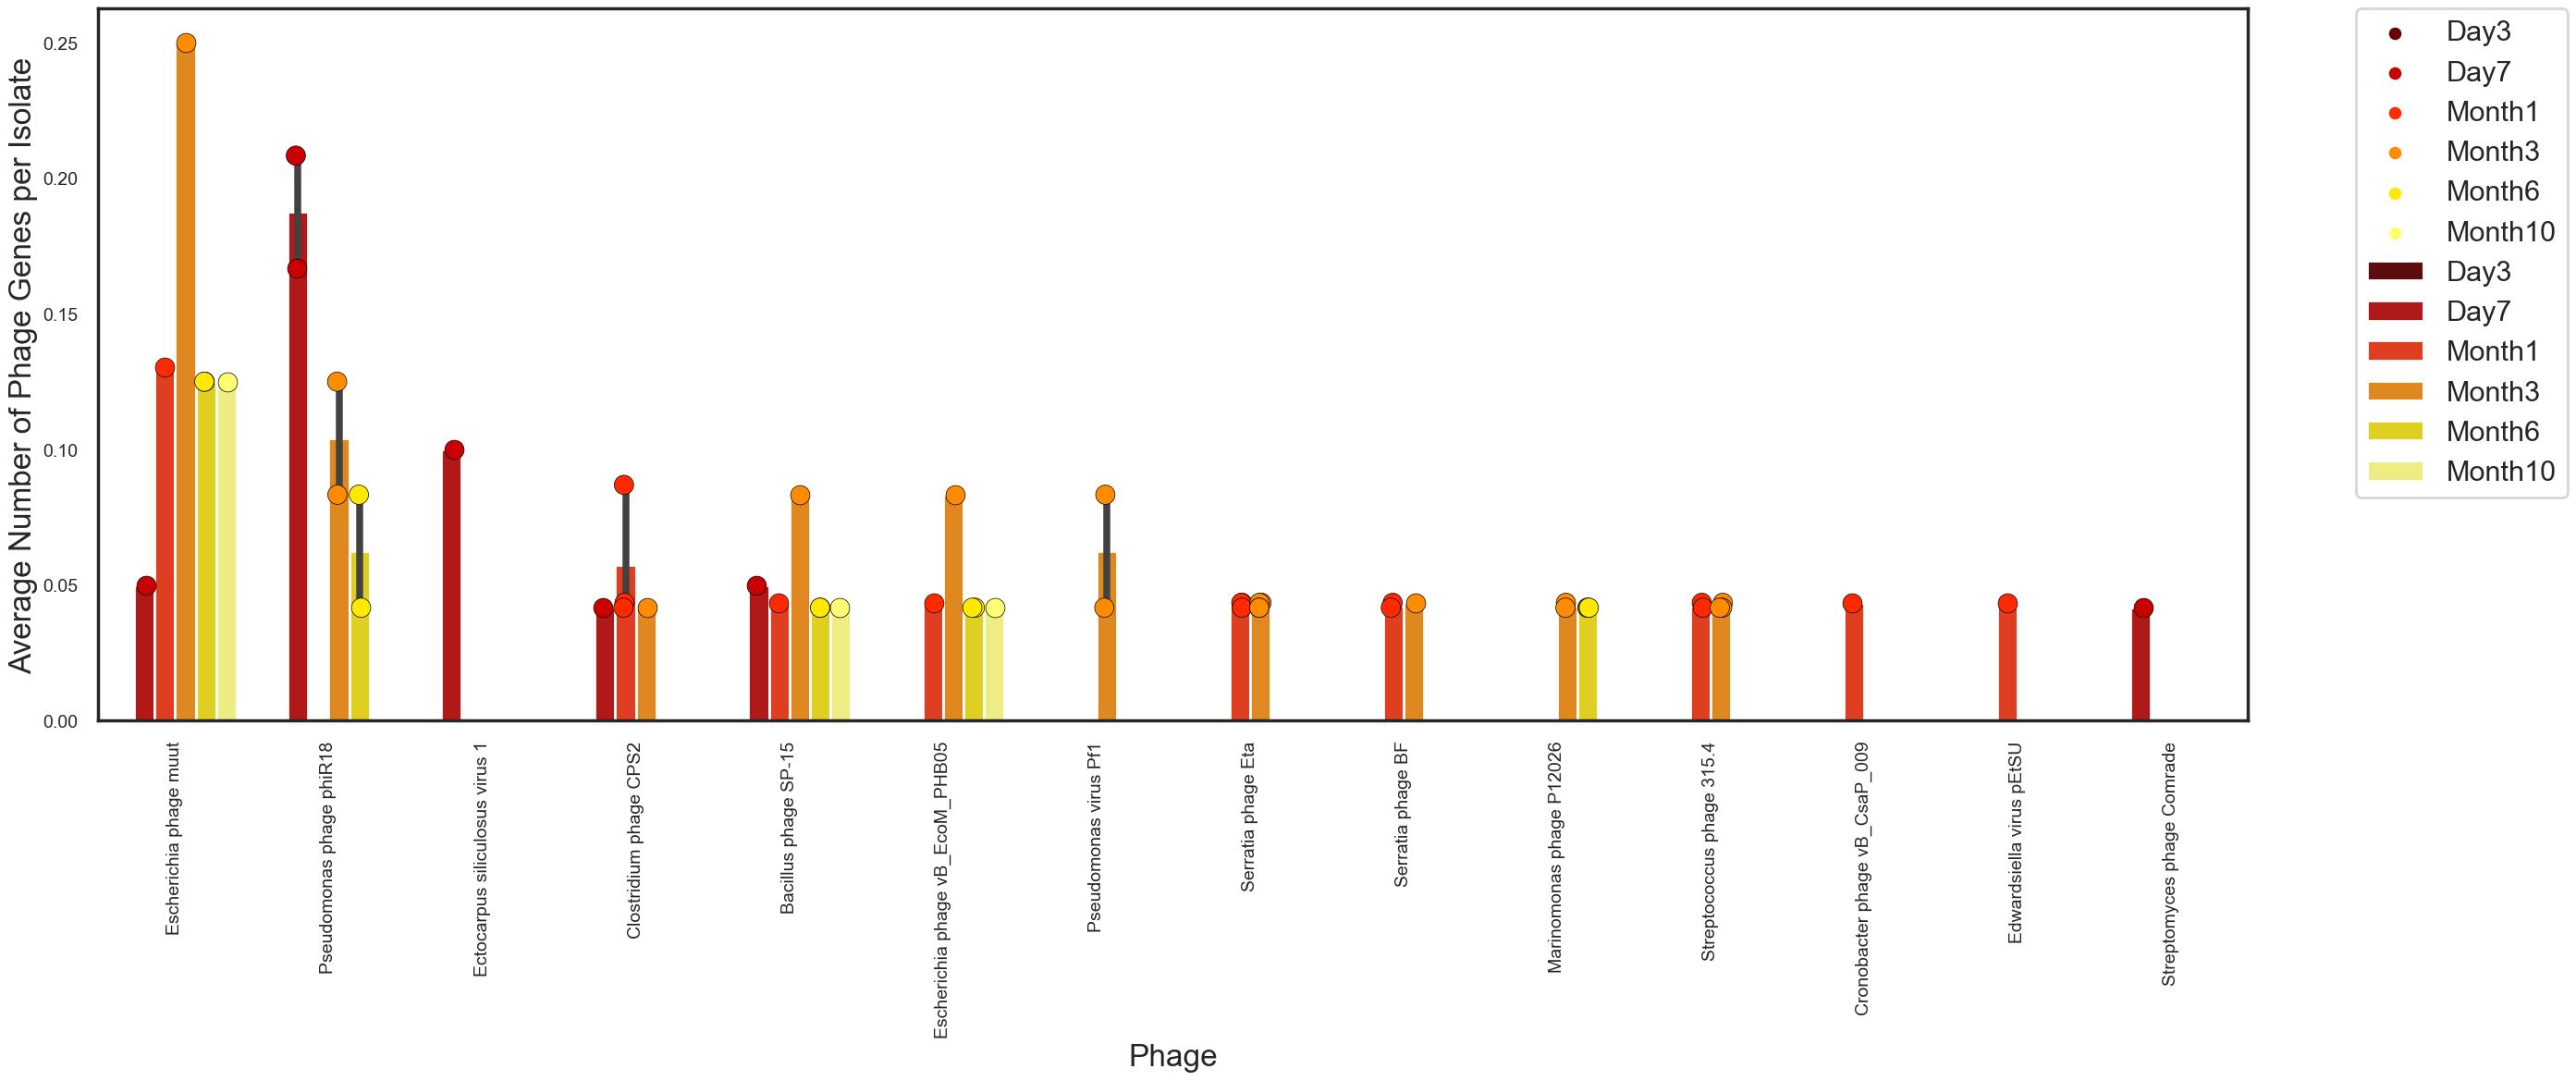

In [162]:
plt.figure(figsize=(30,10))
sns.set_style(style="white")

sns.barplot(data=AZ51_norm[AZ51_norm.phage.isin(bottom_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='hot')
sns.stripplot(data=AZ51_norm[AZ51_norm.phage.isin(bottom_phage)].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              dodge=True, size=15, palette='hot', edgecolor='k', linewidth=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Average Number of Phage Genes per Isolate', fontsize=24)
plt.xlabel('Phage', fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_bottom_phage_norm_time_all.svg', dpi=150, bbox_inches='tight')

In [163]:
AZ51_bottom_mult_tp = AZ51_norm[AZ51_norm.phage.isin(bottom_phage)]
v=pd.crosstab(AZ51_bottom_mult_tp.phage,AZ51_bottom_mult_tp.collection_timepoint)
vv = v[v.ne(0).sum(1)>1].replace(0,np.nan).stack()
vv.reset_index().phage.unique()

array(['Bacillus phage SP-15', 'Clostridium phage CPS2',
       'Escherichia phage muut', 'Escherichia phage vB_EcoM_PHB05',
       'Marinomonas phage P12026', 'Pseudomonas phage phiR18',
       'Serratia phage BF', 'Serratia phage Eta',
       'Streptococcus phage 315.4'], dtype=object)

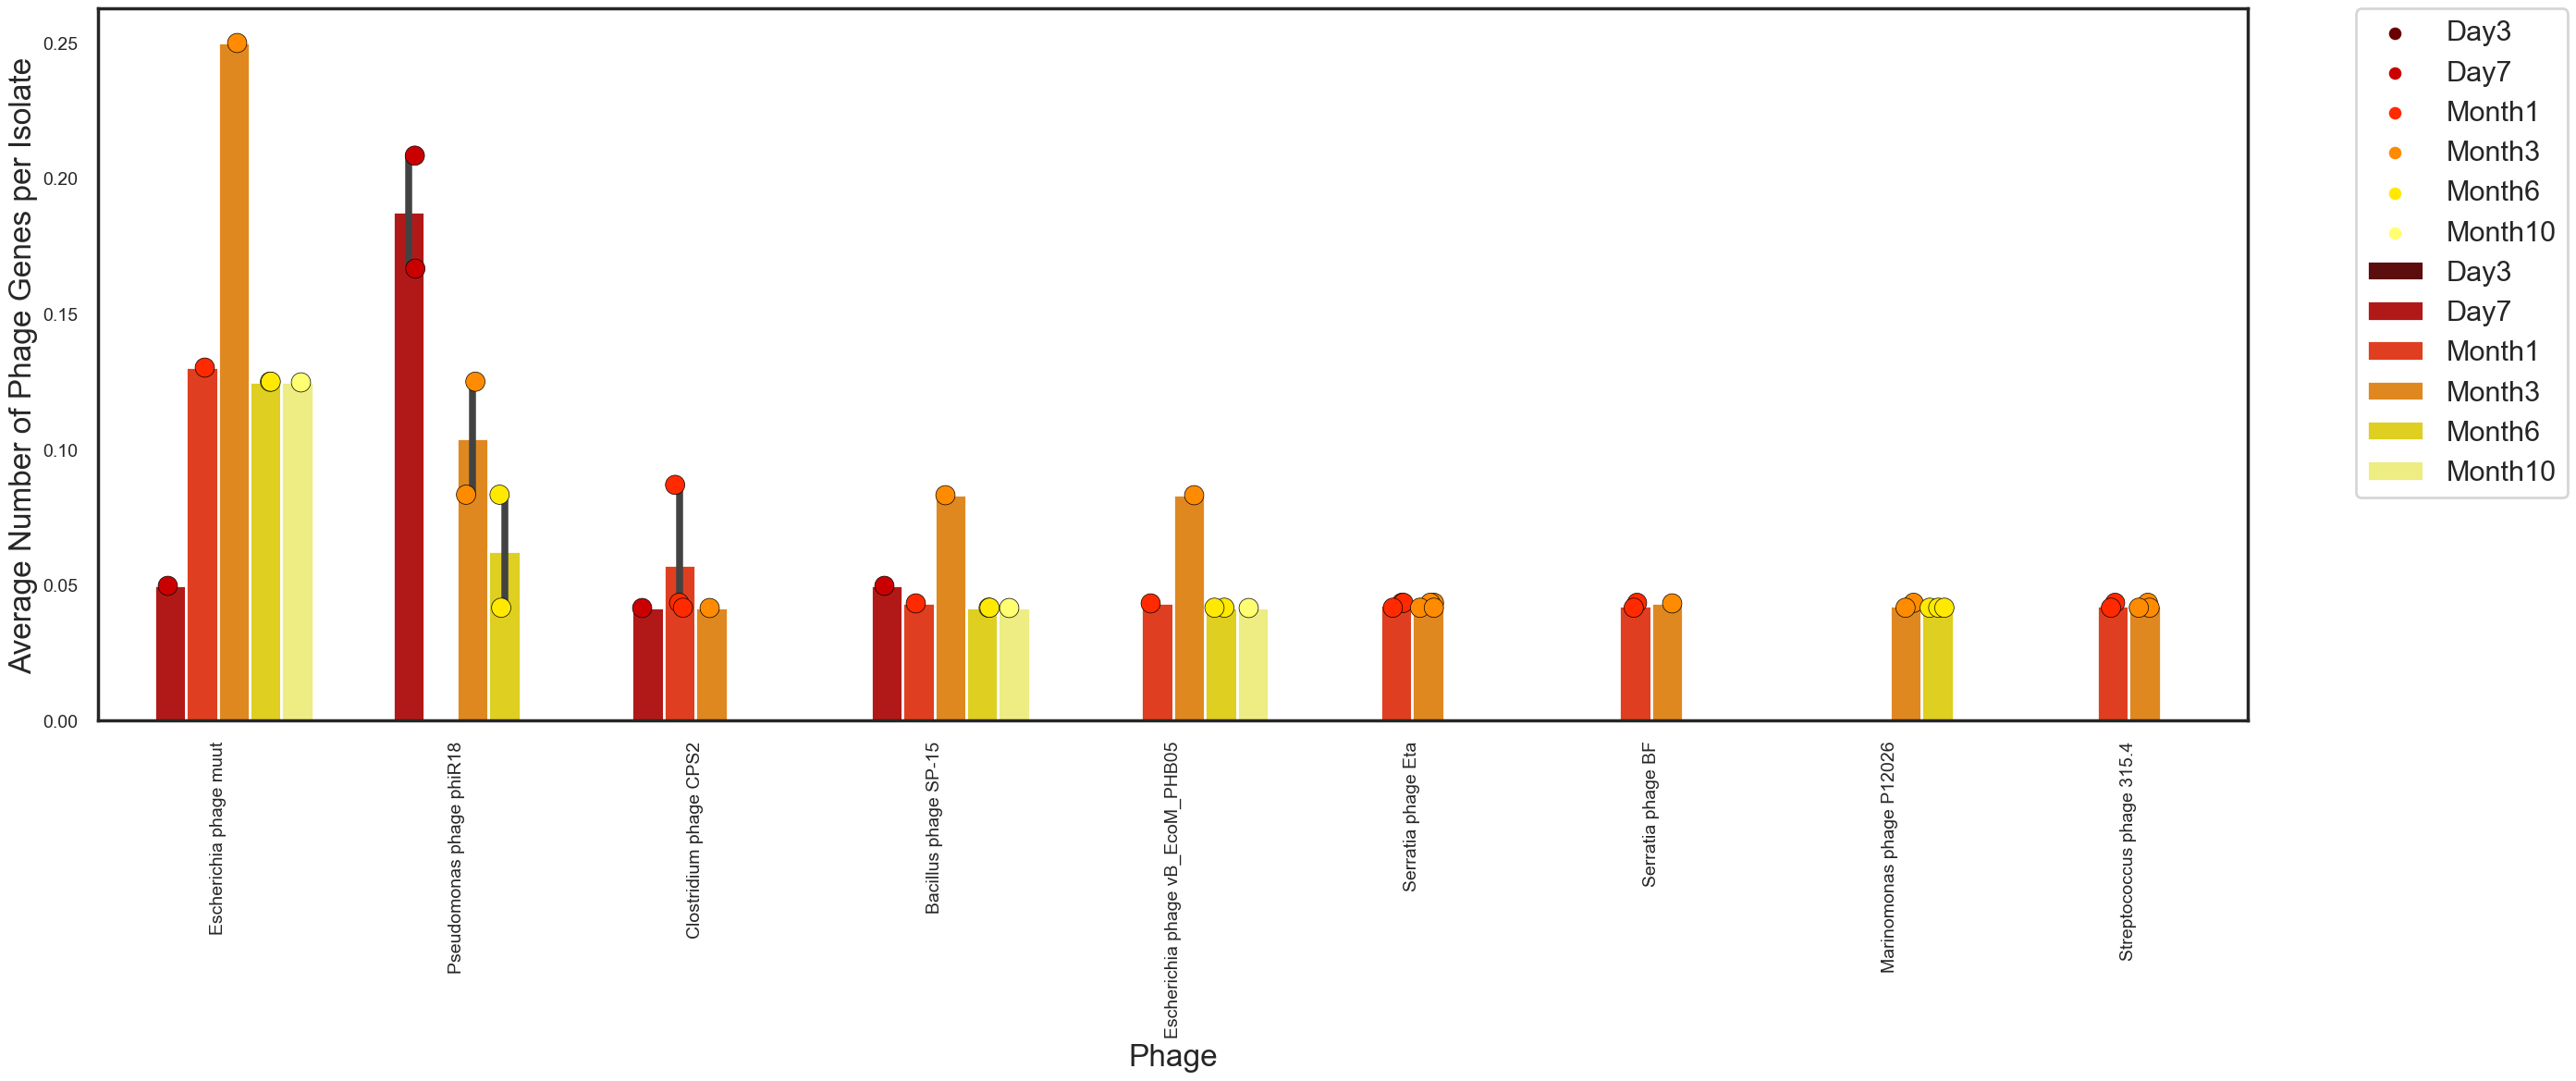

In [164]:
plt.figure(figsize=(30,10))
sns.set_style(style="white")

sns.barplot(data=AZ51_norm[AZ51_norm.phage.isin(vv.reset_index().phage.unique())].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              palette='hot')
sns.stripplot(data=AZ51_norm[AZ51_norm.phage.isin(vv.reset_index().phage.unique())].sort_values('average_number_phage_genes_per_isolate', ascending=False),
              x='phage', y='average_number_phage_genes_per_isolate', hue='collection_timepoint', 
              dodge=True, size=15, palette='hot', edgecolor='k', linewidth=0.5, jitter=0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Average Number of Phage Genes per Isolate', fontsize=24)
plt.xlabel('Phage', fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_bottom_phage_norm_time_mult_tp.svg', dpi=150, bbox_inches='tight')

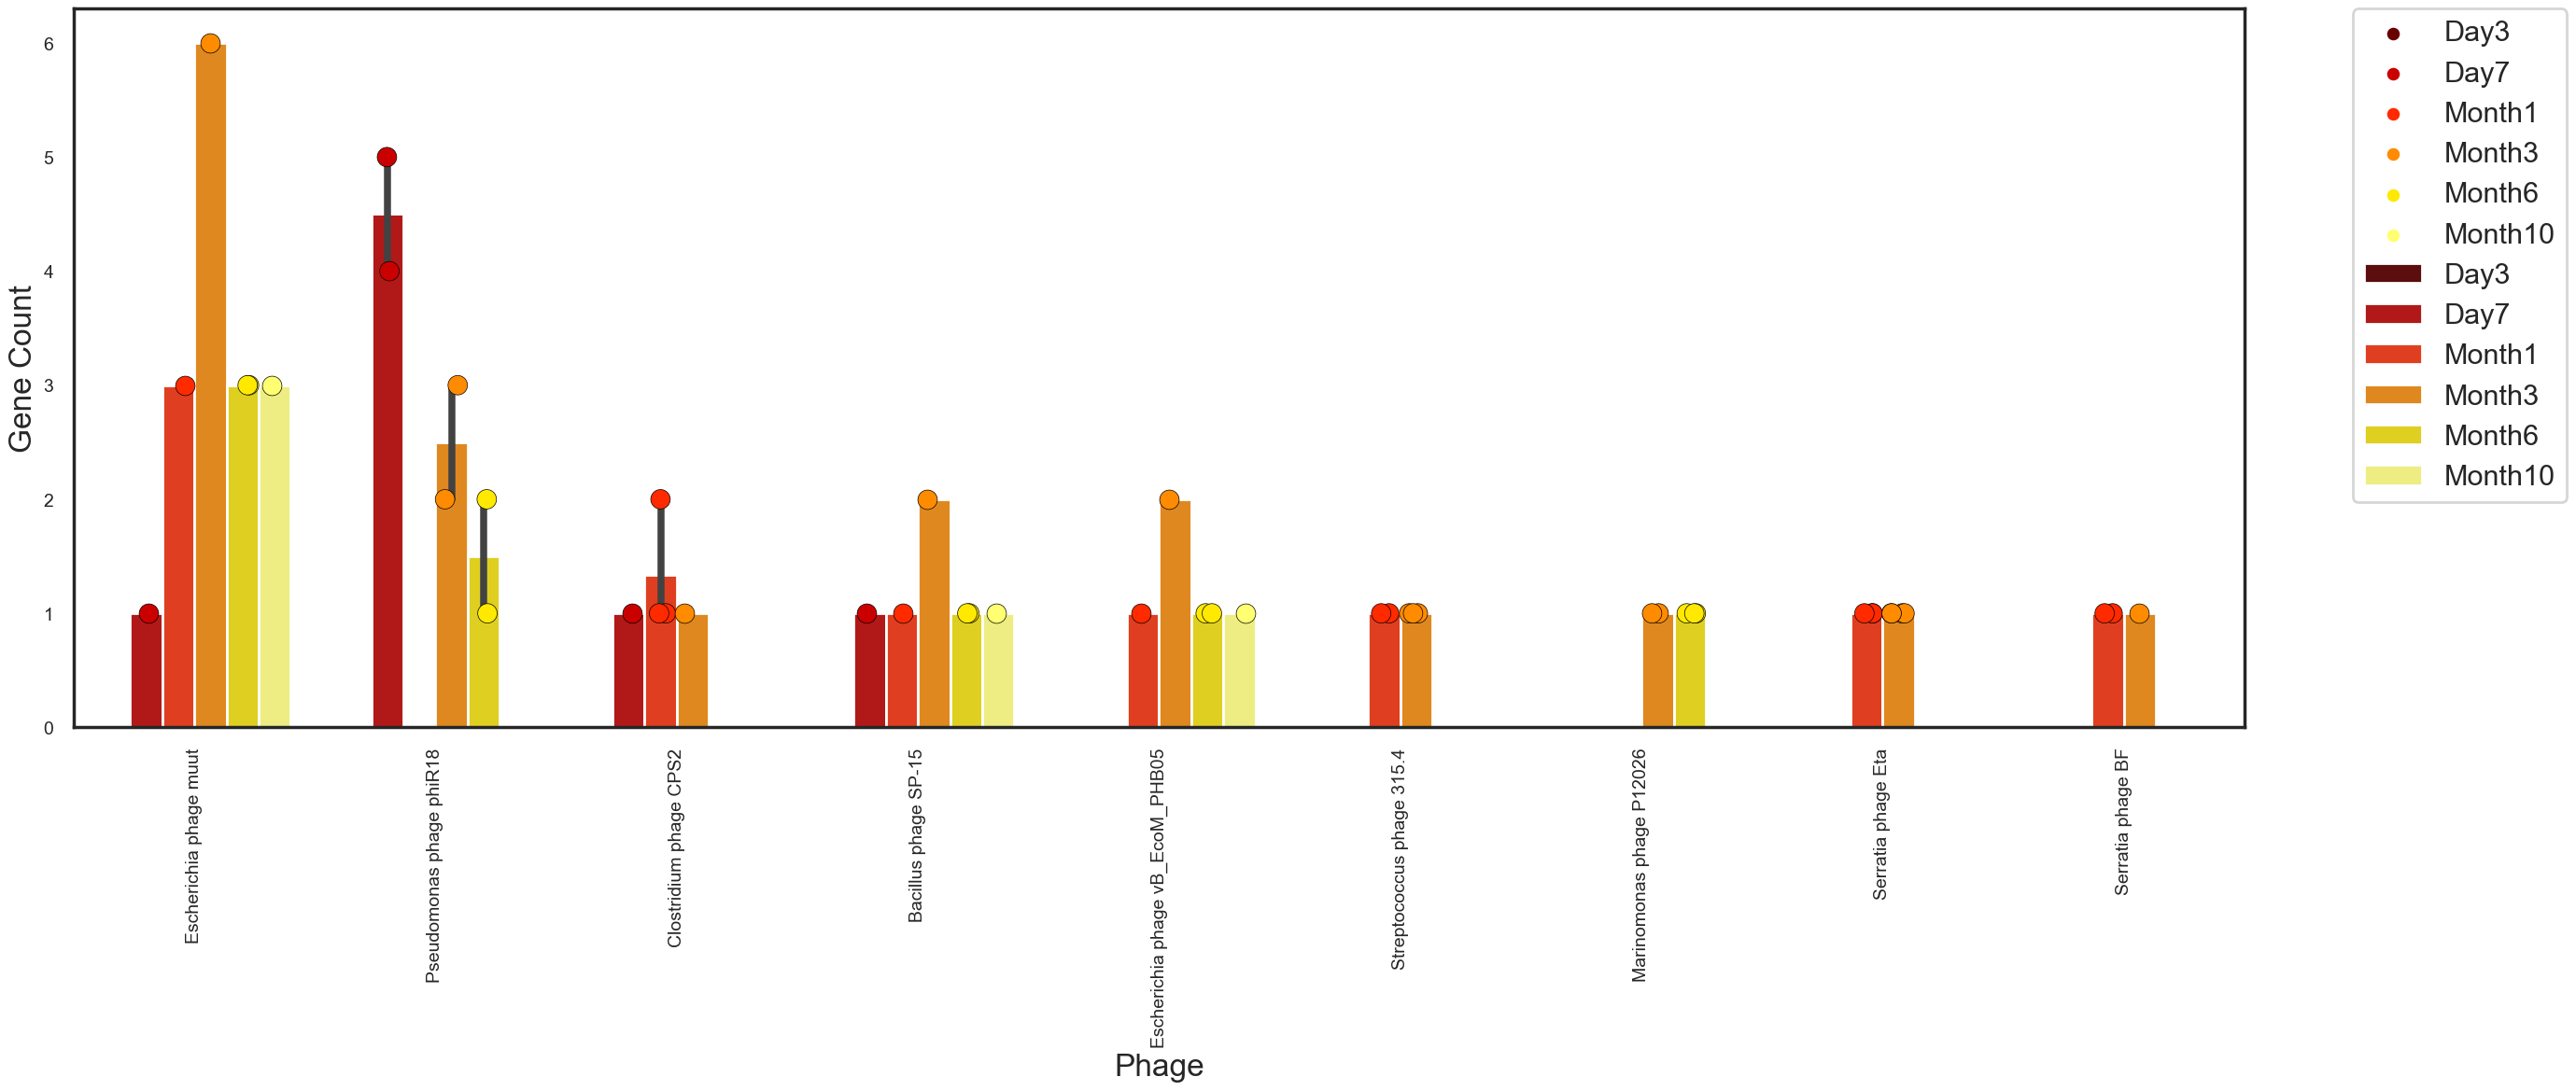

In [165]:
#COUNTS! Non-normalized
plt.figure(figsize=(30,10))
sns.set_style(style="white")

sns.barplot(data=AZ51_norm[AZ51_norm.phage.isin(vv.reset_index().phage.unique())].sort_values('gene', ascending=False),
              x='phage', y='gene', hue='collection_timepoint', 
              palette='hot')
sns.stripplot(data=AZ51_norm[AZ51_norm.phage.isin(vv.reset_index().phage.unique())].sort_values('gene', ascending=False),
              x='phage', y='gene', hue='collection_timepoint', 
              dodge=True, size=15, palette='hot', edgecolor='k', linewidth=0.5, jitter=0.2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=90)
plt.ylabel('Gene Count', fontsize=24)
plt.xlabel('Phage', fontsize=24)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('figures/AZ51_bottom_phage_counts_mult_tp.svg', dpi=150, bbox_inches='tight')

## Make a biom file

In [166]:
AZ51_biom = AZ51_phage.reset_index()
AZ51_biom_table = AZ51_biom[['viral_id', 'index']].copy()
AZ51_biom_table.head()

viral_id       index
0  YP_007675887.1  41B_Day7_1
1  YP_009909729.1  41B_Day7_1
2  YP_009909713.1  41B_Day7_1
3  YP_009909494.1  41B_Day7_1
4  YP_009909709.1  41B_Day7_1

In [167]:
AZ51_biom_table['index'] = AZ51_biom_table['index'].apply(lambda x: x.replace('_','.'))

In [168]:
AZ51_biom_table['#OTU ID'] = '12986.' + AZ51_biom_table['index'].astype(str)

In [169]:
AZ51_biom_table.drop(columns=['index'], inplace=True)

In [170]:
AZ51_biom_table.head()

viral_id           #OTU ID
0  YP_007675887.1  12986.41B.Day7.1
1  YP_009909729.1  12986.41B.Day7.1
2  YP_009909713.1  12986.41B.Day7.1
3  YP_009909494.1  12986.41B.Day7.1
4  YP_009909709.1  12986.41B.Day7.1

In [171]:
AZ51_biom_table2 = AZ51_biom_table.groupby(AZ51_biom_table.columns.tolist(),as_index=False).size()
AZ51_biom_table2.head()

viral_id              #OTU ID  size
0  NP_039606.1   12986.45L.Month3.6     2
1  NP_039606.1  12986.45N.Month3.17     1
2  NP_077550.1    12986.45L.Day7.24     2
3  NP_795546.1   12986.41B.Month1.9     1
4  NP_795546.1  12986.41L.Month3.10     1

In [172]:
AZ51_biom_table2 = AZ51_biom_table.groupby(AZ51_biom_table.columns.tolist()).size().reset_index().rename(columns={0:'counts'})
AZ51_biom_table2.head()

viral_id              #OTU ID  counts
0  NP_039606.1   12986.45L.Month3.6       2
1  NP_039606.1  12986.45N.Month3.17       1
2  NP_077550.1    12986.45L.Day7.24       2
3  NP_795546.1   12986.41B.Month1.9       1
4  NP_795546.1  12986.41L.Month3.10       1

In [173]:
AZ51_biom_table3 = AZ51_biom_table2.pivot_table('counts', ['#OTU ID'], 'viral_id')
AZ51_biom_table3.head()

viral_id           NP_039606.1  NP_077550.1  NP_795546.1  YP_001718718.1  \
#OTU ID                                                                    
12986.41B.Day7.1           NaN          NaN          NaN             1.0   
12986.41B.Day7.10          NaN          NaN          NaN             1.0   
12986.41B.Day7.11          NaN          NaN          NaN             1.0   
12986.41B.Day7.12          NaN          NaN          NaN             1.0   
12986.41B.Day7.13          NaN          NaN          NaN             1.0   

viral_id           YP_001718719.1  YP_001718723.1  YP_001718724.1  \
#OTU ID                                                             
12986.41B.Day7.1              1.0             1.0             1.0   
12986.41B.Day7.10             1.0             1.0             1.0   
12986.41B.Day7.11             1.0             1.0             1.0   
12986.41B.Day7.12             1.0             1.0             1.0   
12986.41B.Day7.13             1.0             1.0             1.0   

viral_id           YP_001718732.1  YP_001718740.1  YP_001718751.1  ...  \
#OTU ID                                                            ...   
12986.41B.Day7.1              1.0             1.0             1.0  ...   
12986.41B.Day7.10             1.0             1.0             1.0  ...   
12986.41B.Day7.11             1.0             1.0             1.0  ...   
12986.41B.Day7.12             1.0             1.0             1.0  ...   
12986.41B.Day7.13             1.0             1.0             1.0  ...   

viral_id           YP_009909553.1  YP_009909561.1  YP_009909709.1  \
#OTU ID                                                             
12986.41B.Day7.1              1.0             1.0             1.0   
12986.41B.Day7.10             1.0             1.0             1.0   
12986.41B.Day7.11             1.0             1.0             1.0   
12986.41B.Day7.12             1.0             1.0             1.0   
12986.41B.Day7.13             1.0             1.0             1.0   

viral_id           YP_009909713.1  YP_009909729.1  YP_009909760.1  \
#OTU ID                                                             
12986.41B.Day7.1              1.0             1.0             1.0   
12986.41B.Day7.10             1.0             1.0             1.0   
12986.41B.Day7.11             1.0             1.0             1.0   
12986.41B.Day7.12             1.0             1.0             1.0   
12986.41B.Day7.13             1.0             1.0             1.0   

viral_id           YP_009984428.1  YP_009985670.1  YP_009985673.1  \
#OTU ID                                                             
12986.41B.Day7.1              NaN             NaN             NaN   
12986.41B.Day7.10             NaN             NaN             NaN   
12986.41B.Day7.11             NaN             NaN             NaN   
12986.41B.Day7.12             NaN             NaN             NaN   
12986.41B.Day7.13             NaN             NaN             NaN   

viral_id           YP_009985831.1  
#OTU ID                            
12986.41B.Day7.1              NaN  
12986.41B.Day7.10             NaN  
12986.41B.Day7.11             NaN  
12986.41B.Day7.12             NaN  
12986.41B.Day7.13             NaN  

[5 rows x 39 columns]

In [174]:
AZ51_biom_table4 = AZ51_biom_table3.fillna(0)
AZ51_biom_table4.head()

viral_id           NP_039606.1  NP_077550.1  NP_795546.1  YP_001718718.1  \
#OTU ID                                                                    
12986.41B.Day7.1           0.0          0.0          0.0             1.0   
12986.41B.Day7.10          0.0          0.0          0.0             1.0   
12986.41B.Day7.11          0.0          0.0          0.0             1.0   
12986.41B.Day7.12          0.0          0.0          0.0             1.0   
12986.41B.Day7.13          0.0          0.0          0.0             1.0   

viral_id           YP_001718719.1  YP_001718723.1  YP_001718724.1  \
#OTU ID                                                             
12986.41B.Day7.1              1.0             1.0             1.0   
12986.41B.Day7.10             1.0             1.0             1.0   
12986.41B.Day7.11             1.0             1.0             1.0   
12986.41B.Day7.12             1.0             1.0             1.0   
12986.41B.Day7.13             1.0             1.0             1.0   

viral_id           YP_001718732.1  YP_001718740.1  YP_001718751.1  ...  \
#OTU ID                                                            ...   
12986.41B.Day7.1              1.0             1.0             1.0  ...   
12986.41B.Day7.10             1.0             1.0             1.0  ...   
12986.41B.Day7.11             1.0             1.0             1.0  ...   
12986.41B.Day7.12             1.0             1.0             1.0  ...   
12986.41B.Day7.13             1.0             1.0             1.0  ...   

viral_id           YP_009909553.1  YP_009909561.1  YP_009909709.1  \
#OTU ID                                                             
12986.41B.Day7.1              1.0             1.0             1.0   
12986.41B.Day7.10             1.0             1.0             1.0   
12986.41B.Day7.11             1.0             1.0             1.0   
12986.41B.Day7.12             1.0             1.0             1.0   
12986.41B.Day7.13             1.0             1.0             1.0   

viral_id           YP_009909713.1  YP_009909729.1  YP_009909760.1  \
#OTU ID                                                             
12986.41B.Day7.1              1.0             1.0             1.0   
12986.41B.Day7.10             1.0             1.0             1.0   
12986.41B.Day7.11             1.0             1.0             1.0   
12986.41B.Day7.12             1.0             1.0             1.0   
12986.41B.Day7.13             1.0             1.0             1.0   

viral_id           YP_009984428.1  YP_009985670.1  YP_009985673.1  \
#OTU ID                                                             
12986.41B.Day7.1              0.0             0.0             0.0   
12986.41B.Day7.10             0.0             0.0             0.0   
12986.41B.Day7.11             0.0             0.0             0.0   
12986.41B.Day7.12             0.0             0.0             0.0   
12986.41B.Day7.13             0.0             0.0             0.0   

viral_id           YP_009985831.1  
#OTU ID                            
12986.41B.Day7.1              0.0  
12986.41B.Day7.10             0.0  
12986.41B.Day7.11             0.0  
12986.41B.Day7.12             0.0  
12986.41B.Day7.13             0.0  

[5 rows x 39 columns]

In [175]:
len(AZ51_biom_table4.index.unique())

1568

In [176]:
len(AZ51_biom_table4.columns.unique())

39

In [177]:
AZ51_biom_table4.T.to_csv('./AZ51_phage_binary_feature_table.txt', sep='\t')

# Compare AZ20 and AZ51

In [302]:
AZ20_uqphg = pd.read_csv('./AZ20_uqphg_bytpm.csv')
AZ20_uqphg['bacteria'] = 'AZ20'
AZ20_uqphg.head()

collection_timepoint mouse  phage bacteria
0                 Day3  23LL     20     AZ20
1                 Day3   25N     17     AZ20
2                 Day3   28L      7     AZ20
3                 Day3   28N      7     AZ20
4                 Day7   23B      9     AZ20

In [303]:
AZ51_uqphg = pd.read_csv('./AZ51_uqphg_bytpm.csv')
AZ51_uqphg['bacteria'] = 'AZ51'
AZ51_uqphg.head()

collection_timepoint mouse  phage bacteria
0                 Day3   41L      4     AZ51
1                 Day3   41R      4     AZ51
2                 Day3   44R      4     AZ51
3                 Day3   46N      4     AZ51
4                 Day7   41B      4     AZ51

In [305]:
both_uqphg = pd.concat([AZ20_uqphg, AZ51_uqphg])
both_uqphg.head()

collection_timepoint mouse  phage bacteria
0                 Day3  23LL     20     AZ20
1                 Day3   25N     17     AZ20
2                 Day3   28L      7     AZ20
3                 Day3   28N      7     AZ20
4                 Day7   23B      9     AZ20

In [306]:
both_uqphg.shape

(140, 4)

In [307]:
from scipy.stats import mannwhitneyu

In [308]:
both_uqphg[both_uqphg['bacteria']=='AZ20'].phage.values

array([20, 17,  7,  7,  9,  7,  7,  7,  7,  7,  8,  7,  8,  7,  7,  7,  7,
        8,  8,  8,  7,  7,  7,  7,  7,  7,  7,  7,  8,  7,  7, 17, 27,  7,
        7,  7,  7,  7,  7,  7,  7,  7, 12,  7,  7,  7,  7,  8,  8, 31,  7,
        7,  7,  6,  7,  7,  7,  7,  7,  7, 12,  7,  7,  7,  7,  7,  7,  7,
        7])

In [314]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [315]:
stat, pval = mannwhitneyu(both_uqphg[both_uqphg['bacteria']=='AZ20'].phage.values, 
                          both_uqphg[both_uqphg['bacteria']=='AZ51'].phage.values, 
                          method="asymptotic") #two-sided by default
print(color.BOLD + "two-sided Mann-WhitneyU" + color.END)
print("p-value:", pval)
print("test statistic:", stat)

two-sided Mann-WhitneyU
p-value: 2.4580277082942243e-20
test statistic: 4525.5


In [316]:
from scipy.stats import variation

In [317]:
variation(both_uqphg[both_uqphg['bacteria']=='AZ20'].phage.values, ddof=1)

0.5159111079315778

In [318]:
variation(both_uqphg[both_uqphg['bacteria']=='AZ51'].phage.values, ddof=1)

0.3204738472522711

In [319]:
Fdist = both_uqphg[both_uqphg['bacteria']=='AZ20'].phage.std()/both_uqphg[both_uqphg['bacteria']=='AZ51'].phage.std()
Fdist

2.8376145741016745

In [320]:
Fdist2 = np.square(both_uqphg[both_uqphg['bacteria']=='AZ20'].phage.std())/np.square(both_uqphg[both_uqphg['bacteria']=='AZ51'].phage.std())
Fdist2

8.052056471154229

In [ ]:
#Fdist2>Fdist so the variance of the two groups is not the same. AZ20 has higher variation